In [1]:
%matplotlib inline

import os, re, glob
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import seaborn as sns
from os.path import join as opj
from tqdm import tqdm_notebook
from ast import literal_eval as make_tuple

sns.set_context('paper')

In [2]:
gsearch = lambda *args: glob.glob(opj(*args))
str_extract = lambda pattern, s: re.search(pattern, s).group(0)

In [3]:
data_dir = '../data/publicLifeLogData'
all_files = gsearch(data_dir, 'lifeLog_bigserver2*', '2*y.txt')
all_files.sort()
print(*all_files[:10], sep='\n')

../data/publicLifeLogData/lifeLog_bigserver2.onehouronelife.com/2019_01January_29_Tuesday.txt
../data/publicLifeLogData/lifeLog_bigserver2.onehouronelife.com/2019_01January_30_Wednesday.txt
../data/publicLifeLogData/lifeLog_bigserver2.onehouronelife.com/2019_01January_31_Thursday.txt
../data/publicLifeLogData/lifeLog_bigserver2.onehouronelife.com/2019_02February_01_Friday.txt
../data/publicLifeLogData/lifeLog_bigserver2.onehouronelife.com/2019_02February_02_Saturday.txt
../data/publicLifeLogData/lifeLog_bigserver2.onehouronelife.com/2019_02February_03_Sunday.txt
../data/publicLifeLogData/lifeLog_bigserver2.onehouronelife.com/2019_02February_04_Monday.txt
../data/publicLifeLogData/lifeLog_bigserver2.onehouronelife.com/2019_02February_05_Tuesday.txt
../data/publicLifeLogData/lifeLog_bigserver2.onehouronelife.com/2019_02February_06_Wednesday.txt
../data/publicLifeLogData/lifeLog_bigserver2.onehouronelife.com/2019_02February_07_Thursday.txt


In [5]:
def date_extract(s):
    
    date_regex = '([0-9]{4})_([0-9]{2})[A-Za-z]+_([0-9]{2})'
    date_search = re.findall(date_regex, s)
    date_str = ''.join(date_search[0])
    date_int = int(date_str)
    
    return date_int

In [6]:
def find_version(file):
    file_date = date_extract(file)

    tmp_ver = ver.copy()
    tmp_ver['lag'] = file_date - tmp_ver['release_date']
    tmp_ver = tmp_ver[tmp_ver['lag'] >= 0]

    file_ver = tmp_ver.loc[tmp_ver['lag'].idxmin()].version
    
    return file_ver

In [7]:
ver_file = '../1_download/outputs/version_history_full.tsv'

# Load file
ver = pd.read_csv(ver_file, sep='\t')

# Clean up release date
ver.release_date = [s.replace('-', '') for s in ver.release_date]
ver.release_date = pd.to_numeric(ver.release_date)

In [8]:
all_dates = [date_extract(f) for f in all_files]

In [17]:
start = 20190726

# Check if date is within range
between_dates = lambda d: (d >= start)

file_df = pd.DataFrame({'file': all_files,
                        'date': all_dates})
file_df['include'] = file_df.date.apply(between_dates)
file_df = file_df[file_df.include == True]

file_df.head()

,file,date,include
178,../data/publicLifeLogData/lifeLog_bigserver2.o...,20190726,True
179,../data/publicLifeLogData/lifeLog_bigserver2.o...,20190727,True
180,../data/publicLifeLogData/lifeLog_bigserver2.o...,20190728,True
181,../data/publicLifeLogData/lifeLog_bigserver2.o...,20190729,True
182,../data/publicLifeLogData/lifeLog_bigserver2.o...,20190730,True


In [18]:
from tqdm import tqdm
data_files = file_df['file'].values
data_files

array(['../data/publicLifeLogData/lifeLog_bigserver2.onehouronelife.com/2019_07July_26_Friday.txt',
       '../data/publicLifeLogData/lifeLog_bigserver2.onehouronelife.com/2019_07July_27_Saturday.txt',
       '../data/publicLifeLogData/lifeLog_bigserver2.onehouronelife.com/2019_07July_28_Sunday.txt',
       '../data/publicLifeLogData/lifeLog_bigserver2.onehouronelife.com/2019_07July_29_Monday.txt',
       '../data/publicLifeLogData/lifeLog_bigserver2.onehouronelife.com/2019_07July_30_Tuesday.txt',
       '../data/publicLifeLogData/lifeLog_bigserver2.onehouronelife.com/2019_07July_31_Wednesday.txt',
       '../data/publicLifeLogData/lifeLog_bigserver2.onehouronelife.com/2019_08August_01_Thursday.txt',
       '../data/publicLifeLogData/lifeLog_bigserver2.onehouronelife.com/2019_08August_02_Friday.txt',
       '../data/publicLifeLogData/lifeLog_bigserver2.onehouronelife.com/2019_08August_03_Saturday.txt',
       '../data/publicLifeLogData/lifeLog_bigserver2.onehouronelife.com/2019_08Augus

In [19]:
data_list = []
empty_files = []
for i in tqdm(range(len(data_files))):
    f = data_files[i]
    print(f)
# for f in data_files:
    try:
        tmp_server = str_extract('(?<=lifeLog_)[a-zA-Z0-9]+', f)
        tmp_ver = find_version(f)
        
        tmp_d = pd.read_csv(f, sep =' ', header=None)
        tmp_d.insert(0, 'server', tmp_server)
        tmp_d.insert(0, 'release', tmp_ver)
        data_list.append(tmp_d)

    except:
        empty_files.append(f)

  0%|          | 1/327 [00:00<00:46,  6.98it/s]

../data/publicLifeLogData/lifeLog_bigserver2.onehouronelife.com/2019_07July_26_Friday.txt
../data/publicLifeLogData/lifeLog_bigserver2.onehouronelife.com/2019_07July_27_Saturday.txt


  1%|          | 3/327 [00:00<00:40,  7.99it/s]

../data/publicLifeLogData/lifeLog_bigserver2.onehouronelife.com/2019_07July_28_Sunday.txt
../data/publicLifeLogData/lifeLog_bigserver2.onehouronelife.com/2019_07July_29_Monday.txt
../data/publicLifeLogData/lifeLog_bigserver2.onehouronelife.com/2019_07July_30_Tuesday.txt


  2%|▏         | 7/327 [00:00<00:32,  9.88it/s]

../data/publicLifeLogData/lifeLog_bigserver2.onehouronelife.com/2019_07July_31_Wednesday.txt
../data/publicLifeLogData/lifeLog_bigserver2.onehouronelife.com/2019_08August_01_Thursday.txt
../data/publicLifeLogData/lifeLog_bigserver2.onehouronelife.com/2019_08August_02_Friday.txt


  3%|▎         | 9/327 [00:00<00:30, 10.59it/s]

../data/publicLifeLogData/lifeLog_bigserver2.onehouronelife.com/2019_08August_03_Saturday.txt
../data/publicLifeLogData/lifeLog_bigserver2.onehouronelife.com/2019_08August_04_Sunday.txt
../data/publicLifeLogData/lifeLog_bigserver2.onehouronelife.com/2019_08August_05_Monday.txt


  4%|▍         | 13/327 [00:01<00:25, 12.23it/s]

../data/publicLifeLogData/lifeLog_bigserver2.onehouronelife.com/2019_08August_06_Tuesday.txt
../data/publicLifeLogData/lifeLog_bigserver2.onehouronelife.com/2019_08August_07_Wednesday.txt
../data/publicLifeLogData/lifeLog_bigserver2.onehouronelife.com/2019_08August_08_Thursday.txt
../data/publicLifeLogData/lifeLog_bigserver2.onehouronelife.com/2019_08August_09_Friday.txt


  5%|▌         | 17/327 [00:01<00:21, 14.23it/s]

../data/publicLifeLogData/lifeLog_bigserver2.onehouronelife.com/2019_08August_10_Saturday.txt
../data/publicLifeLogData/lifeLog_bigserver2.onehouronelife.com/2019_08August_11_Sunday.txt
../data/publicLifeLogData/lifeLog_bigserver2.onehouronelife.com/2019_08August_12_Monday.txt
../data/publicLifeLogData/lifeLog_bigserver2.onehouronelife.com/2019_08August_13_Tuesday.txt


  6%|▋         | 21/327 [00:01<00:19, 15.33it/s]

../data/publicLifeLogData/lifeLog_bigserver2.onehouronelife.com/2019_08August_14_Wednesday.txt
../data/publicLifeLogData/lifeLog_bigserver2.onehouronelife.com/2019_08August_15_Thursday.txt
../data/publicLifeLogData/lifeLog_bigserver2.onehouronelife.com/2019_08August_16_Friday.txt
../data/publicLifeLogData/lifeLog_bigserver2.onehouronelife.com/2019_08August_17_Saturday.txt


  8%|▊         | 25/327 [00:01<00:20, 15.04it/s]

../data/publicLifeLogData/lifeLog_bigserver2.onehouronelife.com/2019_08August_18_Sunday.txt
../data/publicLifeLogData/lifeLog_bigserver2.onehouronelife.com/2019_08August_19_Monday.txt
../data/publicLifeLogData/lifeLog_bigserver2.onehouronelife.com/2019_08August_20_Tuesday.txt
../data/publicLifeLogData/lifeLog_bigserver2.onehouronelife.com/2019_08August_21_Wednesday.txt


  9%|▉         | 30/327 [00:02<00:19, 15.56it/s]

../data/publicLifeLogData/lifeLog_bigserver2.onehouronelife.com/2019_08August_22_Thursday.txt
../data/publicLifeLogData/lifeLog_bigserver2.onehouronelife.com/2019_08August_23_Friday.txt
../data/publicLifeLogData/lifeLog_bigserver2.onehouronelife.com/2019_08August_24_Saturday.txt
../data/publicLifeLogData/lifeLog_bigserver2.onehouronelife.com/2019_08August_25_Sunday.txt


 10%|▉         | 32/327 [00:02<00:21, 13.42it/s]

../data/publicLifeLogData/lifeLog_bigserver2.onehouronelife.com/2019_08August_26_Monday.txt
../data/publicLifeLogData/lifeLog_bigserver2.onehouronelife.com/2019_08August_27_Tuesday.txt


 10%|█         | 34/327 [00:02<00:25, 11.35it/s]

../data/publicLifeLogData/lifeLog_bigserver2.onehouronelife.com/2019_08August_28_Wednesday.txt
../data/publicLifeLogData/lifeLog_bigserver2.onehouronelife.com/2019_08August_29_Thursday.txt
../data/publicLifeLogData/lifeLog_bigserver2.onehouronelife.com/2019_08August_30_Friday.txt


 12%|█▏        | 38/327 [00:02<00:22, 13.04it/s]

../data/publicLifeLogData/lifeLog_bigserver2.onehouronelife.com/2019_08August_31_Saturday.txt
../data/publicLifeLogData/lifeLog_bigserver2.onehouronelife.com/2019_09September_01_Sunday.txt
../data/publicLifeLogData/lifeLog_bigserver2.onehouronelife.com/2019_09September_02_Monday.txt
../data/publicLifeLogData/lifeLog_bigserver2.onehouronelife.com/2019_09September_03_Tuesday.txt


 13%|█▎        | 43/327 [00:03<00:18, 15.66it/s]

../data/publicLifeLogData/lifeLog_bigserver2.onehouronelife.com/2019_09September_04_Wednesday.txt
../data/publicLifeLogData/lifeLog_bigserver2.onehouronelife.com/2019_09September_05_Thursday.txt
../data/publicLifeLogData/lifeLog_bigserver2.onehouronelife.com/2019_09September_06_Friday.txt
../data/publicLifeLogData/lifeLog_bigserver2.onehouronelife.com/2019_09September_07_Saturday.txt
../data/publicLifeLogData/lifeLog_bigserver2.onehouronelife.com/2019_09September_08_Sunday.txt


 14%|█▍        | 47/327 [00:03<00:19, 14.50it/s]

../data/publicLifeLogData/lifeLog_bigserver2.onehouronelife.com/2019_09September_09_Monday.txt
../data/publicLifeLogData/lifeLog_bigserver2.onehouronelife.com/2019_09September_10_Tuesday.txt
../data/publicLifeLogData/lifeLog_bigserver2.onehouronelife.com/2019_09September_11_Wednesday.txt
../data/publicLifeLogData/lifeLog_bigserver2.onehouronelife.com/2019_09September_12_Thursday.txt

 16%|█▌        | 51/327 [00:03<00:17, 15.63it/s]


../data/publicLifeLogData/lifeLog_bigserver2.onehouronelife.com/2019_09September_13_Friday.txt
../data/publicLifeLogData/lifeLog_bigserver2.onehouronelife.com/2019_09September_14_Saturday.txt
../data/publicLifeLogData/lifeLog_bigserver2.onehouronelife.com/2019_09September_15_Sunday.txt
../data/publicLifeLogData/lifeLog_bigserver2.onehouronelife.com/2019_09September_16_Monday.txt


 17%|█▋        | 56/327 [00:03<00:15, 17.02it/s]

../data/publicLifeLogData/lifeLog_bigserver2.onehouronelife.com/2019_09September_17_Tuesday.txt
../data/publicLifeLogData/lifeLog_bigserver2.onehouronelife.com/2019_09September_18_Wednesday.txt
../data/publicLifeLogData/lifeLog_bigserver2.onehouronelife.com/2019_09September_19_Thursday.txt
../data/publicLifeLogData/lifeLog_bigserver2.onehouronelife.com/2019_09September_20_Friday.txt


 18%|█▊        | 58/327 [00:04<00:18, 14.91it/s]

../data/publicLifeLogData/lifeLog_bigserver2.onehouronelife.com/2019_09September_21_Saturday.txt
../data/publicLifeLogData/lifeLog_bigserver2.onehouronelife.com/2019_09September_22_Sunday.txt
../data/publicLifeLogData/lifeLog_bigserver2.onehouronelife.com/2019_09September_23_Monday.txt

 19%|█▉        | 62/327 [00:04<00:19, 13.63it/s]


../data/publicLifeLogData/lifeLog_bigserver2.onehouronelife.com/2019_09September_24_Tuesday.txt
../data/publicLifeLogData/lifeLog_bigserver2.onehouronelife.com/2019_09September_25_Wednesday.txt
../data/publicLifeLogData/lifeLog_bigserver2.onehouronelife.com/2019_09September_26_Thursday.txt
../data/publicLifeLogData/lifeLog_bigserver2.onehouronelife.com/2019_09September_27_Friday.txt


 20%|██        | 66/327 [00:04<00:17, 15.13it/s]

../data/publicLifeLogData/lifeLog_bigserver2.onehouronelife.com/2019_09September_28_Saturday.txt
../data/publicLifeLogData/lifeLog_bigserver2.onehouronelife.com/2019_09September_29_Sunday.txt
../data/publicLifeLogData/lifeLog_bigserver2.onehouronelife.com/2019_09September_30_Monday.txt
../data/publicLifeLogData/lifeLog_bigserver2.onehouronelife.com/2019_10October_01_Tuesday.txt
../data/publicLifeLogData/lifeLog_bigserver2.onehouronelife.com/2019_10October_02_Wednesday.txt


 22%|██▏       | 72/327 [00:04<00:14, 18.05it/s]

../data/publicLifeLogData/lifeLog_bigserver2.onehouronelife.com/2019_10October_03_Thursday.txt
../data/publicLifeLogData/lifeLog_bigserver2.onehouronelife.com/2019_10October_04_Friday.txt
../data/publicLifeLogData/lifeLog_bigserver2.onehouronelife.com/2019_10October_05_Saturday.txt
../data/publicLifeLogData/lifeLog_bigserver2.onehouronelife.com/2019_10October_06_Sunday.txt
../data/publicLifeLogData/lifeLog_bigserver2.onehouronelife.com/2019_10October_07_Monday.txt


 24%|██▍       | 78/327 [00:05<00:11, 21.95it/s]

../data/publicLifeLogData/lifeLog_bigserver2.onehouronelife.com/2019_10October_08_Tuesday.txt
../data/publicLifeLogData/lifeLog_bigserver2.onehouronelife.com/2019_10October_09_Wednesday.txt
../data/publicLifeLogData/lifeLog_bigserver2.onehouronelife.com/2019_10October_10_Thursday.txt
../data/publicLifeLogData/lifeLog_bigserver2.onehouronelife.com/2019_10October_11_Friday.txt
../data/publicLifeLogData/lifeLog_bigserver2.onehouronelife.com/2019_10October_12_Saturday.txt
../data/publicLifeLogData/lifeLog_bigserver2.onehouronelife.com/2019_10October_13_Sunday.txt


 26%|██▌       | 84/327 [00:05<00:11, 21.45it/s]

../data/publicLifeLogData/lifeLog_bigserver2.onehouronelife.com/2019_10October_14_Monday.txt
../data/publicLifeLogData/lifeLog_bigserver2.onehouronelife.com/2019_10October_15_Tuesday.txt
../data/publicLifeLogData/lifeLog_bigserver2.onehouronelife.com/2019_10October_16_Wednesday.txt
../data/publicLifeLogData/lifeLog_bigserver2.onehouronelife.com/2019_10October_17_Thursday.txt
../data/publicLifeLogData/lifeLog_bigserver2.onehouronelife.com/2019_10October_18_Friday.txt


 27%|██▋       | 87/327 [00:05<00:11, 20.57it/s]

../data/publicLifeLogData/lifeLog_bigserver2.onehouronelife.com/2019_10October_19_Saturday.txt
../data/publicLifeLogData/lifeLog_bigserver2.onehouronelife.com/2019_10October_20_Sunday.txt
../data/publicLifeLogData/lifeLog_bigserver2.onehouronelife.com/2019_10October_21_Monday.txt
../data/publicLifeLogData/lifeLog_bigserver2.onehouronelife.com/2019_10October_22_Tuesday.txt
../data/publicLifeLogData/lifeLog_bigserver2.onehouronelife.com/2019_10October_23_Wednesday.txt

 28%|██▊       | 92/327 [00:05<00:15, 15.35it/s]


../data/publicLifeLogData/lifeLog_bigserver2.onehouronelife.com/2019_10October_24_Thursday.txt
../data/publicLifeLogData/lifeLog_bigserver2.onehouronelife.com/2019_10October_25_Friday.txt
../data/publicLifeLogData/lifeLog_bigserver2.onehouronelife.com/2019_10October_26_Saturday.txt
../data/publicLifeLogData/lifeLog_bigserver2.onehouronelife.com/2019_10October_27_Sunday.txt


 30%|██▉       | 97/327 [00:06<00:13, 16.70it/s]

../data/publicLifeLogData/lifeLog_bigserver2.onehouronelife.com/2019_10October_28_Monday.txt
../data/publicLifeLogData/lifeLog_bigserver2.onehouronelife.com/2019_10October_29_Tuesday.txt
../data/publicLifeLogData/lifeLog_bigserver2.onehouronelife.com/2019_10October_30_Wednesday.txt
../data/publicLifeLogData/lifeLog_bigserver2.onehouronelife.com/2019_10October_31_Thursday.txt


 30%|███       | 99/327 [00:06<00:14, 16.21it/s]

../data/publicLifeLogData/lifeLog_bigserver2.onehouronelife.com/2019_11November_01_Friday.txt
../data/publicLifeLogData/lifeLog_bigserver2.onehouronelife.com/2019_11November_02_Saturday.txt
../data/publicLifeLogData/lifeLog_bigserver2.onehouronelife.com/2019_11November_03_Sunday.txt


 31%|███▏      | 103/327 [00:06<00:15, 14.70it/s]

../data/publicLifeLogData/lifeLog_bigserver2.onehouronelife.com/2019_11November_04_Monday.txt
../data/publicLifeLogData/lifeLog_bigserver2.onehouronelife.com/2019_11November_05_Tuesday.txt
../data/publicLifeLogData/lifeLog_bigserver2.onehouronelife.com/2019_11November_06_Wednesday.txt
../data/publicLifeLogData/lifeLog_bigserver2.onehouronelife.com/2019_11November_07_Thursday.txt
../data/publicLifeLogData/lifeLog_bigserver2.onehouronelife.com/2019_11November_08_Friday.txt


 33%|███▎      | 108/327 [00:06<00:12, 17.76it/s]

../data/publicLifeLogData/lifeLog_bigserver2.onehouronelife.com/2019_11November_09_Saturday.txt
../data/publicLifeLogData/lifeLog_bigserver2.onehouronelife.com/2019_11November_10_Sunday.txt
../data/publicLifeLogData/lifeLog_bigserver2.onehouronelife.com/2019_11November_11_Monday.txt
../data/publicLifeLogData/lifeLog_bigserver2.onehouronelife.com/2019_11November_12_Tuesday.txt
../data/publicLifeLogData/lifeLog_bigserver2.onehouronelife.com/2019_11November_13_Wednesday.txt
../data/publicLifeLogData/lifeLog_bigserver2.onehouronelife.com/2019_11November_14_Thursday.txt


 35%|███▌      | 115/327 [00:07<00:09, 22.04it/s]

../data/publicLifeLogData/lifeLog_bigserver2.onehouronelife.com/2019_11November_15_Friday.txt
../data/publicLifeLogData/lifeLog_bigserver2.onehouronelife.com/2019_11November_16_Saturday.txt
../data/publicLifeLogData/lifeLog_bigserver2.onehouronelife.com/2019_11November_17_Sunday.txt
../data/publicLifeLogData/lifeLog_bigserver2.onehouronelife.com/2019_11November_18_Monday.txt
../data/publicLifeLogData/lifeLog_bigserver2.onehouronelife.com/2019_11November_19_Tuesday.txt


 36%|███▌      | 118/327 [00:07<00:11, 17.74it/s]

../data/publicLifeLogData/lifeLog_bigserver2.onehouronelife.com/2019_11November_20_Wednesday.txt
../data/publicLifeLogData/lifeLog_bigserver2.onehouronelife.com/2019_11November_21_Thursday.txt
../data/publicLifeLogData/lifeLog_bigserver2.onehouronelife.com/2019_11November_22_Friday.txt


 37%|███▋      | 121/327 [00:07<00:12, 16.13it/s]

../data/publicLifeLogData/lifeLog_bigserver2.onehouronelife.com/2019_11November_23_Saturday.txt
../data/publicLifeLogData/lifeLog_bigserver2.onehouronelife.com/2019_11November_24_Sunday.txt
../data/publicLifeLogData/lifeLog_bigserver2.onehouronelife.com/2019_11November_25_Monday.txt


 38%|███▊      | 125/327 [00:07<00:14, 13.85it/s]

../data/publicLifeLogData/lifeLog_bigserver2.onehouronelife.com/2019_11November_26_Tuesday.txt
../data/publicLifeLogData/lifeLog_bigserver2.onehouronelife.com/2019_11November_27_Wednesday.txt
../data/publicLifeLogData/lifeLog_bigserver2.onehouronelife.com/2019_11November_28_Thursday.txt


 39%|███▉      | 127/327 [00:08<00:15, 12.92it/s]

../data/publicLifeLogData/lifeLog_bigserver2.onehouronelife.com/2019_11November_29_Friday.txt
../data/publicLifeLogData/lifeLog_bigserver2.onehouronelife.com/2019_11November_30_Saturday.txt
../data/publicLifeLogData/lifeLog_bigserver2.onehouronelife.com/2019_12December_01_Sunday.txt


 40%|████      | 132/327 [00:08<00:13, 14.76it/s]

../data/publicLifeLogData/lifeLog_bigserver2.onehouronelife.com/2019_12December_02_Monday.txt
../data/publicLifeLogData/lifeLog_bigserver2.onehouronelife.com/2019_12December_03_Tuesday.txt
../data/publicLifeLogData/lifeLog_bigserver2.onehouronelife.com/2019_12December_04_Wednesday.txt
../data/publicLifeLogData/lifeLog_bigserver2.onehouronelife.com/2019_12December_05_Thursday.txt
../data/publicLifeLogData/lifeLog_bigserver2.onehouronelife.com/2019_12December_06_Friday.txt


 42%|████▏     | 137/327 [00:08<00:11, 17.20it/s]

../data/publicLifeLogData/lifeLog_bigserver2.onehouronelife.com/2019_12December_07_Saturday.txt
../data/publicLifeLogData/lifeLog_bigserver2.onehouronelife.com/2019_12December_08_Sunday.txt
../data/publicLifeLogData/lifeLog_bigserver2.onehouronelife.com/2019_12December_09_Monday.txt
../data/publicLifeLogData/lifeLog_bigserver2.onehouronelife.com/2019_12December_10_Tuesday.txt
../data/publicLifeLogData/lifeLog_bigserver2.onehouronelife.com/2019_12December_11_Wednesday.txt


 44%|████▎     | 143/327 [00:08<00:09, 19.62it/s]

../data/publicLifeLogData/lifeLog_bigserver2.onehouronelife.com/2019_12December_12_Thursday.txt
../data/publicLifeLogData/lifeLog_bigserver2.onehouronelife.com/2019_12December_13_Friday.txt
../data/publicLifeLogData/lifeLog_bigserver2.onehouronelife.com/2019_12December_14_Saturday.txt
../data/publicLifeLogData/lifeLog_bigserver2.onehouronelife.com/2019_12December_15_Sunday.txt
../data/publicLifeLogData/lifeLog_bigserver2.onehouronelife.com/2019_12December_16_Monday.txt


 45%|████▍     | 146/327 [00:09<00:08, 20.42it/s]

../data/publicLifeLogData/lifeLog_bigserver2.onehouronelife.com/2019_12December_17_Tuesday.txt
../data/publicLifeLogData/lifeLog_bigserver2.onehouronelife.com/2019_12December_18_Wednesday.txt
../data/publicLifeLogData/lifeLog_bigserver2.onehouronelife.com/2019_12December_19_Thursday.txt
../data/publicLifeLogData/lifeLog_bigserver2.onehouronelife.com/2019_12December_20_Friday.txt
../data/publicLifeLogData/lifeLog_bigserver2.onehouronelife.com/2019_12December_21_Saturday.txt


 46%|████▋     | 152/327 [00:09<00:08, 20.00it/s]

../data/publicLifeLogData/lifeLog_bigserver2.onehouronelife.com/2019_12December_22_Sunday.txt
../data/publicLifeLogData/lifeLog_bigserver2.onehouronelife.com/2019_12December_23_Monday.txt
../data/publicLifeLogData/lifeLog_bigserver2.onehouronelife.com/2019_12December_24_Tuesday.txt
../data/publicLifeLogData/lifeLog_bigserver2.onehouronelife.com/2019_12December_25_Wednesday.txt
../data/publicLifeLogData/lifeLog_bigserver2.onehouronelife.com/2019_12December_26_Thursday.txt


 47%|████▋     | 155/327 [00:09<00:08, 20.50it/s]

../data/publicLifeLogData/lifeLog_bigserver2.onehouronelife.com/2019_12December_27_Friday.txt
../data/publicLifeLogData/lifeLog_bigserver2.onehouronelife.com/2019_12December_28_Saturday.txt
../data/publicLifeLogData/lifeLog_bigserver2.onehouronelife.com/2019_12December_29_Sunday.txt
../data/publicLifeLogData/lifeLog_bigserver2.onehouronelife.com/2019_12December_30_Monday.txt


 49%|████▉     | 160/327 [00:09<00:09, 17.96it/s]

../data/publicLifeLogData/lifeLog_bigserver2.onehouronelife.com/2019_12December_31_Tuesday.txt
../data/publicLifeLogData/lifeLog_bigserver2.onehouronelife.com/2020_01January_01_Wednesday.txt
../data/publicLifeLogData/lifeLog_bigserver2.onehouronelife.com/2020_01January_02_Thursday.txt
../data/publicLifeLogData/lifeLog_bigserver2.onehouronelife.com/2020_01January_03_Friday.txt


 50%|█████     | 164/327 [00:09<00:09, 17.59it/s]

../data/publicLifeLogData/lifeLog_bigserver2.onehouronelife.com/2020_01January_04_Saturday.txt
../data/publicLifeLogData/lifeLog_bigserver2.onehouronelife.com/2020_01January_05_Sunday.txt
../data/publicLifeLogData/lifeLog_bigserver2.onehouronelife.com/2020_01January_06_Monday.txt
../data/publicLifeLogData/lifeLog_bigserver2.onehouronelife.com/2020_01January_07_Tuesday.txt


 52%|█████▏    | 169/327 [00:10<00:07, 20.23it/s]

../data/publicLifeLogData/lifeLog_bigserver2.onehouronelife.com/2020_01January_08_Wednesday.txt
../data/publicLifeLogData/lifeLog_bigserver2.onehouronelife.com/2020_01January_09_Thursday.txt
../data/publicLifeLogData/lifeLog_bigserver2.onehouronelife.com/2020_01January_10_Friday.txt
../data/publicLifeLogData/lifeLog_bigserver2.onehouronelife.com/2020_01January_11_Saturday.txt
../data/publicLifeLogData/lifeLog_bigserver2.onehouronelife.com/2020_01January_12_Sunday.txt


 54%|█████▎    | 175/327 [00:10<00:07, 20.59it/s]

../data/publicLifeLogData/lifeLog_bigserver2.onehouronelife.com/2020_01January_13_Monday.txt
../data/publicLifeLogData/lifeLog_bigserver2.onehouronelife.com/2020_01January_14_Tuesday.txt
../data/publicLifeLogData/lifeLog_bigserver2.onehouronelife.com/2020_01January_15_Wednesday.txt
../data/publicLifeLogData/lifeLog_bigserver2.onehouronelife.com/2020_01January_16_Thursday.txt
../data/publicLifeLogData/lifeLog_bigserver2.onehouronelife.com/2020_01January_17_Friday.txt


 55%|█████▌    | 181/327 [00:10<00:06, 22.78it/s]

../data/publicLifeLogData/lifeLog_bigserver2.onehouronelife.com/2020_01January_18_Saturday.txt
../data/publicLifeLogData/lifeLog_bigserver2.onehouronelife.com/2020_01January_19_Sunday.txt
../data/publicLifeLogData/lifeLog_bigserver2.onehouronelife.com/2020_01January_20_Monday.txt
../data/publicLifeLogData/lifeLog_bigserver2.onehouronelife.com/2020_01January_21_Tuesday.txt
../data/publicLifeLogData/lifeLog_bigserver2.onehouronelife.com/2020_01January_22_Wednesday.txt
../data/publicLifeLogData/lifeLog_bigserver2.onehouronelife.com/2020_01January_23_Thursday.txt


 57%|█████▋    | 187/327 [00:10<00:05, 23.98it/s]

../data/publicLifeLogData/lifeLog_bigserver2.onehouronelife.com/2020_01January_24_Friday.txt
../data/publicLifeLogData/lifeLog_bigserver2.onehouronelife.com/2020_01January_25_Saturday.txt
../data/publicLifeLogData/lifeLog_bigserver2.onehouronelife.com/2020_01January_26_Sunday.txt
../data/publicLifeLogData/lifeLog_bigserver2.onehouronelife.com/2020_01January_27_Monday.txt
../data/publicLifeLogData/lifeLog_bigserver2.onehouronelife.com/2020_01January_28_Tuesday.txt


 58%|█████▊    | 190/327 [00:11<00:05, 24.94it/s]

../data/publicLifeLogData/lifeLog_bigserver2.onehouronelife.com/2020_01January_29_Wednesday.txt
../data/publicLifeLogData/lifeLog_bigserver2.onehouronelife.com/2020_01January_30_Thursday.txt
../data/publicLifeLogData/lifeLog_bigserver2.onehouronelife.com/2020_01January_31_Friday.txt
../data/publicLifeLogData/lifeLog_bigserver2.onehouronelife.com/2020_02February_01_Saturday.txt
../data/publicLifeLogData/lifeLog_bigserver2.onehouronelife.com/2020_02February_02_Sunday.txt
../data/publicLifeLogData/lifeLog_bigserver2.onehouronelife.com/2020_02February_03_Monday.txt


 60%|█████▉    | 196/327 [00:11<00:05, 22.67it/s]

../data/publicLifeLogData/lifeLog_bigserver2.onehouronelife.com/2020_02February_04_Tuesday.txt
../data/publicLifeLogData/lifeLog_bigserver2.onehouronelife.com/2020_02February_05_Wednesday.txt
../data/publicLifeLogData/lifeLog_bigserver2.onehouronelife.com/2020_02February_06_Thursday.txt
../data/publicLifeLogData/lifeLog_bigserver2.onehouronelife.com/2020_02February_07_Friday.txt
../data/publicLifeLogData/lifeLog_bigserver2.onehouronelife.com/2020_02February_08_Saturday.txt


 62%|██████▏   | 202/327 [00:11<00:05, 22.56it/s]

../data/publicLifeLogData/lifeLog_bigserver2.onehouronelife.com/2020_02February_09_Sunday.txt
../data/publicLifeLogData/lifeLog_bigserver2.onehouronelife.com/2020_02February_10_Monday.txt
../data/publicLifeLogData/lifeLog_bigserver2.onehouronelife.com/2020_02February_11_Tuesday.txt
../data/publicLifeLogData/lifeLog_bigserver2.onehouronelife.com/2020_02February_12_Wednesday.txt
../data/publicLifeLogData/lifeLog_bigserver2.onehouronelife.com/2020_02February_13_Thursday.txt
../data/publicLifeLogData/lifeLog_bigserver2.onehouronelife.com/2020_02February_14_Friday.txt

 64%|██████▎   | 208/327 [00:11<00:05, 22.78it/s]


../data/publicLifeLogData/lifeLog_bigserver2.onehouronelife.com/2020_02February_15_Saturday.txt
../data/publicLifeLogData/lifeLog_bigserver2.onehouronelife.com/2020_02February_16_Sunday.txt
../data/publicLifeLogData/lifeLog_bigserver2.onehouronelife.com/2020_02February_17_Monday.txt
../data/publicLifeLogData/lifeLog_bigserver2.onehouronelife.com/2020_02February_18_Tuesday.txt
../data/publicLifeLogData/lifeLog_bigserver2.onehouronelife.com/2020_02February_19_Wednesday.txt


 65%|██████▍   | 211/327 [00:12<00:05, 22.37it/s]

../data/publicLifeLogData/lifeLog_bigserver2.onehouronelife.com/2020_02February_20_Thursday.txt
../data/publicLifeLogData/lifeLog_bigserver2.onehouronelife.com/2020_02February_21_Friday.txt
../data/publicLifeLogData/lifeLog_bigserver2.onehouronelife.com/2020_02February_22_Saturday.txt
../data/publicLifeLogData/lifeLog_bigserver2.onehouronelife.com/2020_02February_23_Sunday.txt
../data/publicLifeLogData/lifeLog_bigserver2.onehouronelife.com/2020_02February_24_Monday.txt


 66%|██████▋   | 217/327 [00:12<00:04, 24.10it/s]

../data/publicLifeLogData/lifeLog_bigserver2.onehouronelife.com/2020_02February_25_Tuesday.txt
../data/publicLifeLogData/lifeLog_bigserver2.onehouronelife.com/2020_02February_26_Wednesday.txt
../data/publicLifeLogData/lifeLog_bigserver2.onehouronelife.com/2020_02February_27_Thursday.txt
../data/publicLifeLogData/lifeLog_bigserver2.onehouronelife.com/2020_02February_28_Friday.txt
../data/publicLifeLogData/lifeLog_bigserver2.onehouronelife.com/2020_02February_29_Saturday.txt
../data/publicLifeLogData/lifeLog_bigserver2.onehouronelife.com/2020_03March_01_Sunday.txt


 68%|██████▊   | 223/327 [00:12<00:04, 25.77it/s]

../data/publicLifeLogData/lifeLog_bigserver2.onehouronelife.com/2020_03March_02_Monday.txt
../data/publicLifeLogData/lifeLog_bigserver2.onehouronelife.com/2020_03March_03_Tuesday.txt
../data/publicLifeLogData/lifeLog_bigserver2.onehouronelife.com/2020_03March_04_Wednesday.txt
../data/publicLifeLogData/lifeLog_bigserver2.onehouronelife.com/2020_03March_05_Thursday.txt
../data/publicLifeLogData/lifeLog_bigserver2.onehouronelife.com/2020_03March_06_Friday.txt
../data/publicLifeLogData/lifeLog_bigserver2.onehouronelife.com/2020_03March_07_Saturday.txt


 70%|███████   | 230/327 [00:12<00:03, 28.53it/s]

../data/publicLifeLogData/lifeLog_bigserver2.onehouronelife.com/2020_03March_08_Sunday.txt
../data/publicLifeLogData/lifeLog_bigserver2.onehouronelife.com/2020_03March_09_Monday.txt
../data/publicLifeLogData/lifeLog_bigserver2.onehouronelife.com/2020_03March_10_Tuesday.txt
../data/publicLifeLogData/lifeLog_bigserver2.onehouronelife.com/2020_03March_11_Wednesday.txt
../data/publicLifeLogData/lifeLog_bigserver2.onehouronelife.com/2020_03March_12_Thursday.txt
../data/publicLifeLogData/lifeLog_bigserver2.onehouronelife.com/2020_03March_13_Friday.txt
../data/publicLifeLogData/lifeLog_bigserver2.onehouronelife.com/2020_03March_14_Saturday.txt
../data/publicLifeLogData/lifeLog_bigserver2.onehouronelife.com/2020_03March_15_Sunday.txt


 73%|███████▎  | 238/327 [00:12<00:02, 30.03it/s]

../data/publicLifeLogData/lifeLog_bigserver2.onehouronelife.com/2020_03March_16_Monday.txt
../data/publicLifeLogData/lifeLog_bigserver2.onehouronelife.com/2020_03March_17_Tuesday.txt
../data/publicLifeLogData/lifeLog_bigserver2.onehouronelife.com/2020_03March_18_Wednesday.txt
../data/publicLifeLogData/lifeLog_bigserver2.onehouronelife.com/2020_03March_19_Thursday.txt
../data/publicLifeLogData/lifeLog_bigserver2.onehouronelife.com/2020_03March_20_Friday.txt
../data/publicLifeLogData/lifeLog_bigserver2.onehouronelife.com/2020_03March_21_Saturday.txt


 75%|███████▍  | 245/327 [00:13<00:02, 28.05it/s]

../data/publicLifeLogData/lifeLog_bigserver2.onehouronelife.com/2020_03March_22_Sunday.txt
../data/publicLifeLogData/lifeLog_bigserver2.onehouronelife.com/2020_03March_23_Monday.txt
../data/publicLifeLogData/lifeLog_bigserver2.onehouronelife.com/2020_03March_24_Tuesday.txt
../data/publicLifeLogData/lifeLog_bigserver2.onehouronelife.com/2020_03March_25_Wednesday.txt
../data/publicLifeLogData/lifeLog_bigserver2.onehouronelife.com/2020_03March_26_Thursday.txt
../data/publicLifeLogData/lifeLog_bigserver2.onehouronelife.com/2020_03March_27_Friday.txt


 76%|███████▌  | 248/327 [00:13<00:03, 25.46it/s]

../data/publicLifeLogData/lifeLog_bigserver2.onehouronelife.com/2020_03March_28_Saturday.txt
../data/publicLifeLogData/lifeLog_bigserver2.onehouronelife.com/2020_03March_29_Sunday.txt
../data/publicLifeLogData/lifeLog_bigserver2.onehouronelife.com/2020_03March_30_Monday.txt
../data/publicLifeLogData/lifeLog_bigserver2.onehouronelife.com/2020_03March_31_Tuesday.txt
../data/publicLifeLogData/lifeLog_bigserver2.onehouronelife.com/2020_04April_01_Wednesday.txt


 79%|███████▊  | 257/327 [00:13<00:02, 27.05it/s]

../data/publicLifeLogData/lifeLog_bigserver2.onehouronelife.com/2020_04April_02_Thursday.txt
../data/publicLifeLogData/lifeLog_bigserver2.onehouronelife.com/2020_04April_03_Friday.txt
../data/publicLifeLogData/lifeLog_bigserver2.onehouronelife.com/2020_04April_04_Saturday.txt
../data/publicLifeLogData/lifeLog_bigserver2.onehouronelife.com/2020_04April_05_Sunday.txt
../data/publicLifeLogData/lifeLog_bigserver2.onehouronelife.com/2020_04April_06_Monday.txt
../data/publicLifeLogData/lifeLog_bigserver2.onehouronelife.com/2020_04April_07_Tuesday.txt


 80%|████████  | 263/327 [00:13<00:02, 27.82it/s]

../data/publicLifeLogData/lifeLog_bigserver2.onehouronelife.com/2020_04April_08_Wednesday.txt
../data/publicLifeLogData/lifeLog_bigserver2.onehouronelife.com/2020_04April_09_Thursday.txt
../data/publicLifeLogData/lifeLog_bigserver2.onehouronelife.com/2020_04April_10_Friday.txt
../data/publicLifeLogData/lifeLog_bigserver2.onehouronelife.com/2020_04April_11_Saturday.txt
../data/publicLifeLogData/lifeLog_bigserver2.onehouronelife.com/2020_04April_12_Sunday.txt
../data/publicLifeLogData/lifeLog_bigserver2.onehouronelife.com/2020_04April_13_Monday.txt
../data/publicLifeLogData/lifeLog_bigserver2.onehouronelife.com/2020_04April_14_Tuesday.txt


 81%|████████▏ | 266/327 [00:14<00:02, 25.19it/s]

../data/publicLifeLogData/lifeLog_bigserver2.onehouronelife.com/2020_04April_15_Wednesday.txt
../data/publicLifeLogData/lifeLog_bigserver2.onehouronelife.com/2020_04April_16_Thursday.txt
../data/publicLifeLogData/lifeLog_bigserver2.onehouronelife.com/2020_04April_17_Friday.txt
../data/publicLifeLogData/lifeLog_bigserver2.onehouronelife.com/2020_04April_18_Saturday.txt
../data/publicLifeLogData/lifeLog_bigserver2.onehouronelife.com/2020_04April_19_Sunday.txt


 83%|████████▎ | 272/327 [00:14<00:02, 25.52it/s]

../data/publicLifeLogData/lifeLog_bigserver2.onehouronelife.com/2020_04April_20_Monday.txt
../data/publicLifeLogData/lifeLog_bigserver2.onehouronelife.com/2020_04April_21_Tuesday.txt
../data/publicLifeLogData/lifeLog_bigserver2.onehouronelife.com/2020_04April_22_Wednesday.txt
../data/publicLifeLogData/lifeLog_bigserver2.onehouronelife.com/2020_04April_23_Thursday.txt
../data/publicLifeLogData/lifeLog_bigserver2.onehouronelife.com/2020_04April_24_Friday.txt
../data/publicLifeLogData/lifeLog_bigserver2.onehouronelife.com/2020_04April_25_Saturday.txt


 84%|████████▍ | 275/327 [00:14<00:01, 26.07it/s]

../data/publicLifeLogData/lifeLog_bigserver2.onehouronelife.com/2020_04April_26_Sunday.txt
../data/publicLifeLogData/lifeLog_bigserver2.onehouronelife.com/2020_04April_27_Monday.txt
../data/publicLifeLogData/lifeLog_bigserver2.onehouronelife.com/2020_04April_28_Tuesday.txt


 86%|████████▌ | 282/327 [00:14<00:01, 23.68it/s]

../data/publicLifeLogData/lifeLog_bigserver2.onehouronelife.com/2020_04April_29_Wednesday.txt
../data/publicLifeLogData/lifeLog_bigserver2.onehouronelife.com/2020_04April_30_Thursday.txt
../data/publicLifeLogData/lifeLog_bigserver2.onehouronelife.com/2020_05May_01_Friday.txt
../data/publicLifeLogData/lifeLog_bigserver2.onehouronelife.com/2020_05May_02_Saturday.txt
../data/publicLifeLogData/lifeLog_bigserver2.onehouronelife.com/2020_05May_03_Sunday.txt
../data/publicLifeLogData/lifeLog_bigserver2.onehouronelife.com/2020_05May_04_Monday.txt
../data/publicLifeLogData/lifeLog_bigserver2.onehouronelife.com/2020_05May_05_Tuesday.txt
../data/publicLifeLogData/lifeLog_bigserver2.onehouronelife.com/2020_05May_06_Wednesday.txt

 88%|████████▊ | 289/327 [00:14<00:01, 27.29it/s]


../data/publicLifeLogData/lifeLog_bigserver2.onehouronelife.com/2020_05May_07_Thursday.txt
../data/publicLifeLogData/lifeLog_bigserver2.onehouronelife.com/2020_05May_08_Friday.txt
../data/publicLifeLogData/lifeLog_bigserver2.onehouronelife.com/2020_05May_09_Saturday.txt
../data/publicLifeLogData/lifeLog_bigserver2.onehouronelife.com/2020_05May_10_Sunday.txt
../data/publicLifeLogData/lifeLog_bigserver2.onehouronelife.com/2020_05May_11_Monday.txt
../data/publicLifeLogData/lifeLog_bigserver2.onehouronelife.com/2020_05May_12_Tuesday.txt
../data/publicLifeLogData/lifeLog_bigserver2.onehouronelife.com/2020_05May_13_Wednesday.txt


 91%|█████████ | 297/327 [00:15<00:01, 28.52it/s]

../data/publicLifeLogData/lifeLog_bigserver2.onehouronelife.com/2020_05May_14_Thursday.txt
../data/publicLifeLogData/lifeLog_bigserver2.onehouronelife.com/2020_05May_15_Friday.txt
../data/publicLifeLogData/lifeLog_bigserver2.onehouronelife.com/2020_05May_16_Saturday.txt
../data/publicLifeLogData/lifeLog_bigserver2.onehouronelife.com/2020_05May_17_Sunday.txt
../data/publicLifeLogData/lifeLog_bigserver2.onehouronelife.com/2020_05May_18_Monday.txt
../data/publicLifeLogData/lifeLog_bigserver2.onehouronelife.com/2020_05May_19_Tuesday.txt


 93%|█████████▎| 304/327 [00:15<00:00, 29.00it/s]

../data/publicLifeLogData/lifeLog_bigserver2.onehouronelife.com/2020_05May_20_Wednesday.txt
../data/publicLifeLogData/lifeLog_bigserver2.onehouronelife.com/2020_05May_21_Thursday.txt
../data/publicLifeLogData/lifeLog_bigserver2.onehouronelife.com/2020_05May_22_Friday.txt
../data/publicLifeLogData/lifeLog_bigserver2.onehouronelife.com/2020_05May_23_Saturday.txt
../data/publicLifeLogData/lifeLog_bigserver2.onehouronelife.com/2020_05May_24_Sunday.txt
../data/publicLifeLogData/lifeLog_bigserver2.onehouronelife.com/2020_05May_25_Monday.txt
../data/publicLifeLogData/lifeLog_bigserver2.onehouronelife.com/2020_05May_26_Tuesday.txt


 95%|█████████▍| 310/327 [00:15<00:00, 29.20it/s]

../data/publicLifeLogData/lifeLog_bigserver2.onehouronelife.com/2020_05May_27_Wednesday.txt
../data/publicLifeLogData/lifeLog_bigserver2.onehouronelife.com/2020_05May_28_Thursday.txt
../data/publicLifeLogData/lifeLog_bigserver2.onehouronelife.com/2020_05May_29_Friday.txt
../data/publicLifeLogData/lifeLog_bigserver2.onehouronelife.com/2020_05May_30_Saturday.txt
../data/publicLifeLogData/lifeLog_bigserver2.onehouronelife.com/2020_05May_31_Sunday.txt
../data/publicLifeLogData/lifeLog_bigserver2.onehouronelife.com/2020_06June_01_Monday.txt


 97%|█████████▋| 317/327 [00:15<00:00, 27.97it/s]

../data/publicLifeLogData/lifeLog_bigserver2.onehouronelife.com/2020_06June_02_Tuesday.txt
../data/publicLifeLogData/lifeLog_bigserver2.onehouronelife.com/2020_06June_03_Wednesday.txt
../data/publicLifeLogData/lifeLog_bigserver2.onehouronelife.com/2020_06June_04_Thursday.txt
../data/publicLifeLogData/lifeLog_bigserver2.onehouronelife.com/2020_06June_05_Friday.txt
../data/publicLifeLogData/lifeLog_bigserver2.onehouronelife.com/2020_06June_06_Saturday.txt
../data/publicLifeLogData/lifeLog_bigserver2.onehouronelife.com/2020_06June_07_Sunday.txt


 99%|█████████▉| 324/327 [00:16<00:00, 28.84it/s]

../data/publicLifeLogData/lifeLog_bigserver2.onehouronelife.com/2020_06June_08_Monday.txt
../data/publicLifeLogData/lifeLog_bigserver2.onehouronelife.com/2020_06June_09_Tuesday.txt
../data/publicLifeLogData/lifeLog_bigserver2.onehouronelife.com/2020_06June_10_Wednesday.txt
../data/publicLifeLogData/lifeLog_bigserver2.onehouronelife.com/2020_06June_11_Thursday.txt
../data/publicLifeLogData/lifeLog_bigserver2.onehouronelife.com/2020_06June_12_Friday.txt
../data/publicLifeLogData/lifeLog_bigserver2.onehouronelife.com/2020_06June_13_Saturday.txt
../data/publicLifeLogData/lifeLog_bigserver2.onehouronelife.com/2020_06June_14_Sunday.txt


100%|██████████| 327/327 [00:16<00:00, 20.16it/s]

../data/publicLifeLogData/lifeLog_bigserver2.onehouronelife.com/2020_06June_15_Monday.txt
../data/publicLifeLogData/lifeLog_bigserver2.onehouronelife.com/2020_06June_16_Tuesday.txt


In [20]:
raw_data = pd.concat(data_list)
raw_data.columns = ['release', 'server', 'event', 'timestamp', 'playerID', 'uniqueID', 'param1', 'param2',
                 'param3', 'param4', 'param5']
raw_data.head()

,release,server,event,timestamp,playerID,uniqueID,param1,param2,param3,param4,param5
0,251,bigserver2,D,1564099205,1806575,91f6003fa6a03933f72b1f95a7002f1f07928deb,age=33.40,M,"(277,-2434)",hunger,pop=67
1,251,bigserver2,D,1564099220,1806488,1a7f24be09f45519e96d4f017b36ad38eb5e329d,age=60.00,M,"(-2516,-1279)",oldAge,pop=66
2,251,bigserver2,D,1564099234,1806629,3dc579b91219e519dfee2f9d7a24aec8e9a83b03,age=19.04,F,"(-1919,-2078)",hunger,pop=65
3,251,bigserver2,D,1564099254,1806530,780359de9275c29b15b65d3cdba5b22bf90169c5,age=47.75,F,"(-2525,-1276)",hunger,pop=64
4,251,bigserver2,D,1564099256,1806662,bcc9ac263a4036f0141ffb04e9224e00443bb791,age=10.92,F,"(277,-2433)",hunger,pop=64


In [21]:
birth_data = raw_data[raw_data['event'] == 'B'].copy()
birth_data = birth_data[['release','playerID', 'timestamp', 'uniqueID', 'param2','param5']]
birth_data = birth_data.rename({'param2': 'birth_location','param5': 'chain'}, axis='columns')
birth_data.head()

,release,playerID,timestamp,uniqueID,birth_location,chain
6,251,1806690,1564099277,610232431bd719fc6ae03c734f0f2569a659d59b,"(-1933,-2118)",chain=45
9,251,1806691,1564099329,14a34de5ef24a092c09f2f726904939a8b7fbd1f,"(-1802,-719)",chain=5
10,251,1806692,1564099361,207e9318d08219318f00fd32e483251f81247dc8,"(-2432,-4839)",chain=10
11,251,1806693,1564099385,52c80bc1fa937e1eceb41ba28610da4c0da196f2,"(-1930,-2023)",chain=44
12,251,1806694,1564099409,265223909fa4f36f07a340f020cafdb74d91615e,"(-2519,-1282)",chain=21


In [22]:
death_data = raw_data[raw_data['event'] == 'D'].copy()
death_data = death_data[['release','playerID', 'timestamp', 'uniqueID', 'param3']]
death_data = death_data.rename({'param3': 'death_location'}, axis='columns')
death_data.head()


,release,playerID,timestamp,uniqueID,death_location
0,251,1806575,1564099205,91f6003fa6a03933f72b1f95a7002f1f07928deb,"(277,-2434)"
1,251,1806488,1564099220,1a7f24be09f45519e96d4f017b36ad38eb5e329d,"(-2516,-1279)"
2,251,1806629,1564099234,3dc579b91219e519dfee2f9d7a24aec8e9a83b03,"(-1919,-2078)"
3,251,1806530,1564099254,780359de9275c29b15b65d3cdba5b22bf90169c5,"(-2525,-1276)"
4,251,1806662,1564099256,bcc9ac263a4036f0141ffb04e9224e00443bb791,"(277,-2433)"


In [23]:
loc_data = birth_data.merge(death_data, on = ['release','playerID','uniqueID'])
loc_data['birth'] = loc_data['birth_location'].apply(make_tuple).apply(np.array)
loc_data['death'] = loc_data['death_location'].apply(make_tuple).apply(np.array)

# Split coordinates (for easier plotting)
loc_data[['birthX', 'birthY']] = pd.DataFrame(loc_data['birth'].tolist(),
                                              index=loc_data.index)   
loc_data[['deathX', 'deathY']] = pd.DataFrame(loc_data['death'].tolist(),
                                              index=loc_data.index)

lifeLog = loc_data[['release','playerID','timestamp_x','timestamp_y','uniqueID','birthX','birthY','deathX','deathY','chain']]


lifeLog.head()

,release,playerID,timestamp_x,timestamp_y,uniqueID,birthX,birthY,deathX,deathY,chain
0,251,1806690,1564099277,1564101819,610232431bd719fc6ae03c734f0f2569a659d59b,-1933,-2118,-1950,-2089,chain=45
1,251,1806691,1564099329,1564100950,14a34de5ef24a092c09f2f726904939a8b7fbd1f,-1802,-719,-1825,-549,chain=5
2,251,1806692,1564099361,1564102961,207e9318d08219318f00fd32e483251f81247dc8,-2432,-4839,-2426,-4832,chain=10
3,251,1806693,1564099385,1564102985,52c80bc1fa937e1eceb41ba28610da4c0da196f2,-1930,-2023,-1946,-2557,chain=44
4,251,1806694,1564099409,1564100461,265223909fa4f36f07a340f020cafdb74d91615e,-2519,-1282,-2518,-1348,chain=21


In [32]:
# turn str under chain into num
digit = lambda x: int(x.split("=")[1])
lifeLog['num_chain'] = lifeLog['chain'].apply(digit)
lifeLogNew = lifeLog.drop(['chain'], axis=1)
lifeLogNew = lifeLogNew.rename({'timestamp_x': 'timestamp_birth', 'timestamp_y': 'timestamp_death'}, axis='columns')
lifeLogNew.head()

/Users/dengwenning/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,release,playerID,timestamp_birth,timestamp_death,uniqueID,birthX,birthY,deathX,deathY,num_chain
0,251,1806690,1564099277,1564101819,610232431bd719fc6ae03c734f0f2569a659d59b,-1933,-2118,-1950,-2089,45
1,251,1806691,1564099329,1564100950,14a34de5ef24a092c09f2f726904939a8b7fbd1f,-1802,-719,-1825,-549,5
2,251,1806692,1564099361,1564102961,207e9318d08219318f00fd32e483251f81247dc8,-2432,-4839,-2426,-4832,10
3,251,1806693,1564099385,1564102985,52c80bc1fa937e1eceb41ba28610da4c0da196f2,-1930,-2023,-1946,-2557,44
4,251,1806694,1564099409,1564100461,265223909fa4f36f07a340f020cafdb74d91615e,-2519,-1282,-2518,-1348,21


In [37]:
##plot migration across versions
def plot_migration_across_releases(version):
    fig = plt.figure(figsize=(30,30))
    sns.scatterplot(data = lifeLogNew[lifeLogNew['release'] == version], x = 'birthX', y = 'birthY', 
                    hue ='timestamp_birth', palette="Blues", alpha =0.8)

    sns.scatterplot(data = lifeLogNew[lifeLogNew['release'] == (version+1)], x = 'birthX', y = 'birthY', 
                    hue ='timestamp_birth', palette="Reds", alpha =0.8)
    plt.title('version' + str(version) + '-' + str(version+1))
    
#     out_file = 'plots/migration_updates_v%s.png' % version
#     plt.savefig(out_file, dpi=100)

In [26]:
##this function plots the birth and death location of each player
def plot_individual_immigration(sub_version):
    loc_subset = lifeLog[lifeLog['release'] == sub_version] ##plot migration for each version
    
    n_data = len(loc_subset)
    
    if n_data > 1: ##seems like it's missing data from some of the versions
        if n_data > 5000:
            a = 0.25
        else:
            a = 1

        fig = plt.figure(figsize=(30,30))
        for i, row in loc_subset.iterrows():
            plt.arrow(row['birthX'], row['birthY'],
                      row['deathX']-row['birthX'],
                      row['deathY']-row['birthY'],
                      alpha=0.2)
        sns.scatterplot(data = loc_subset, x = 'birthX', y = 'birthY', hue ='num_chain', alpha=a) #color indicates chain
        sns.scatterplot(data = loc_subset, x = 'deathX', y = 'deathY', marker = "+", hue ='num_chain', alpha=a) #marker type indicates birth/death 
        plt.xlabel('x')
        plt.ylabel('y')
    #     plt.ylim(-30000, 30000)
    #     plt.xlim(-50000, 100000)

        plt.title(sub_version)

#         out_file = 'plots/migration2_v%s.png' % sub_version
#         plt.savefig(out_file)

In [27]:
# for s in np.arange(252,302):
#     plot_individual_immigration(s)
#     plt.show()

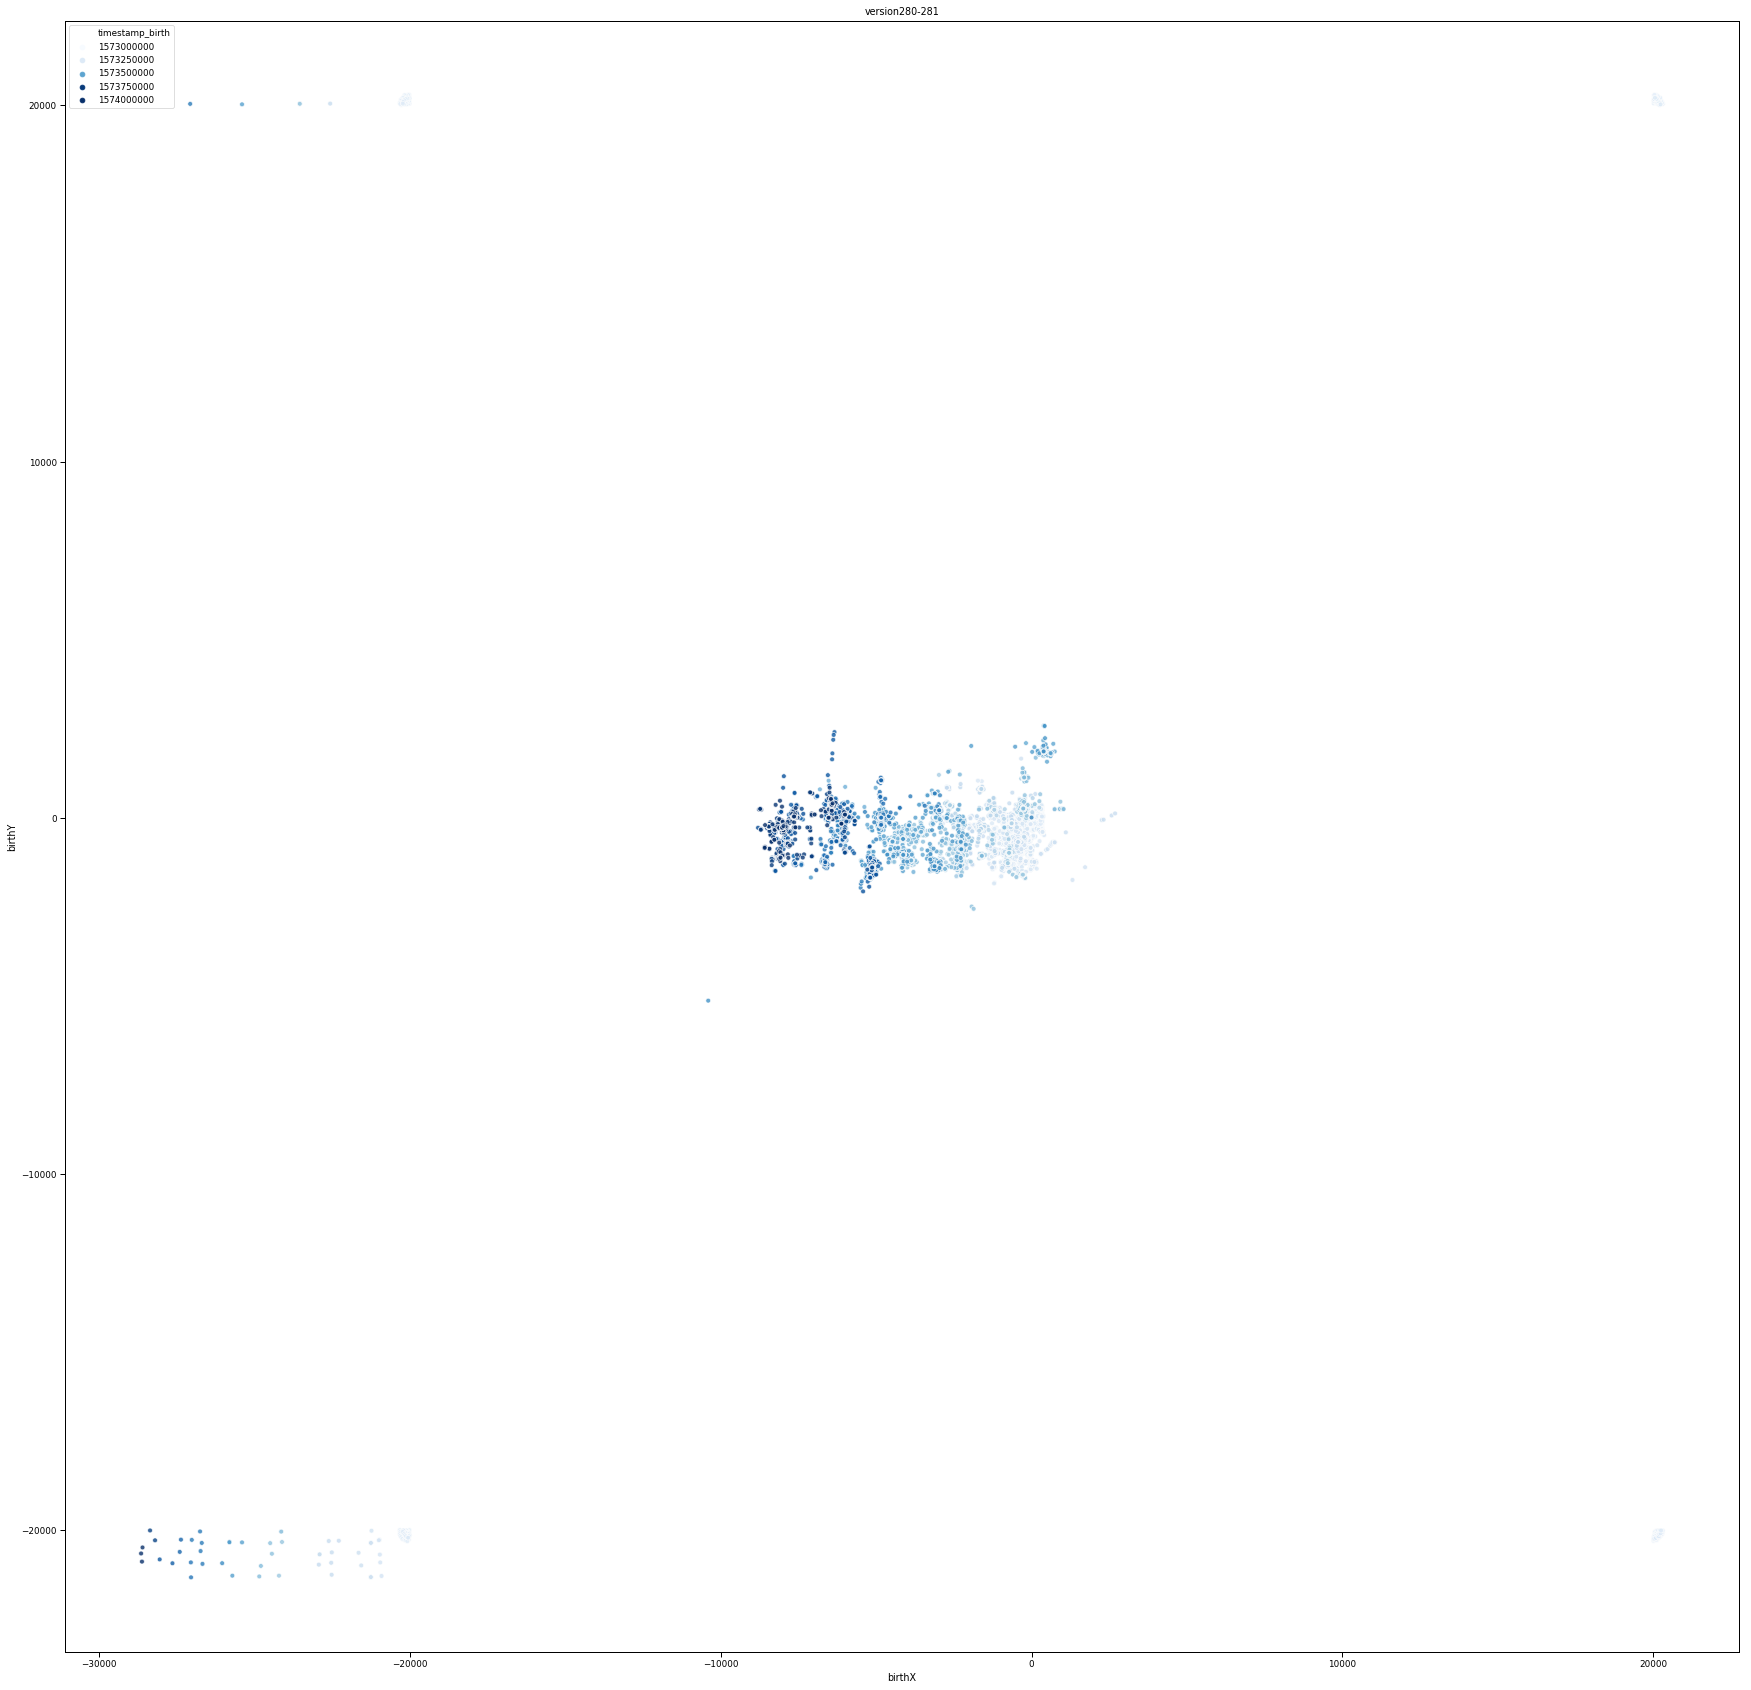

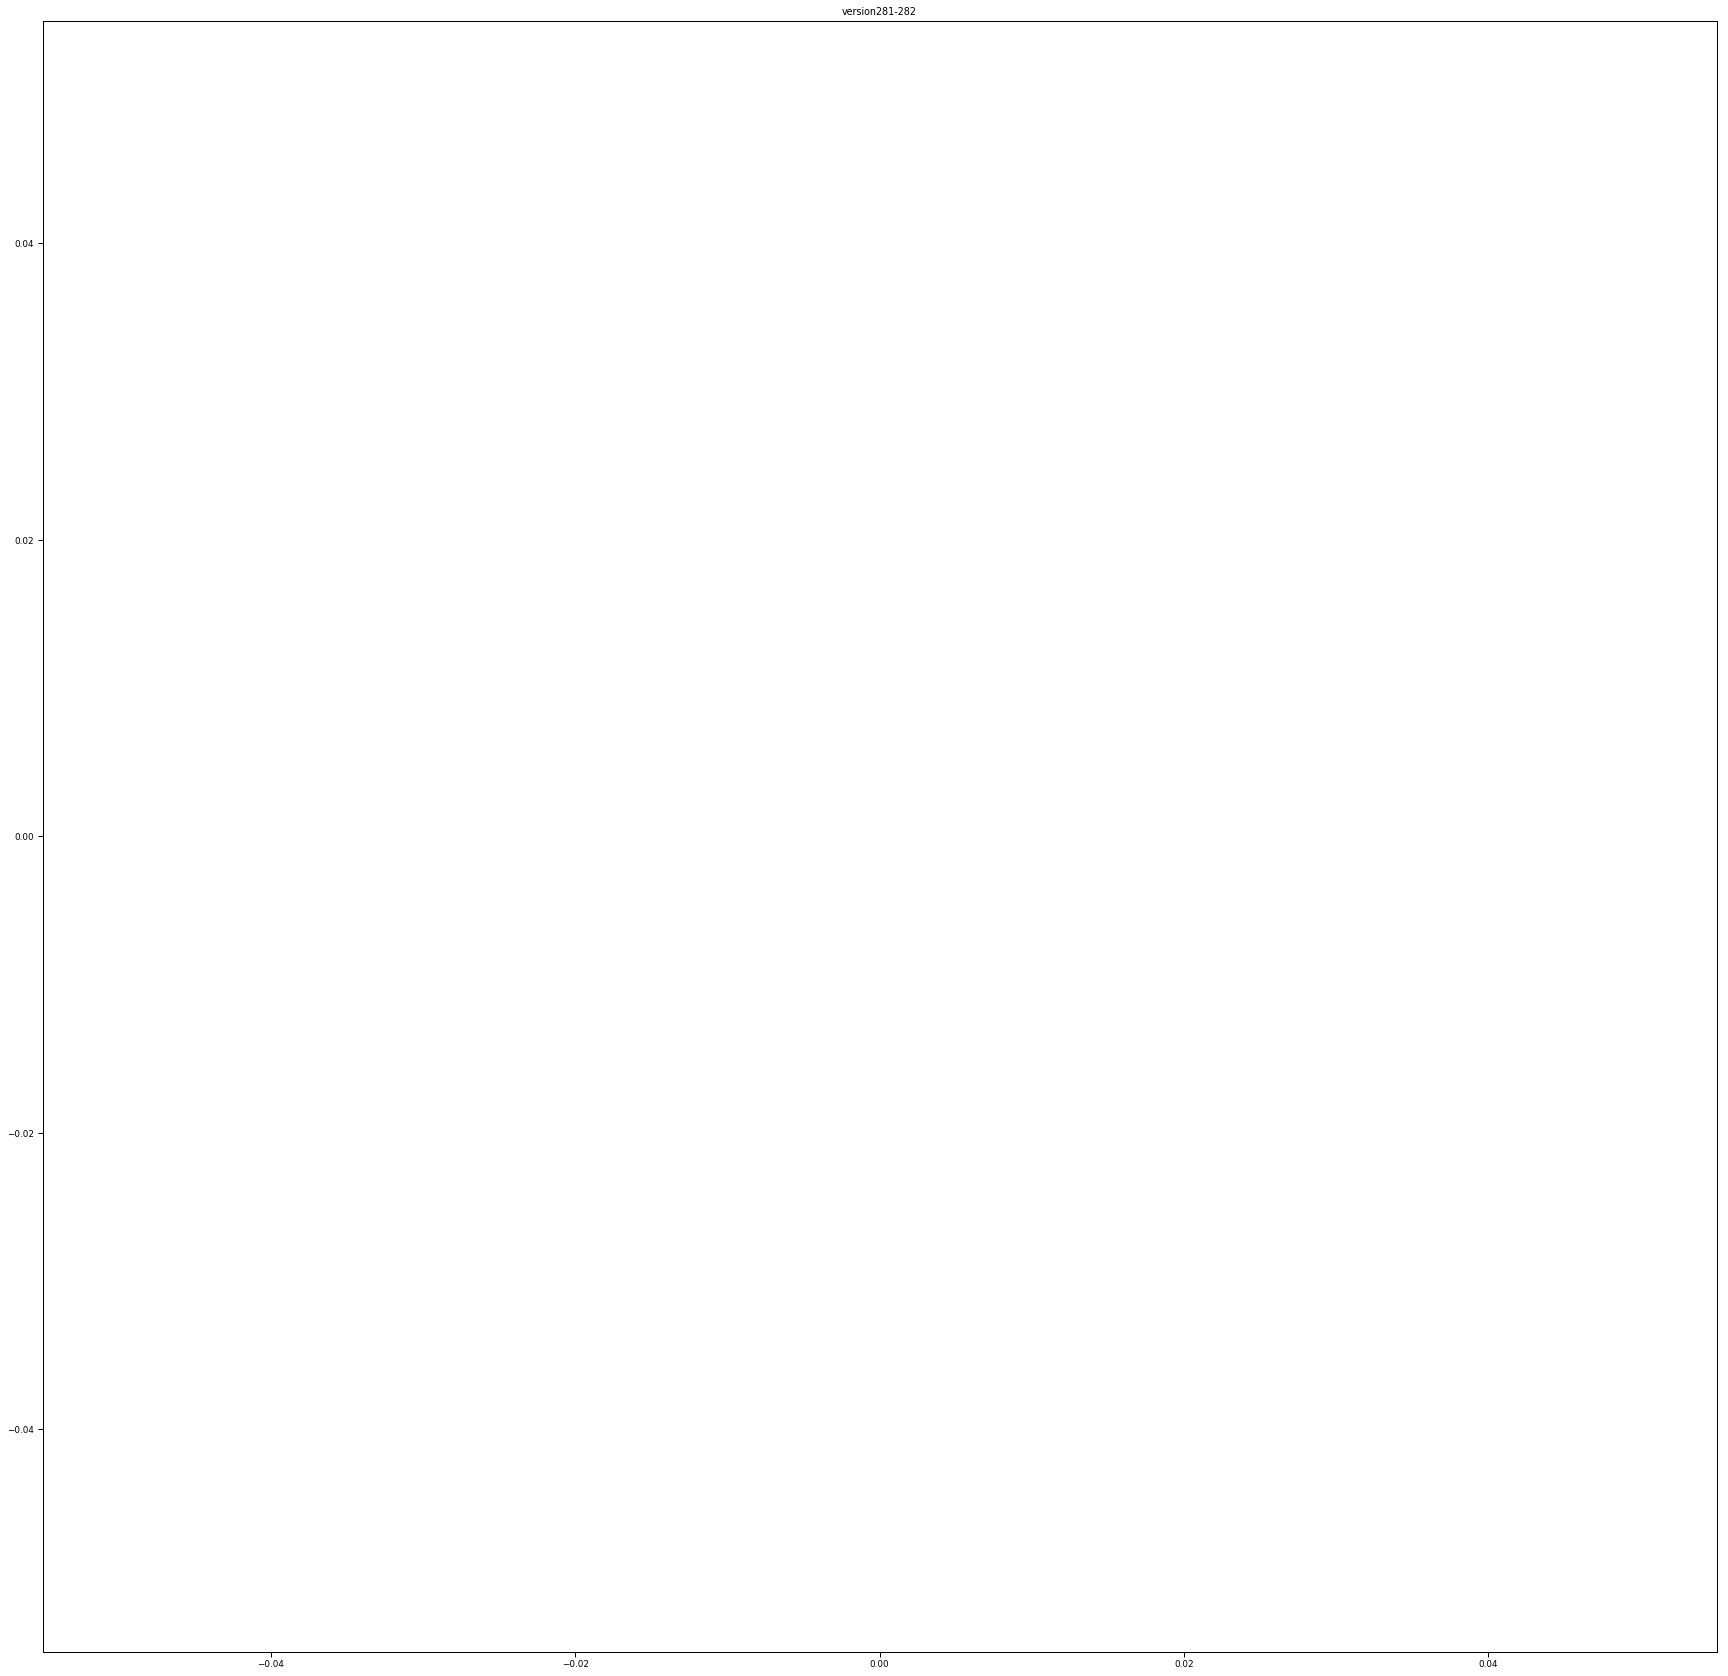

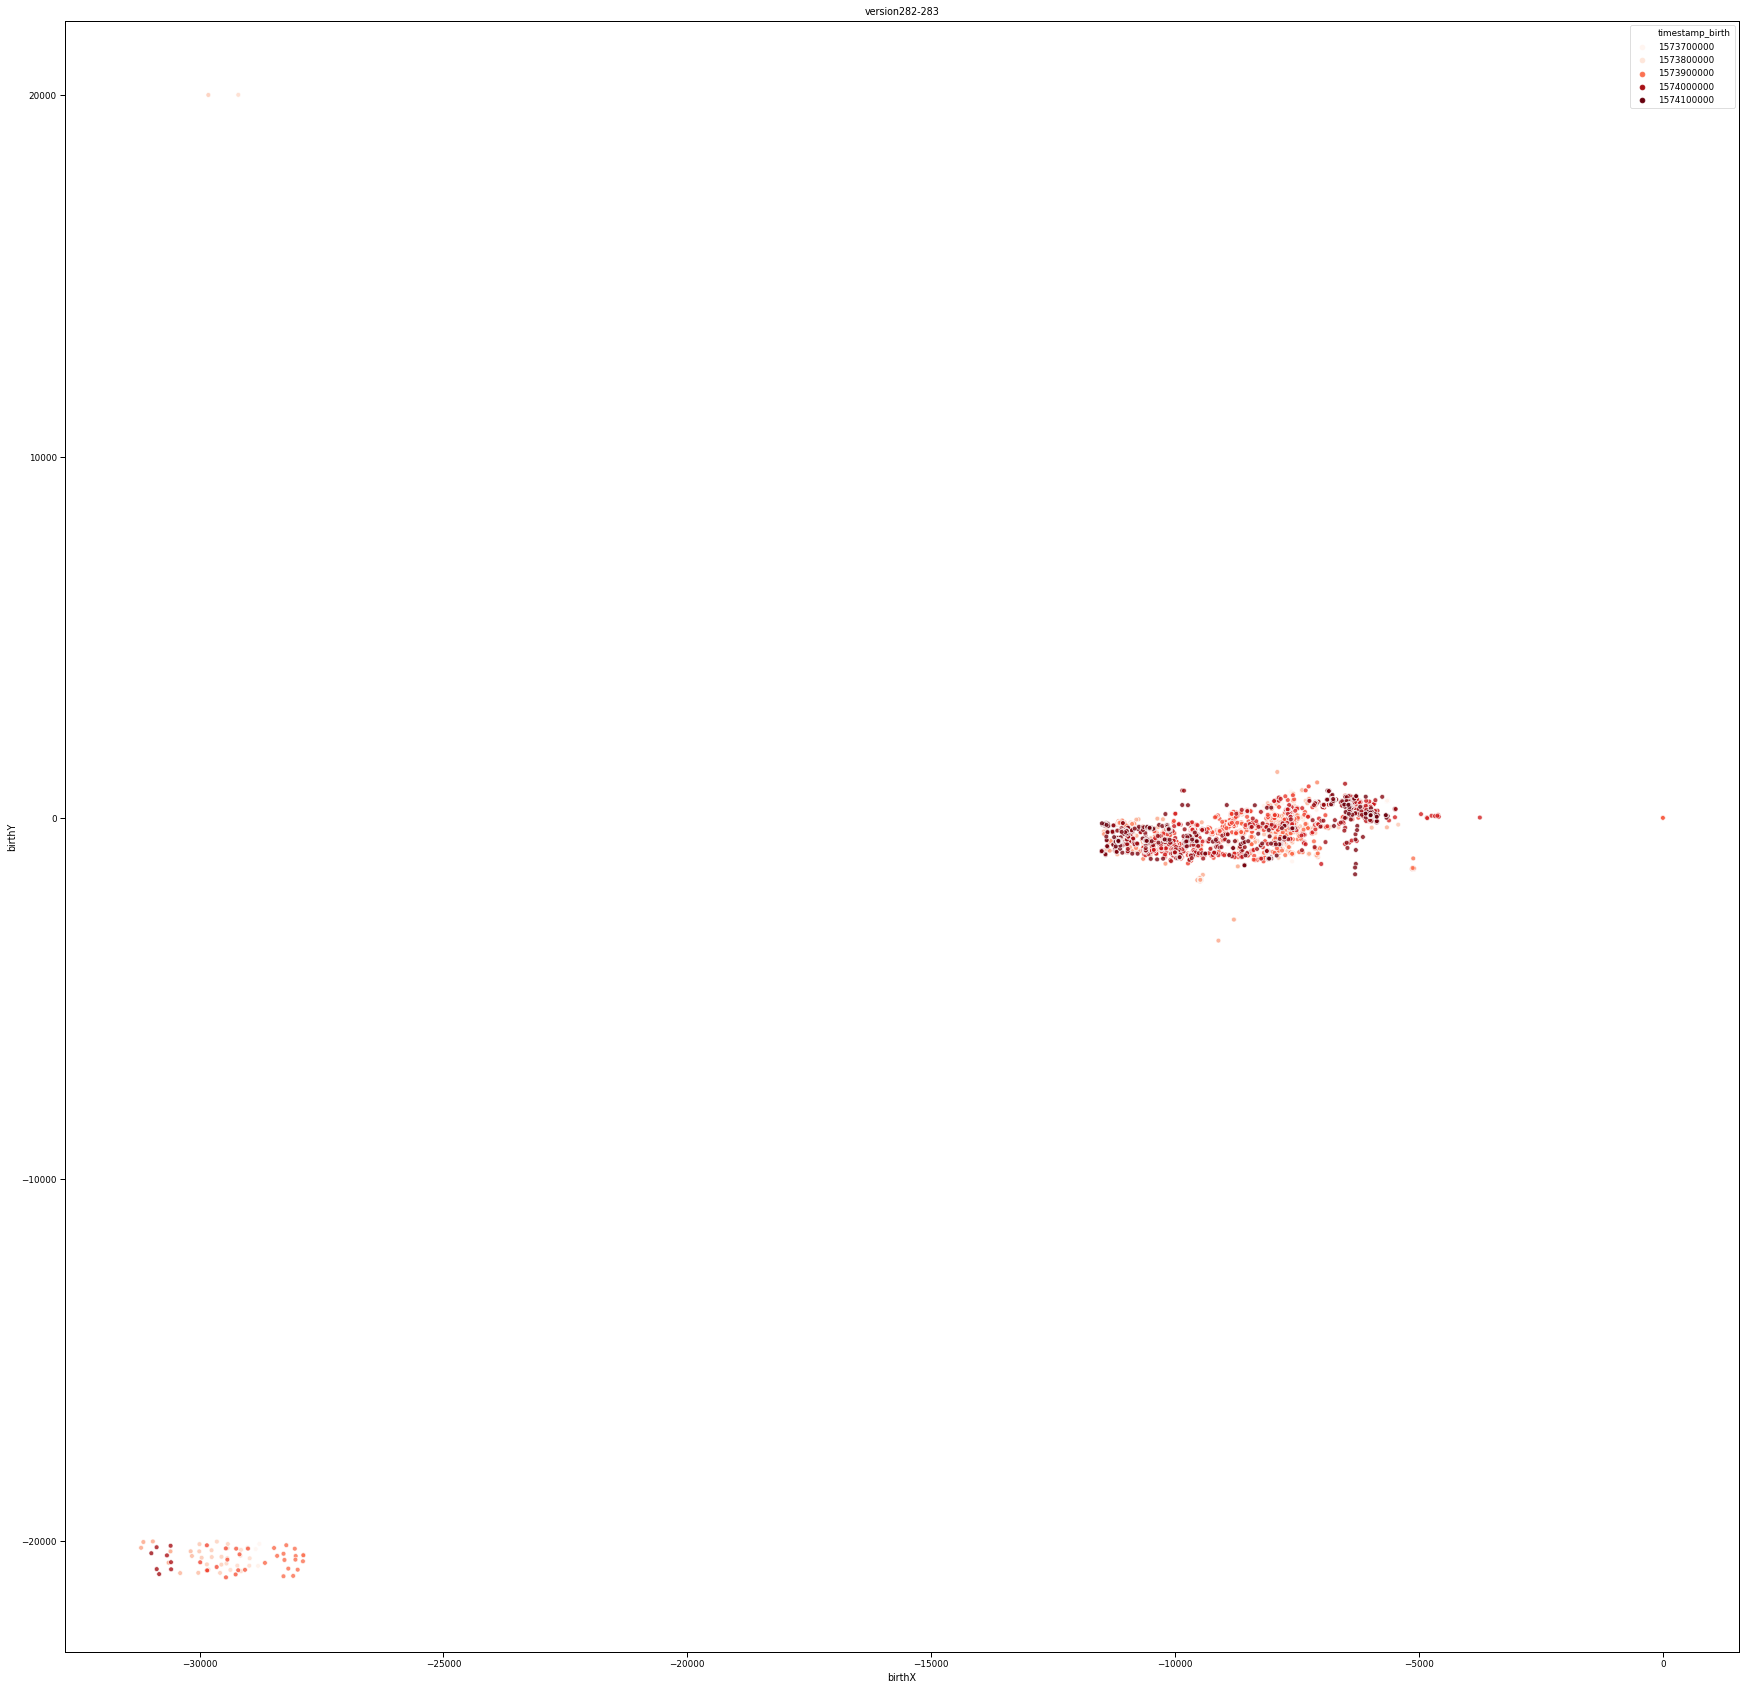

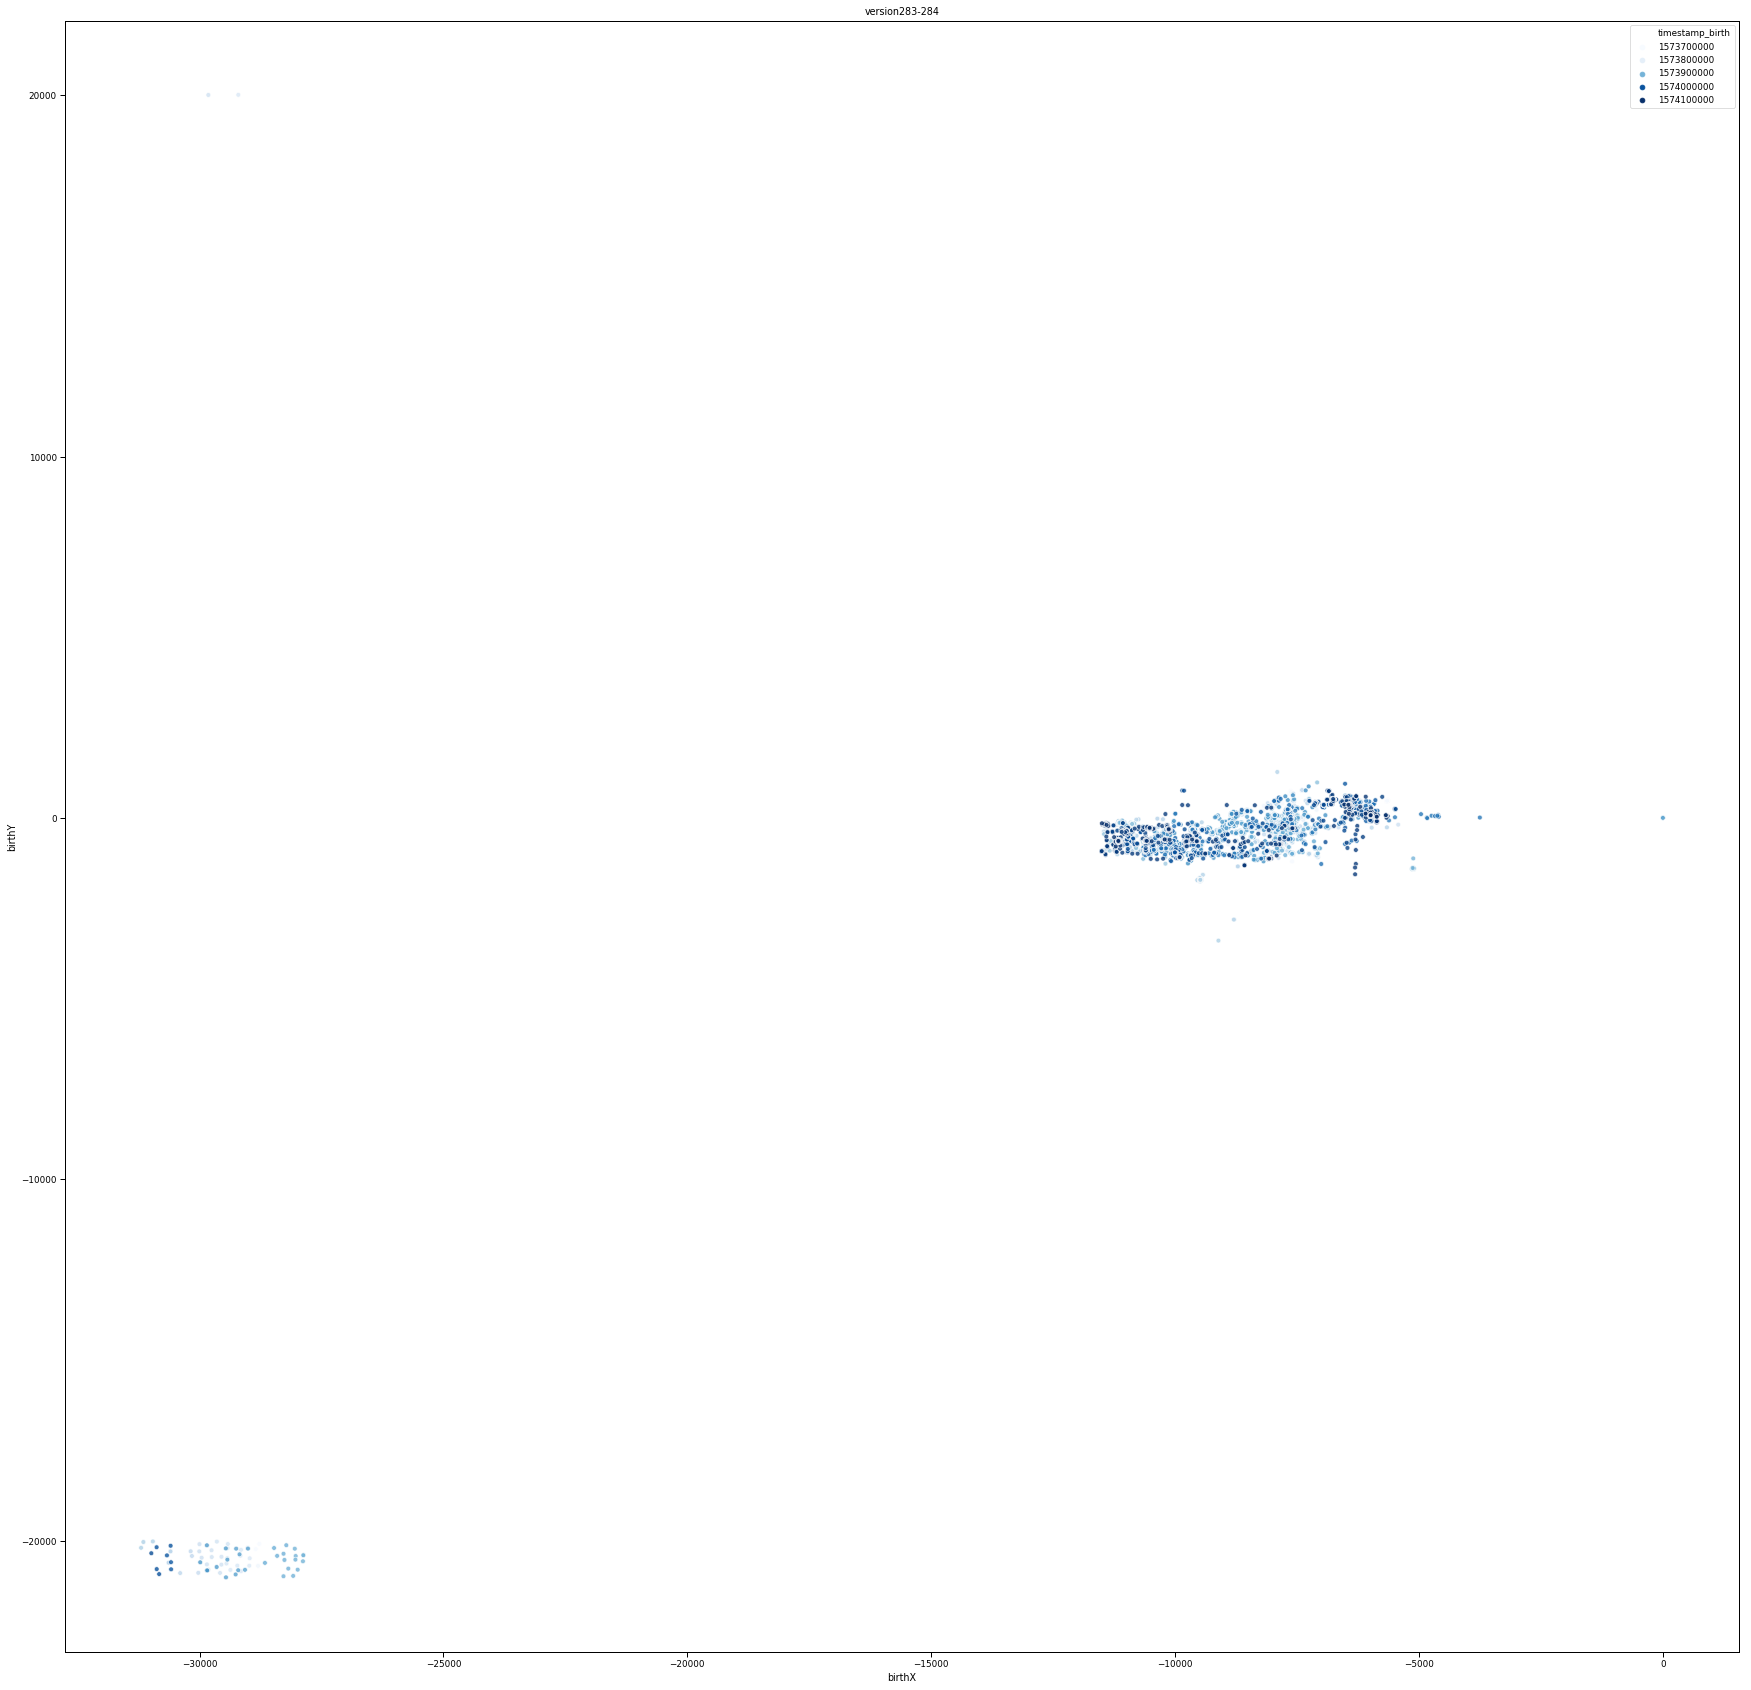

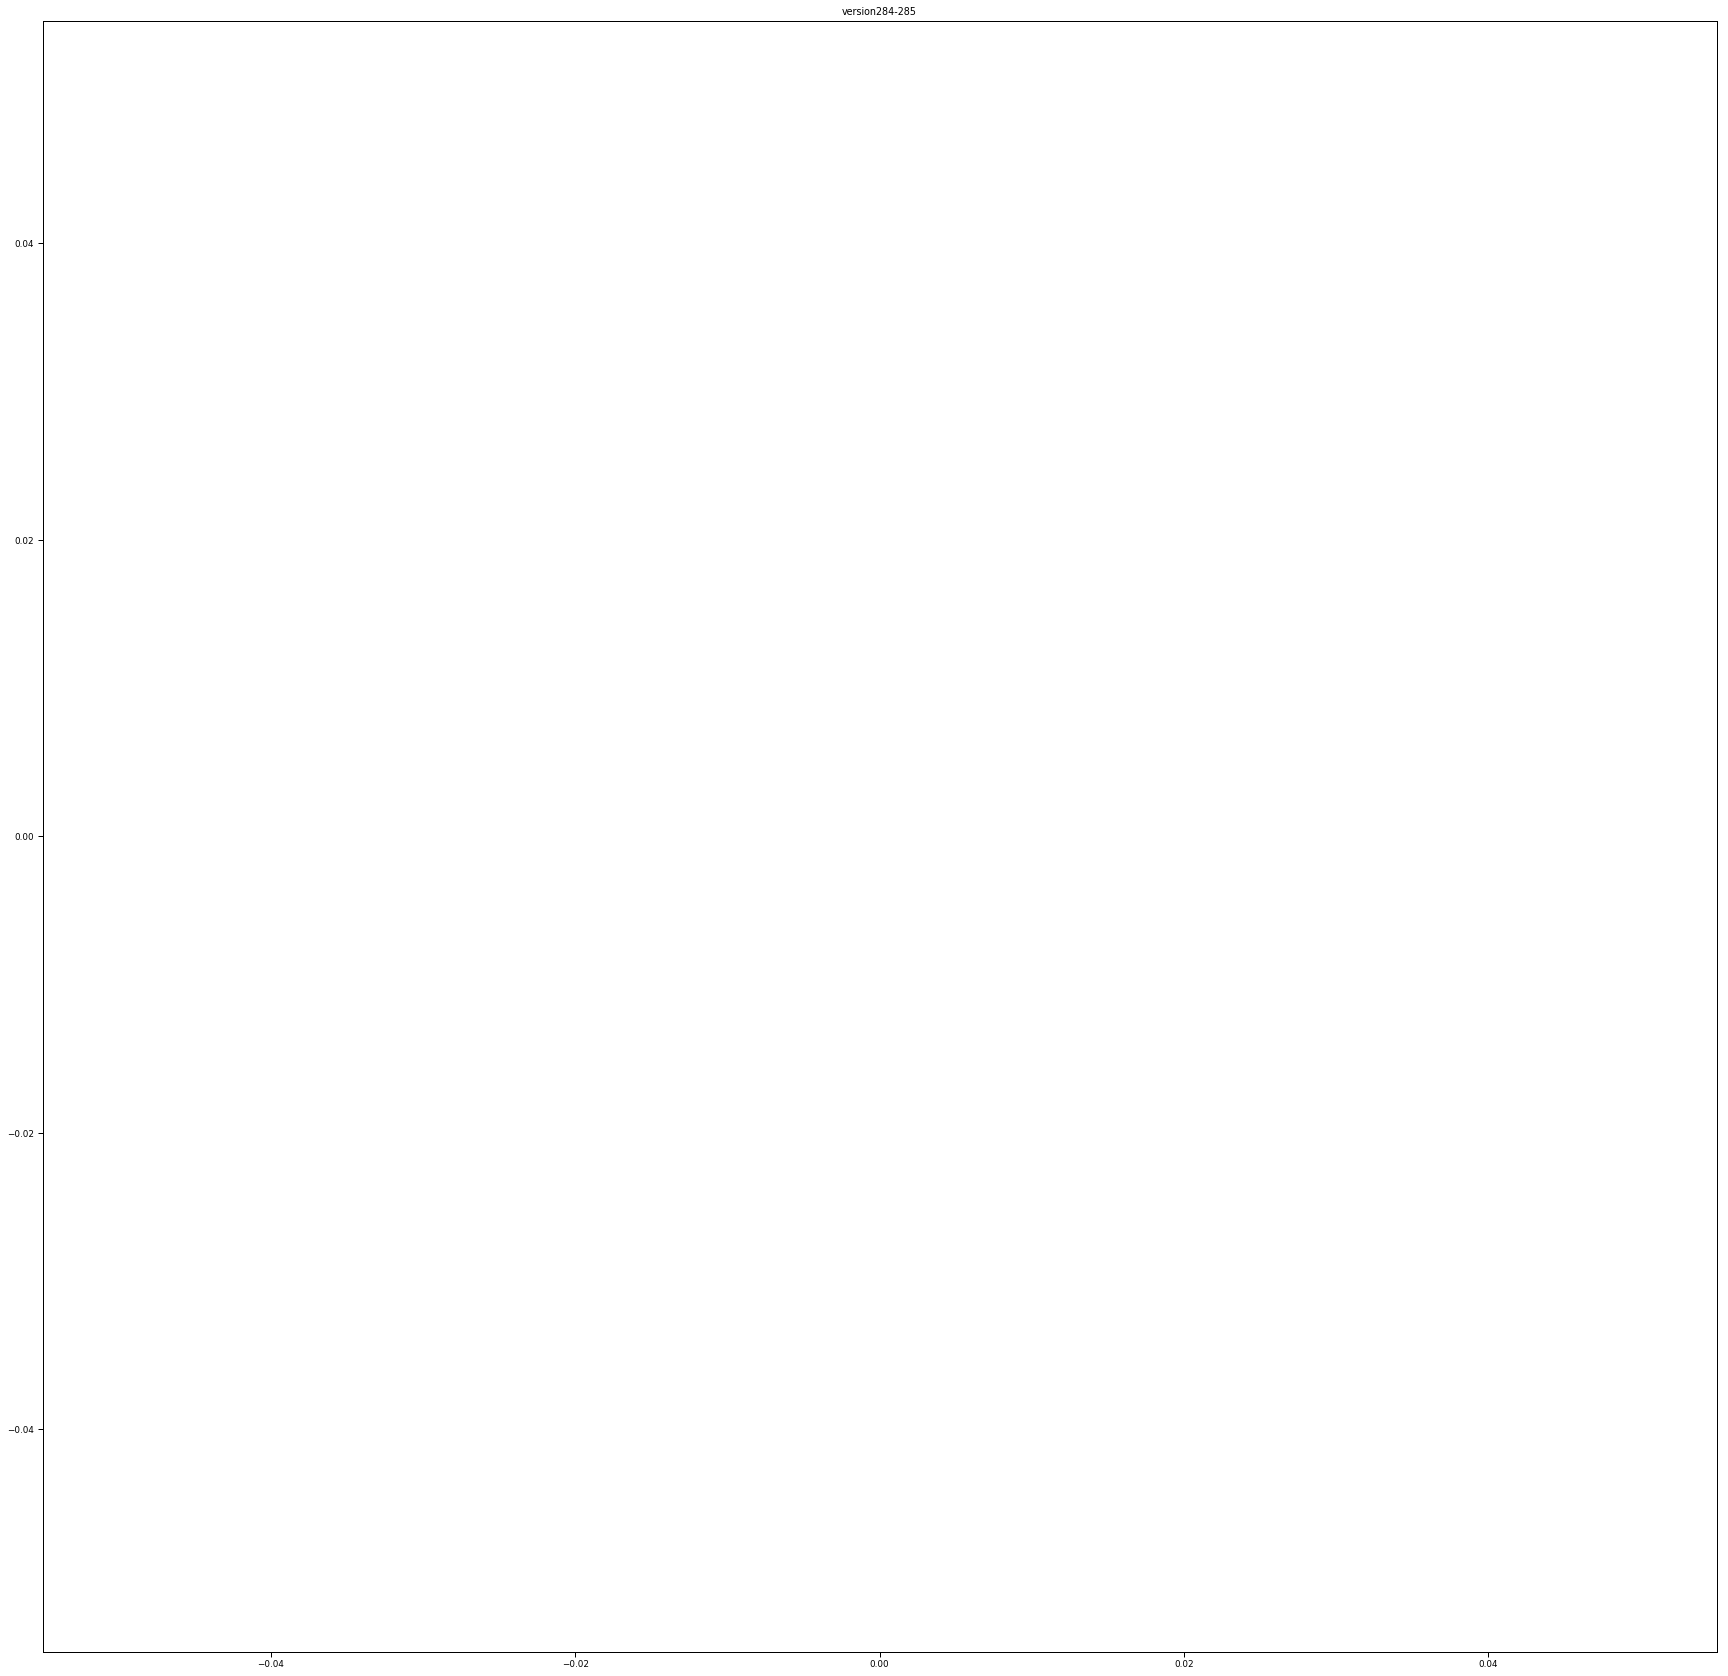

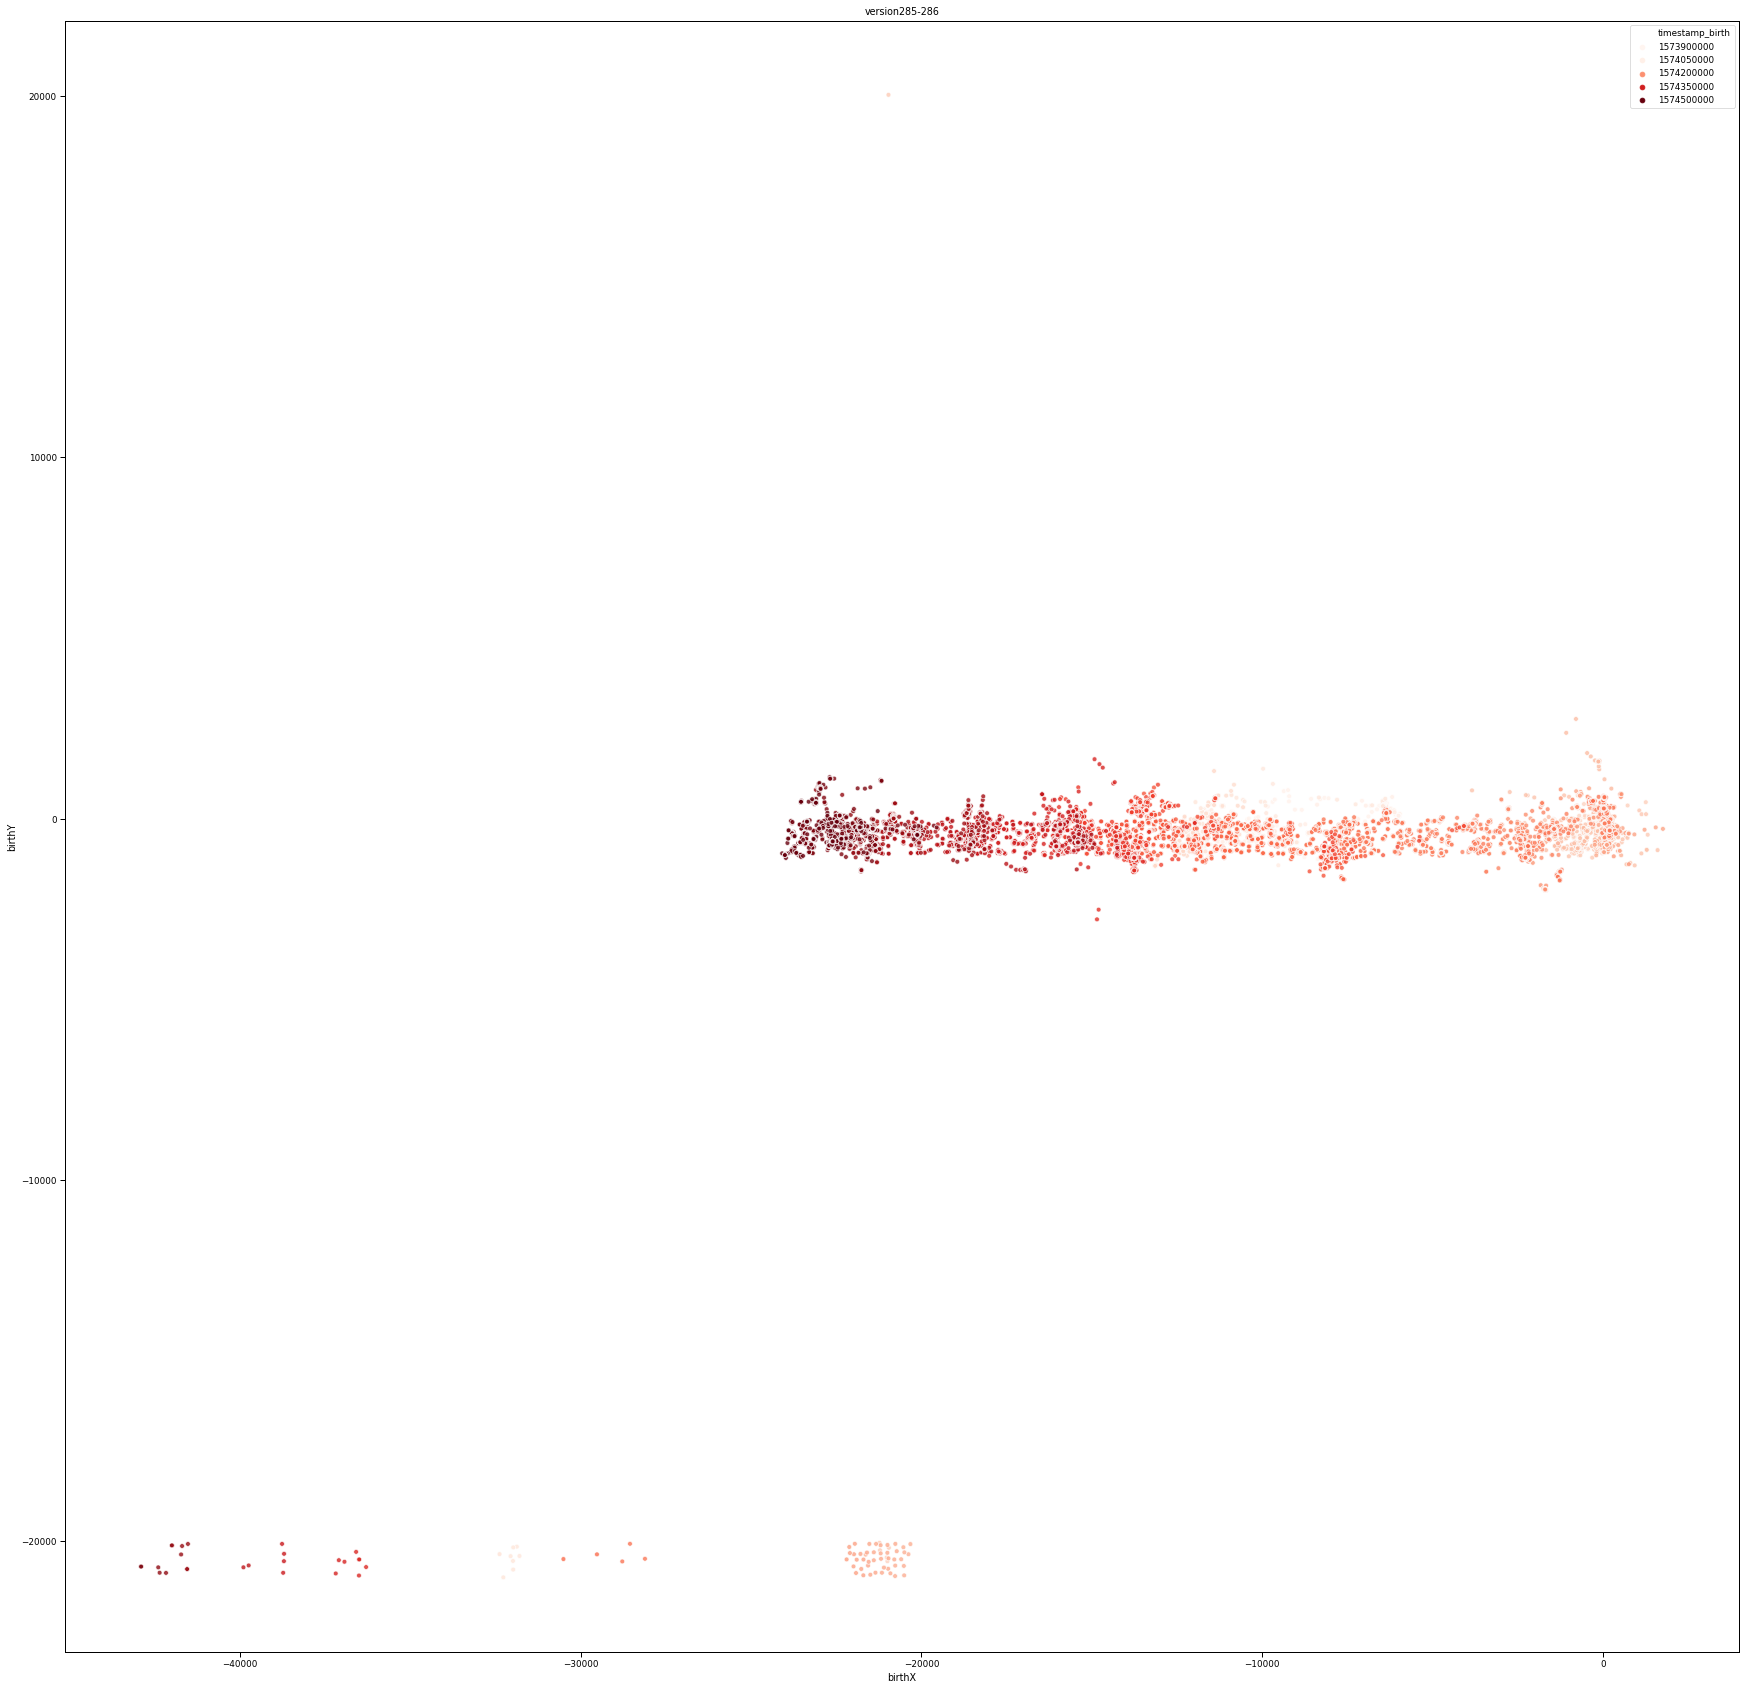

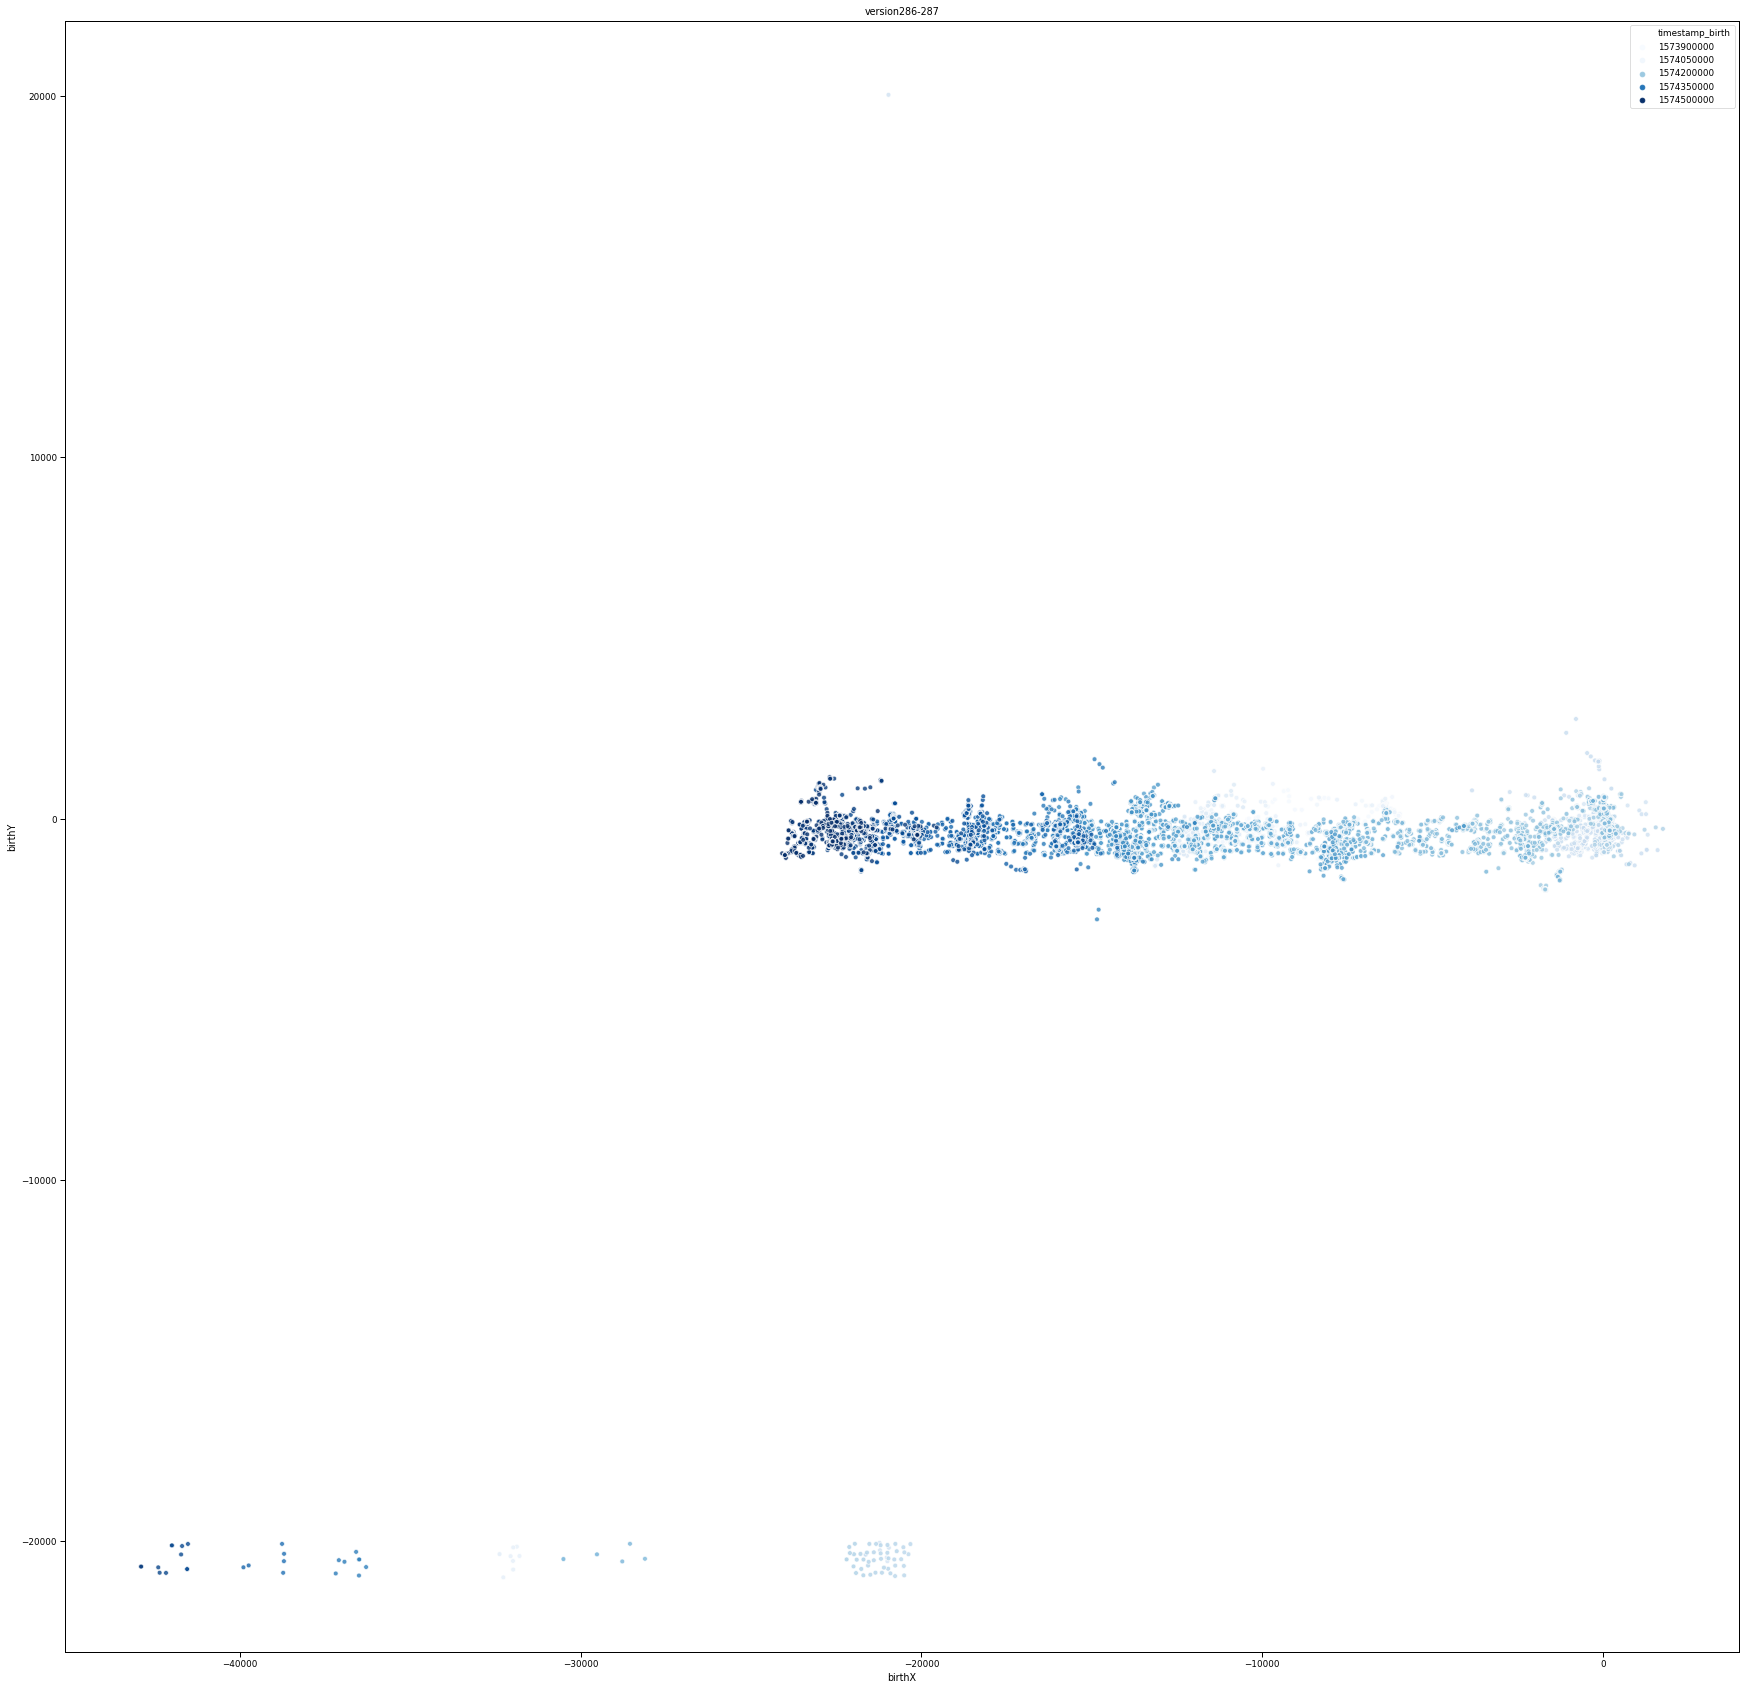

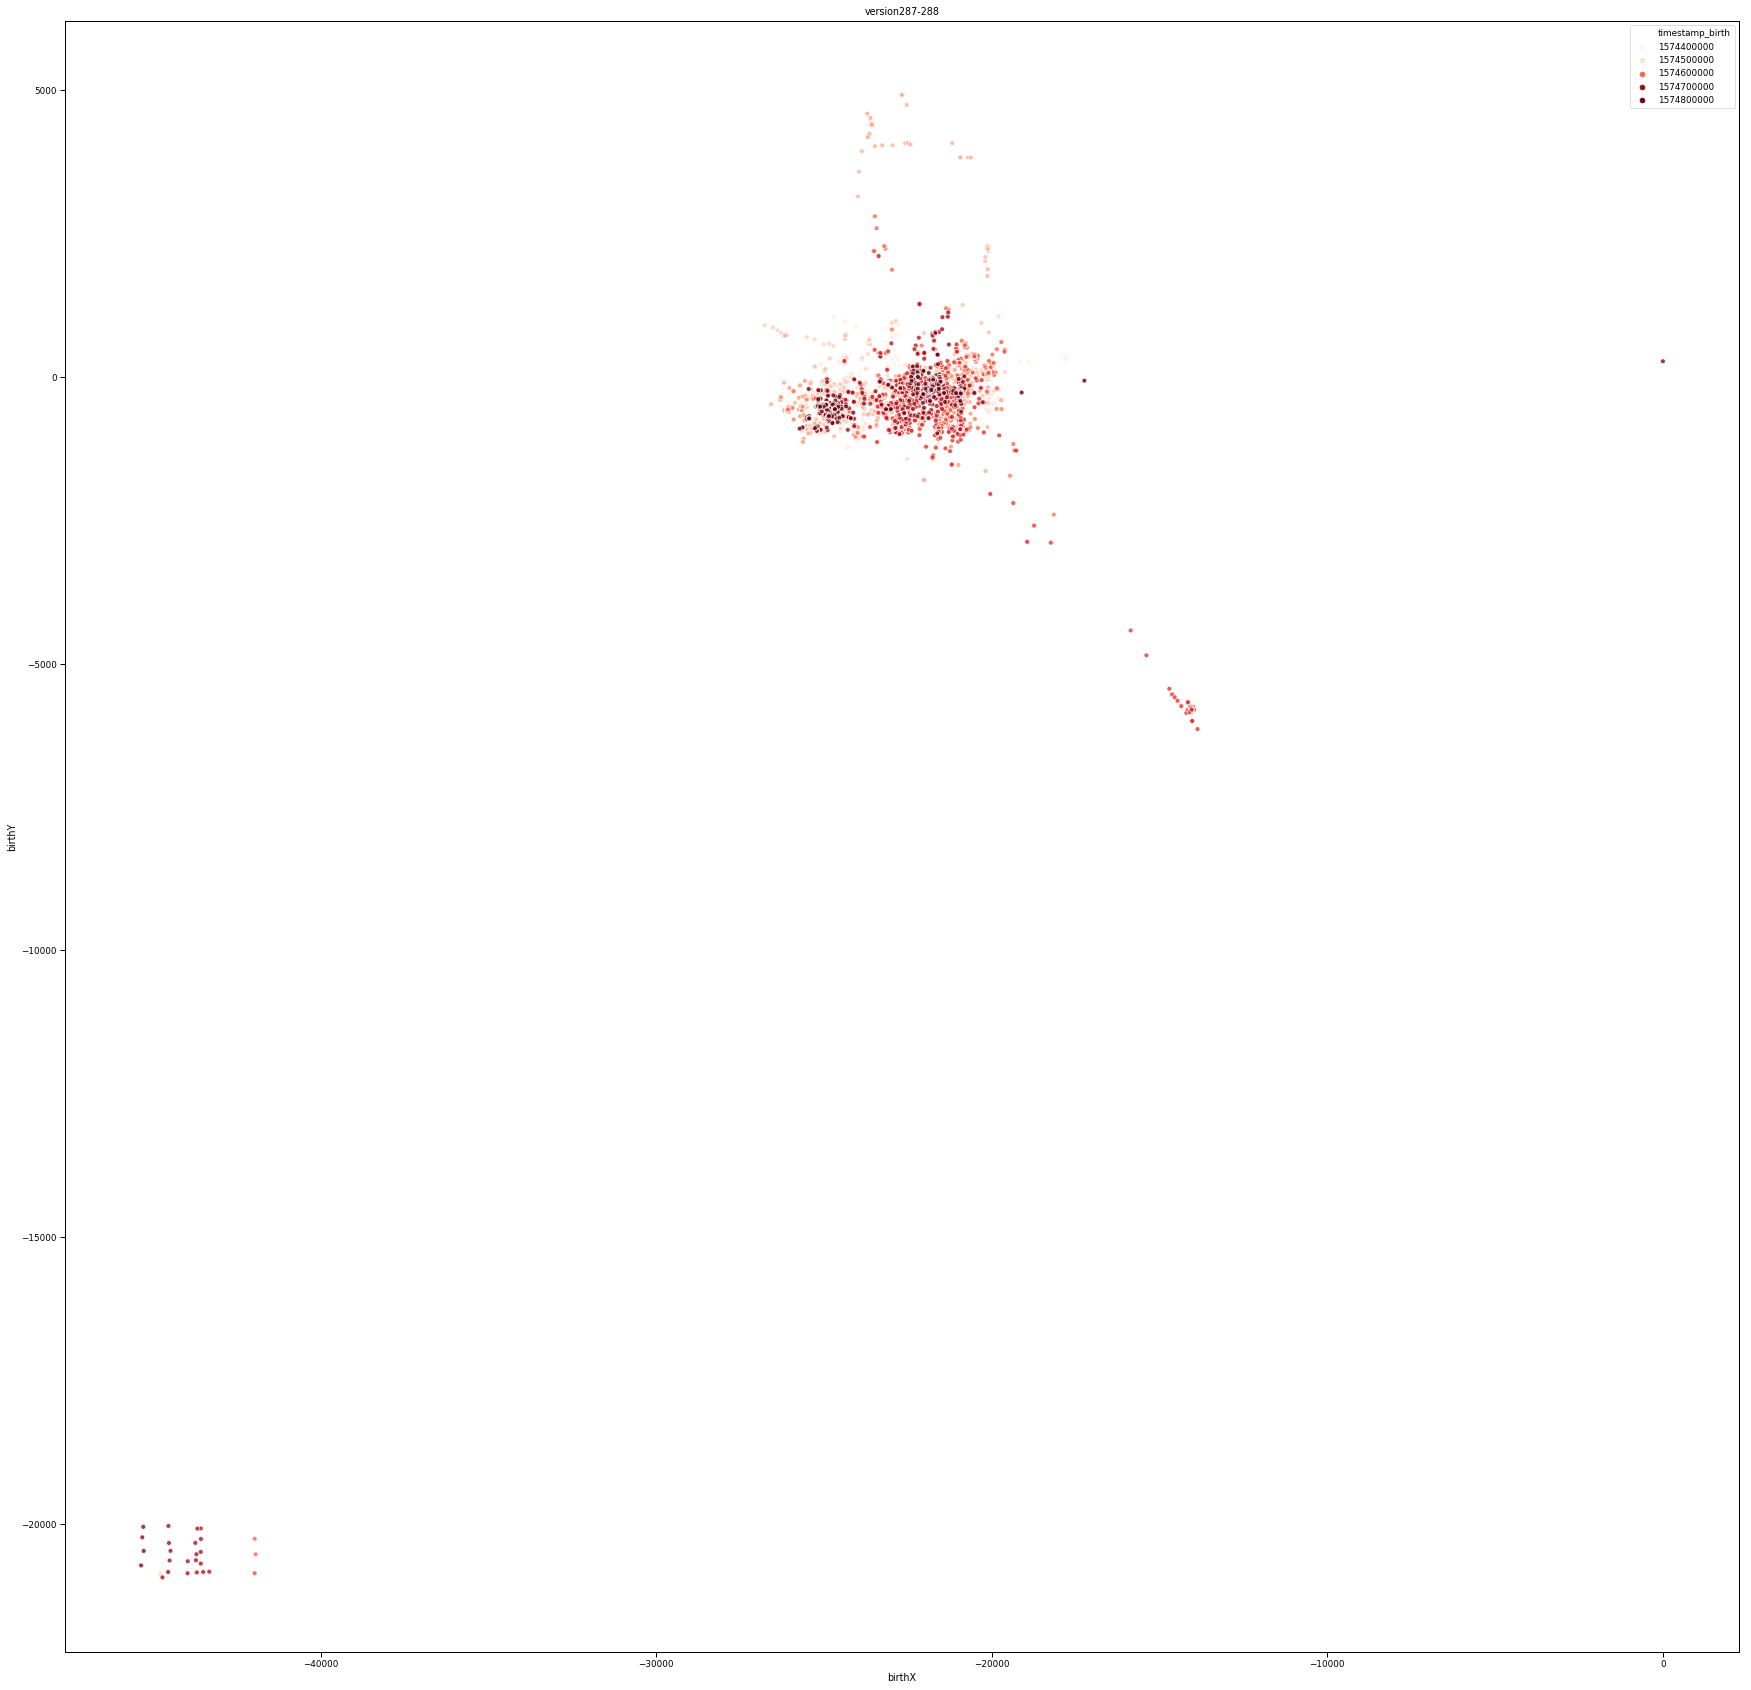

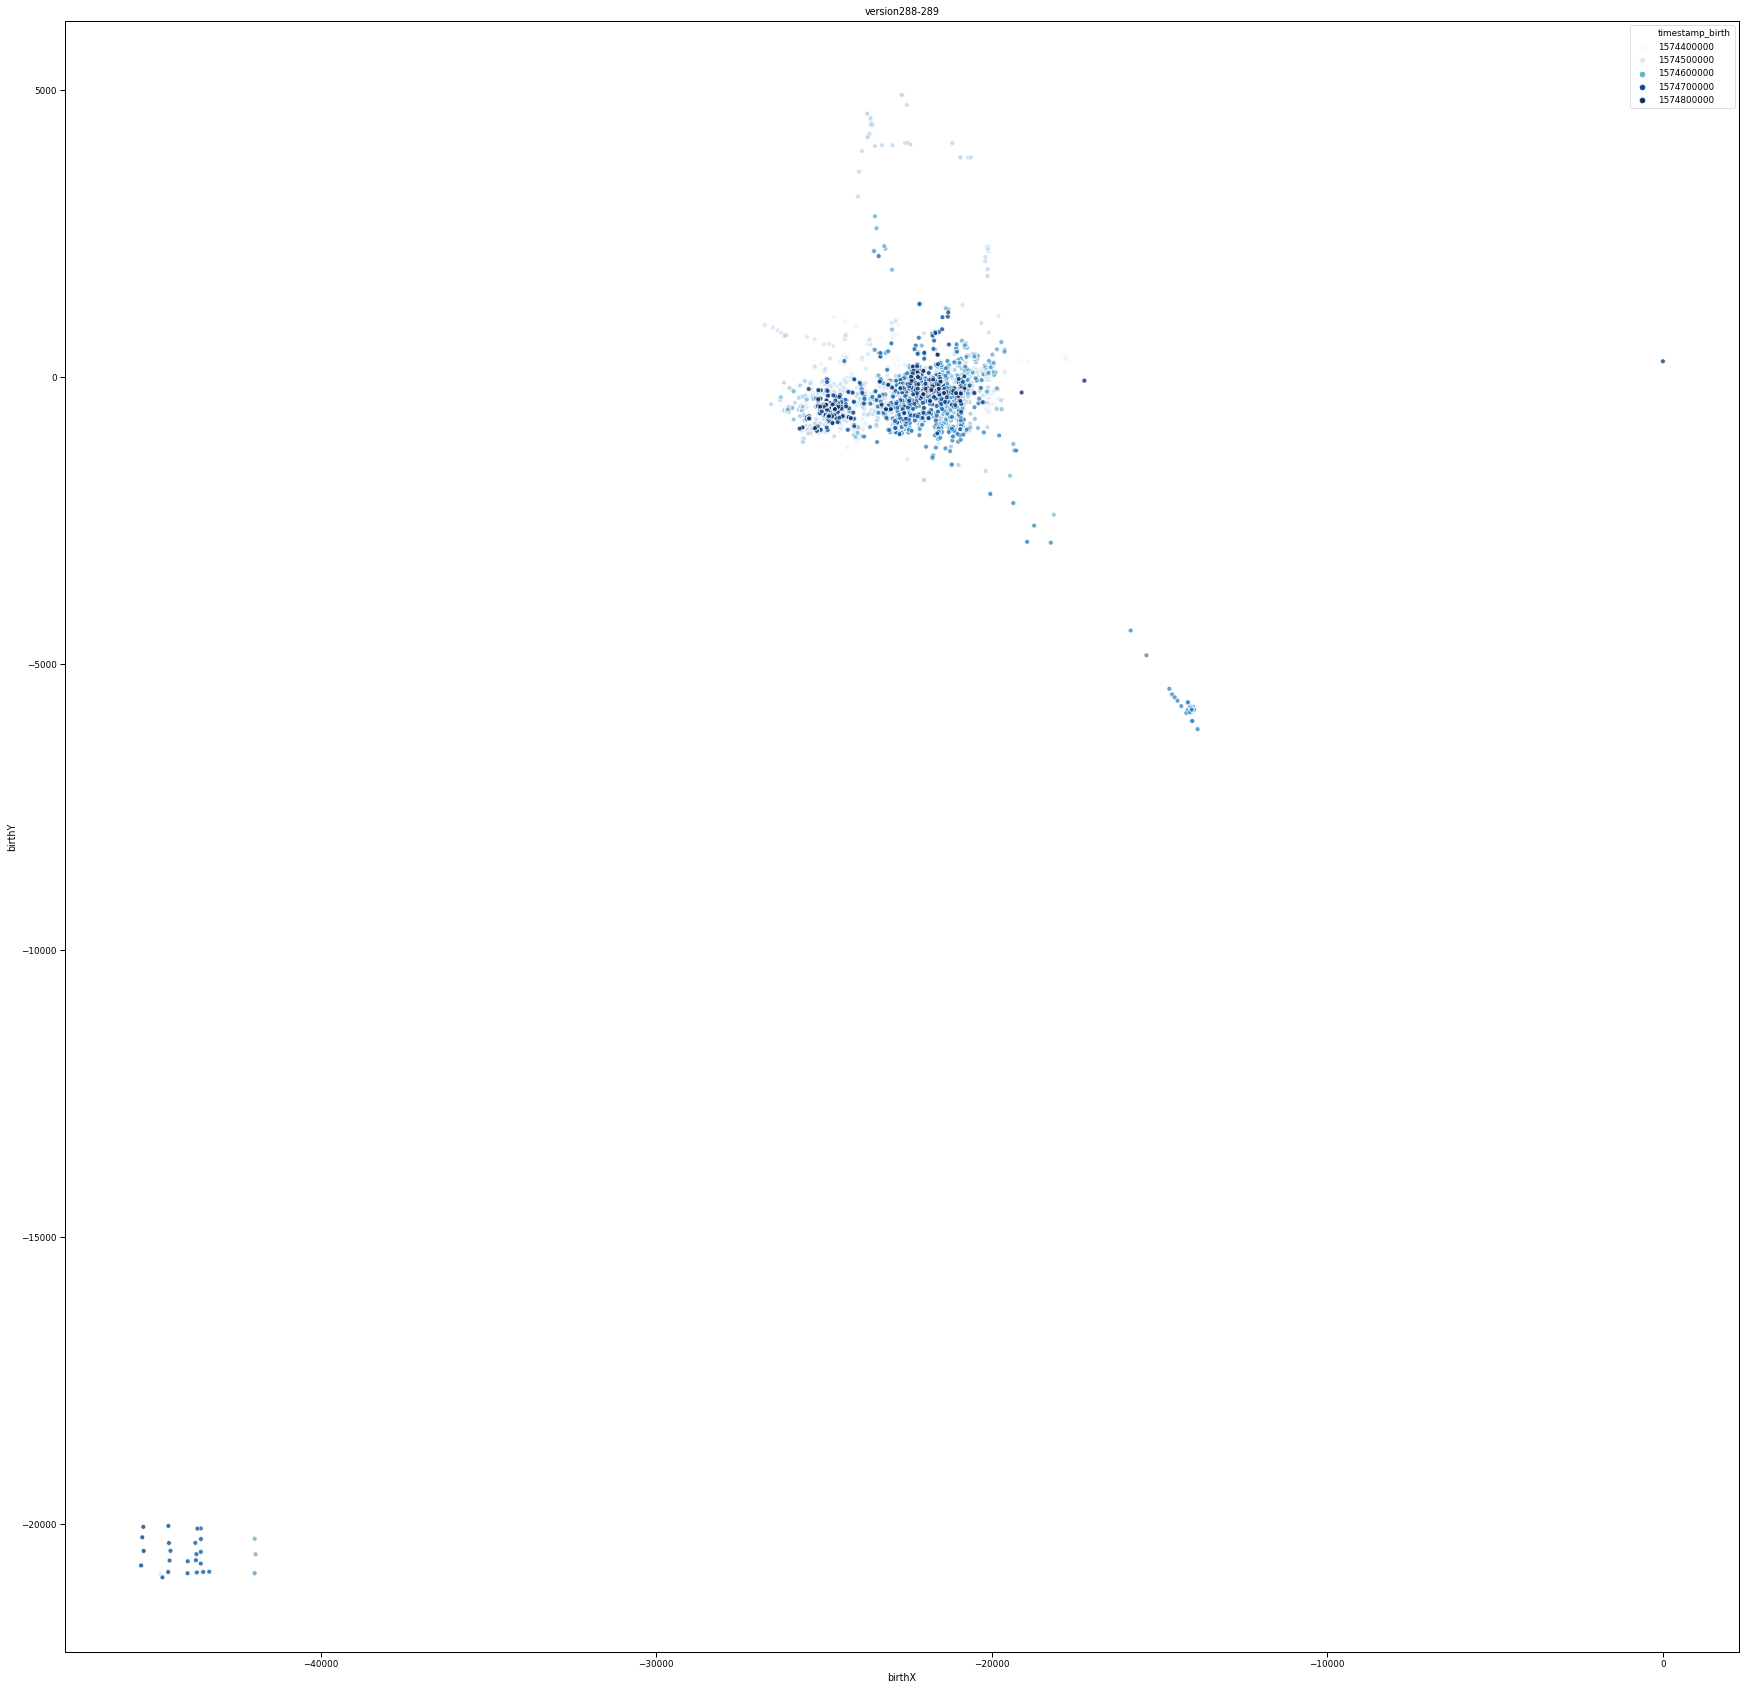

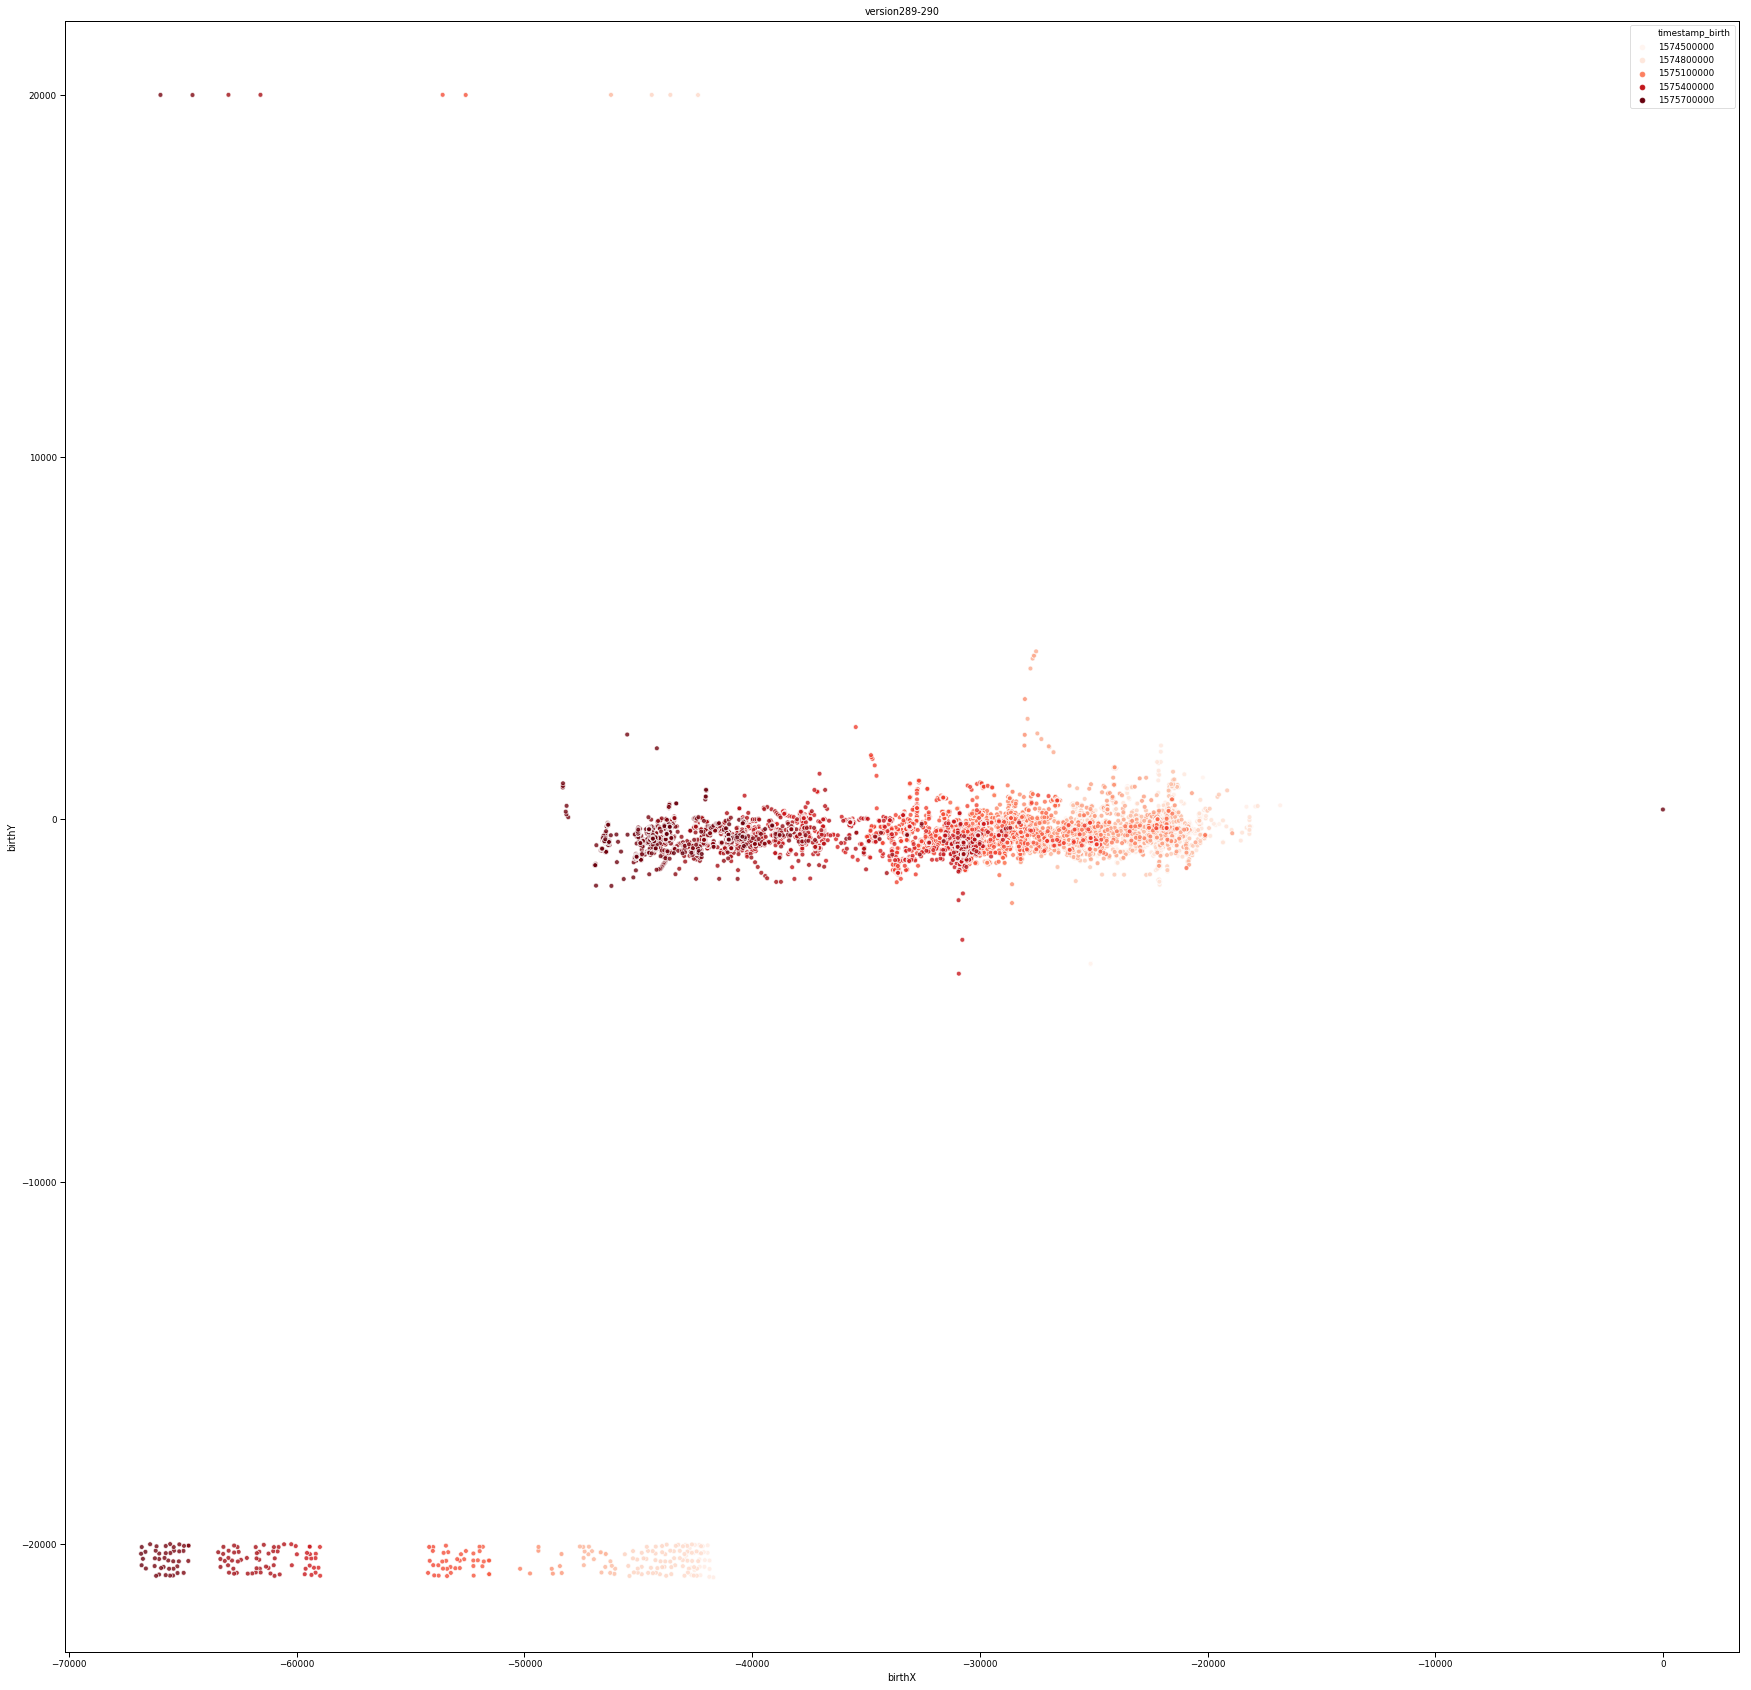

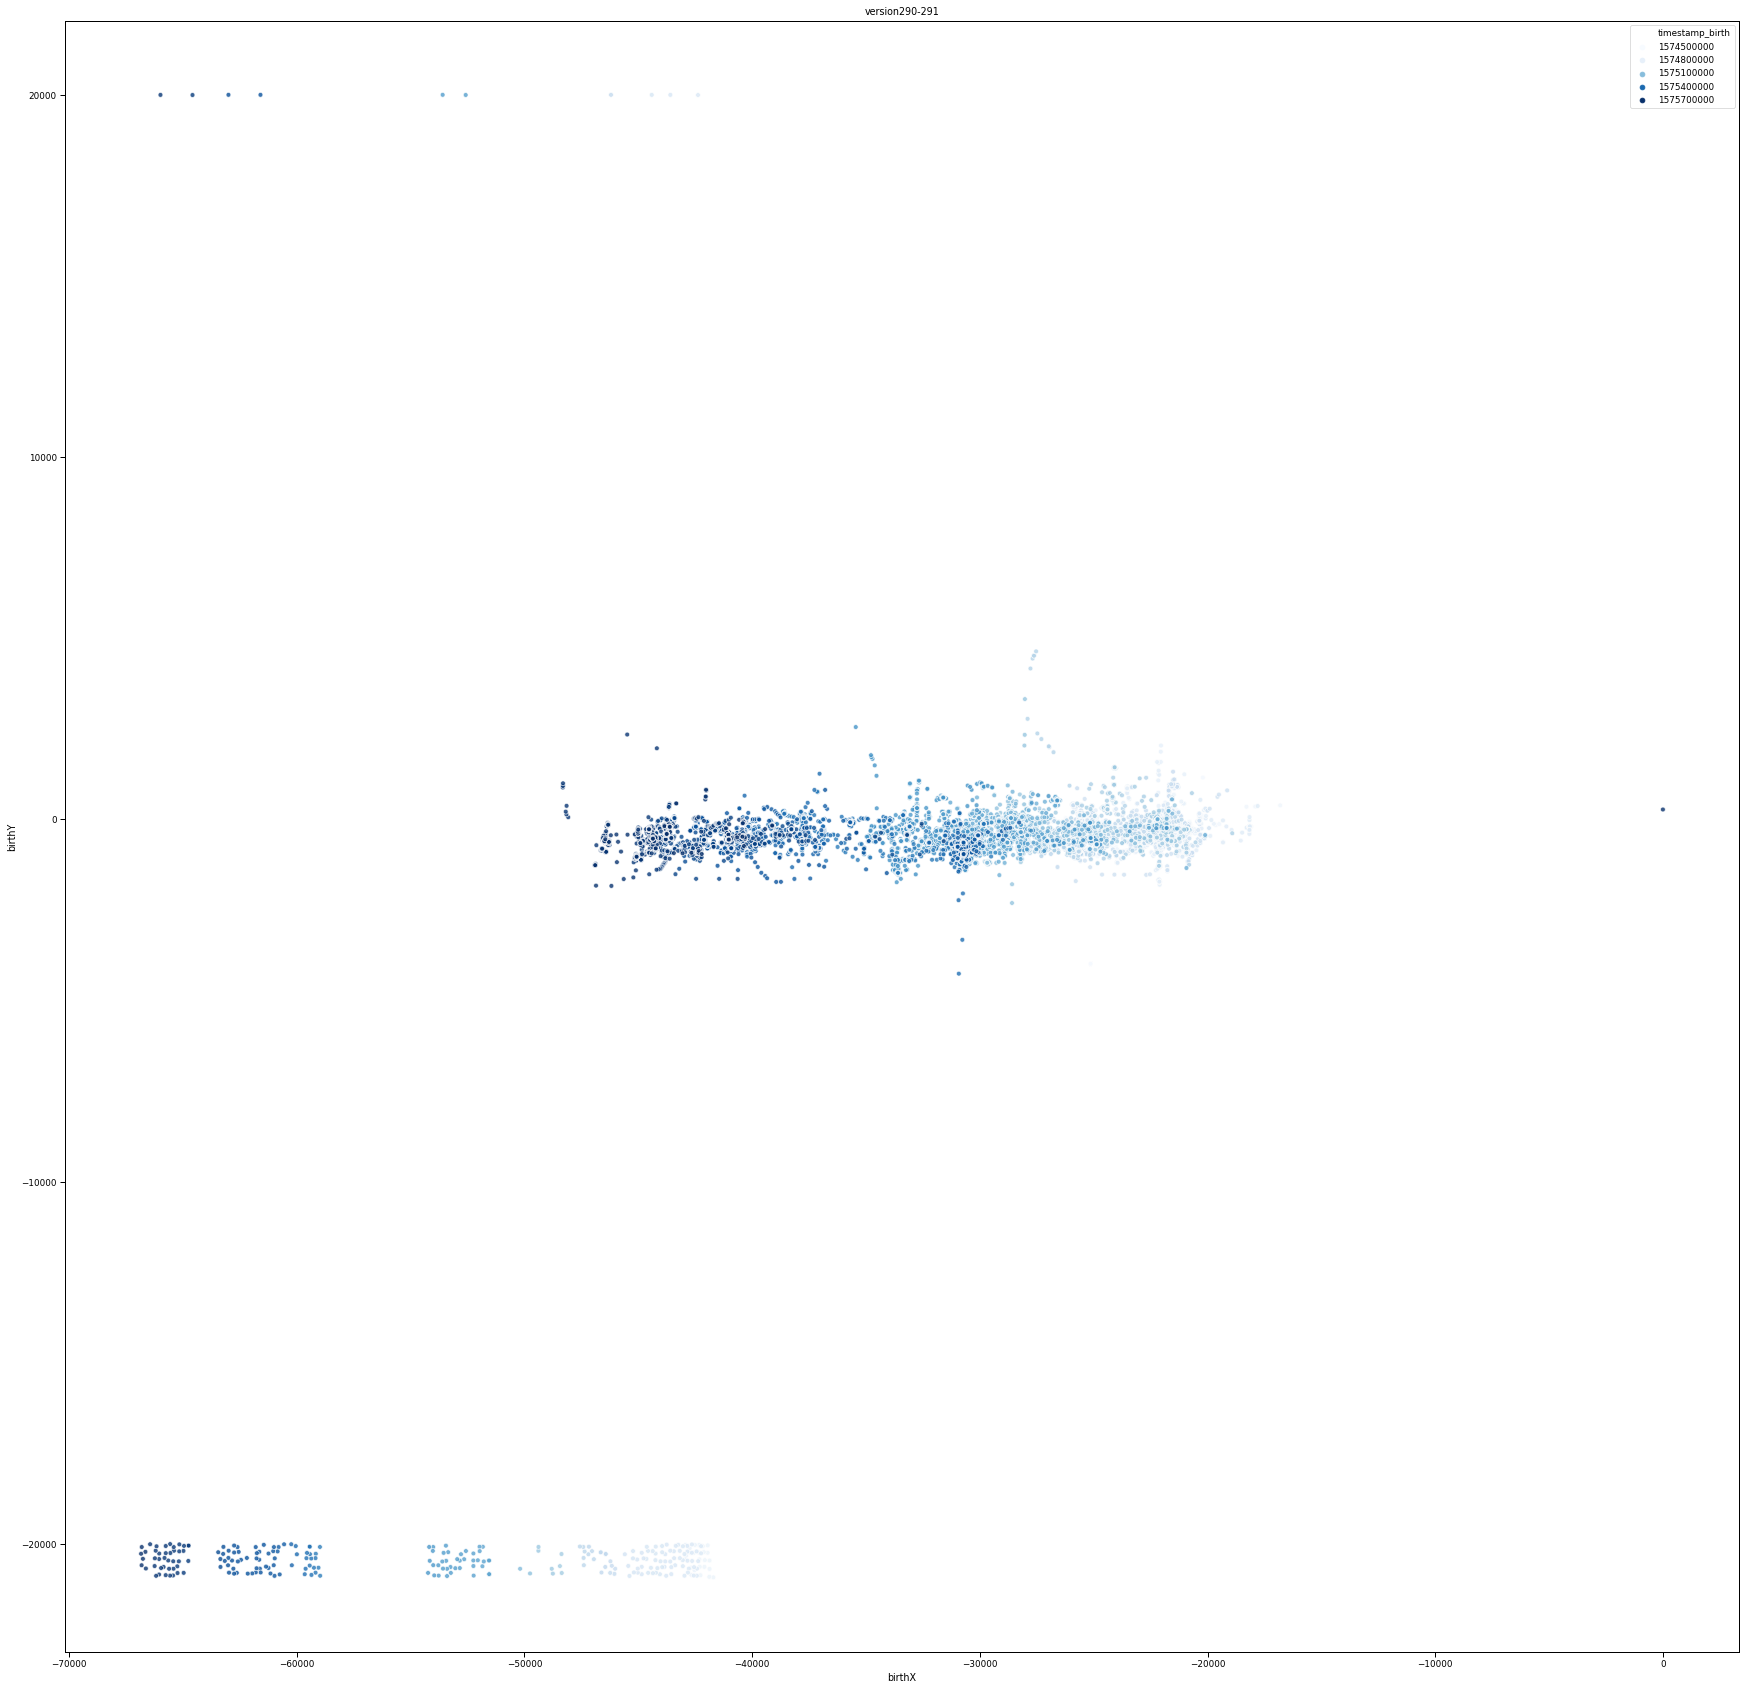

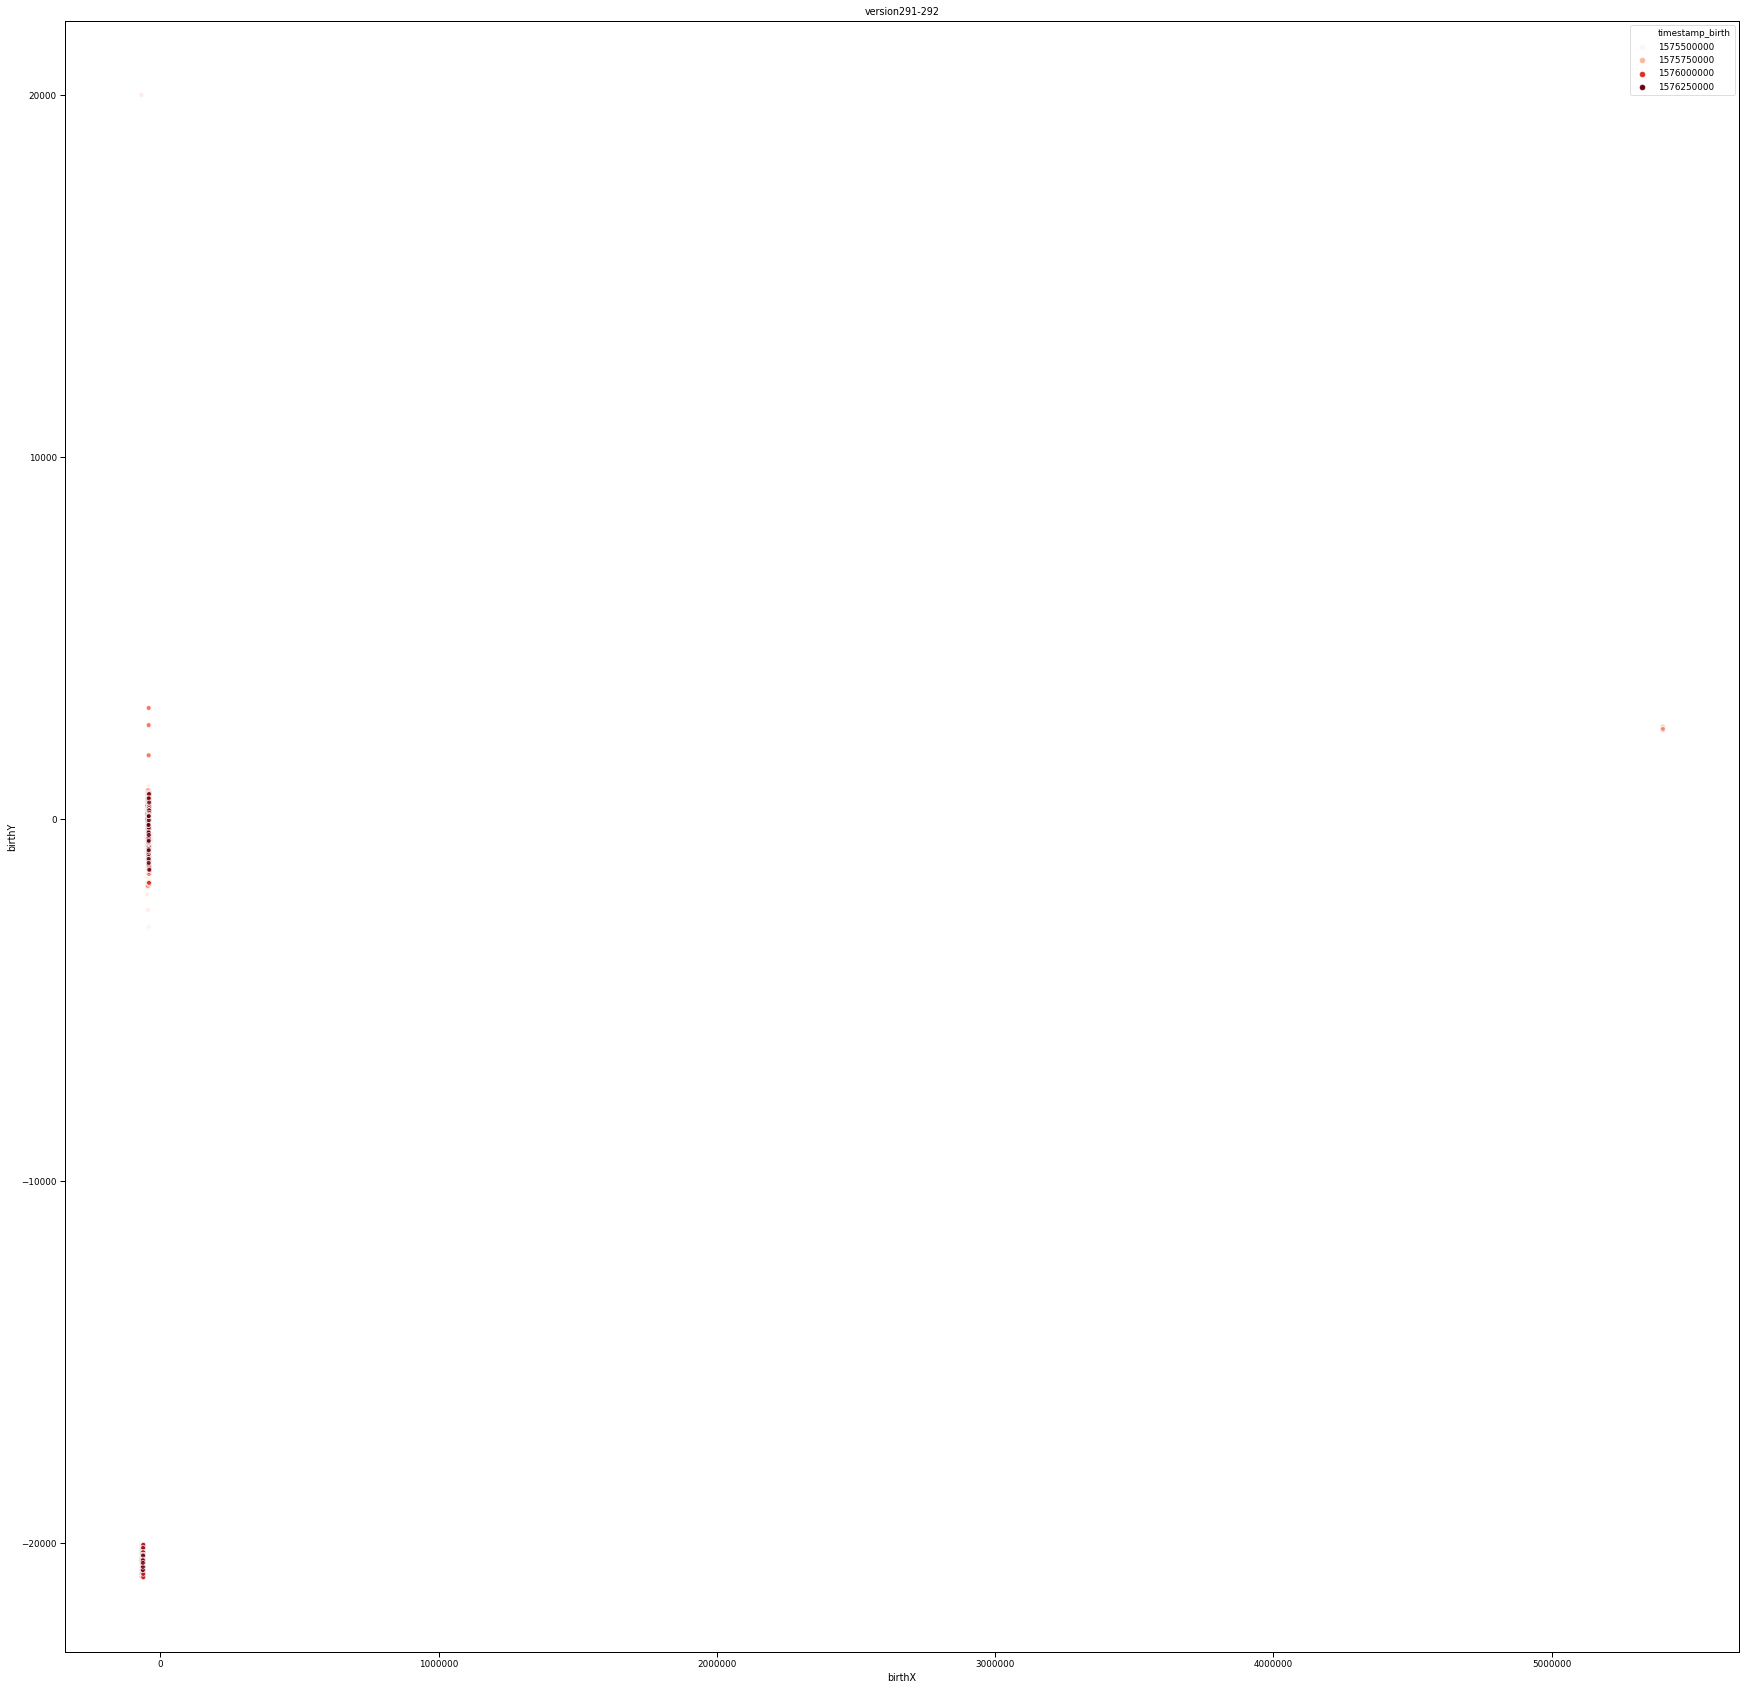

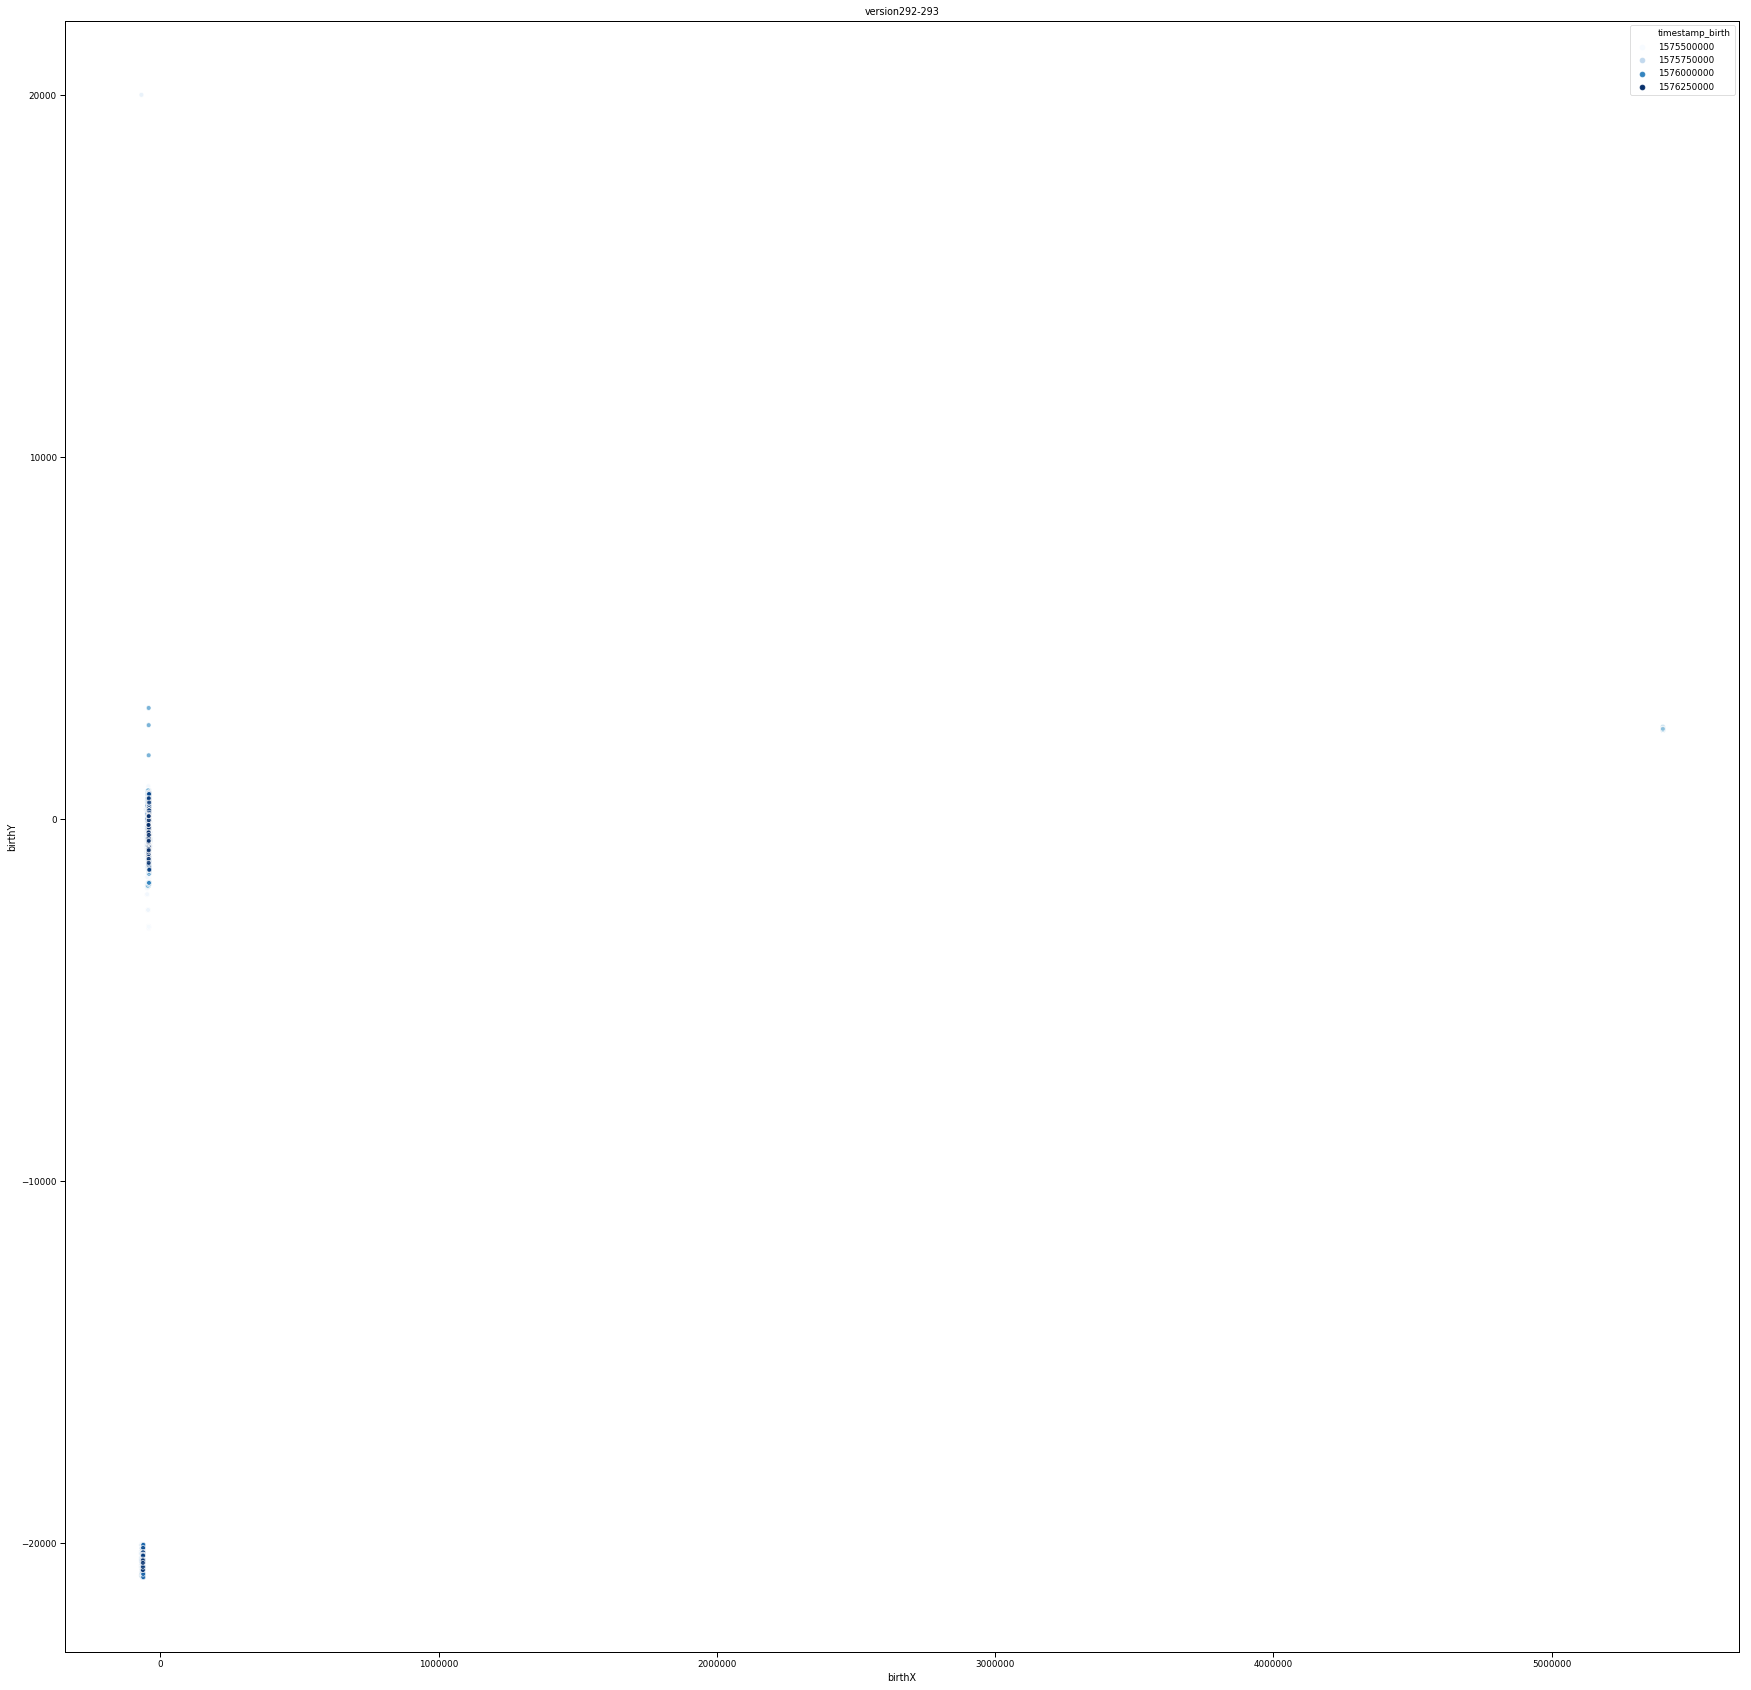

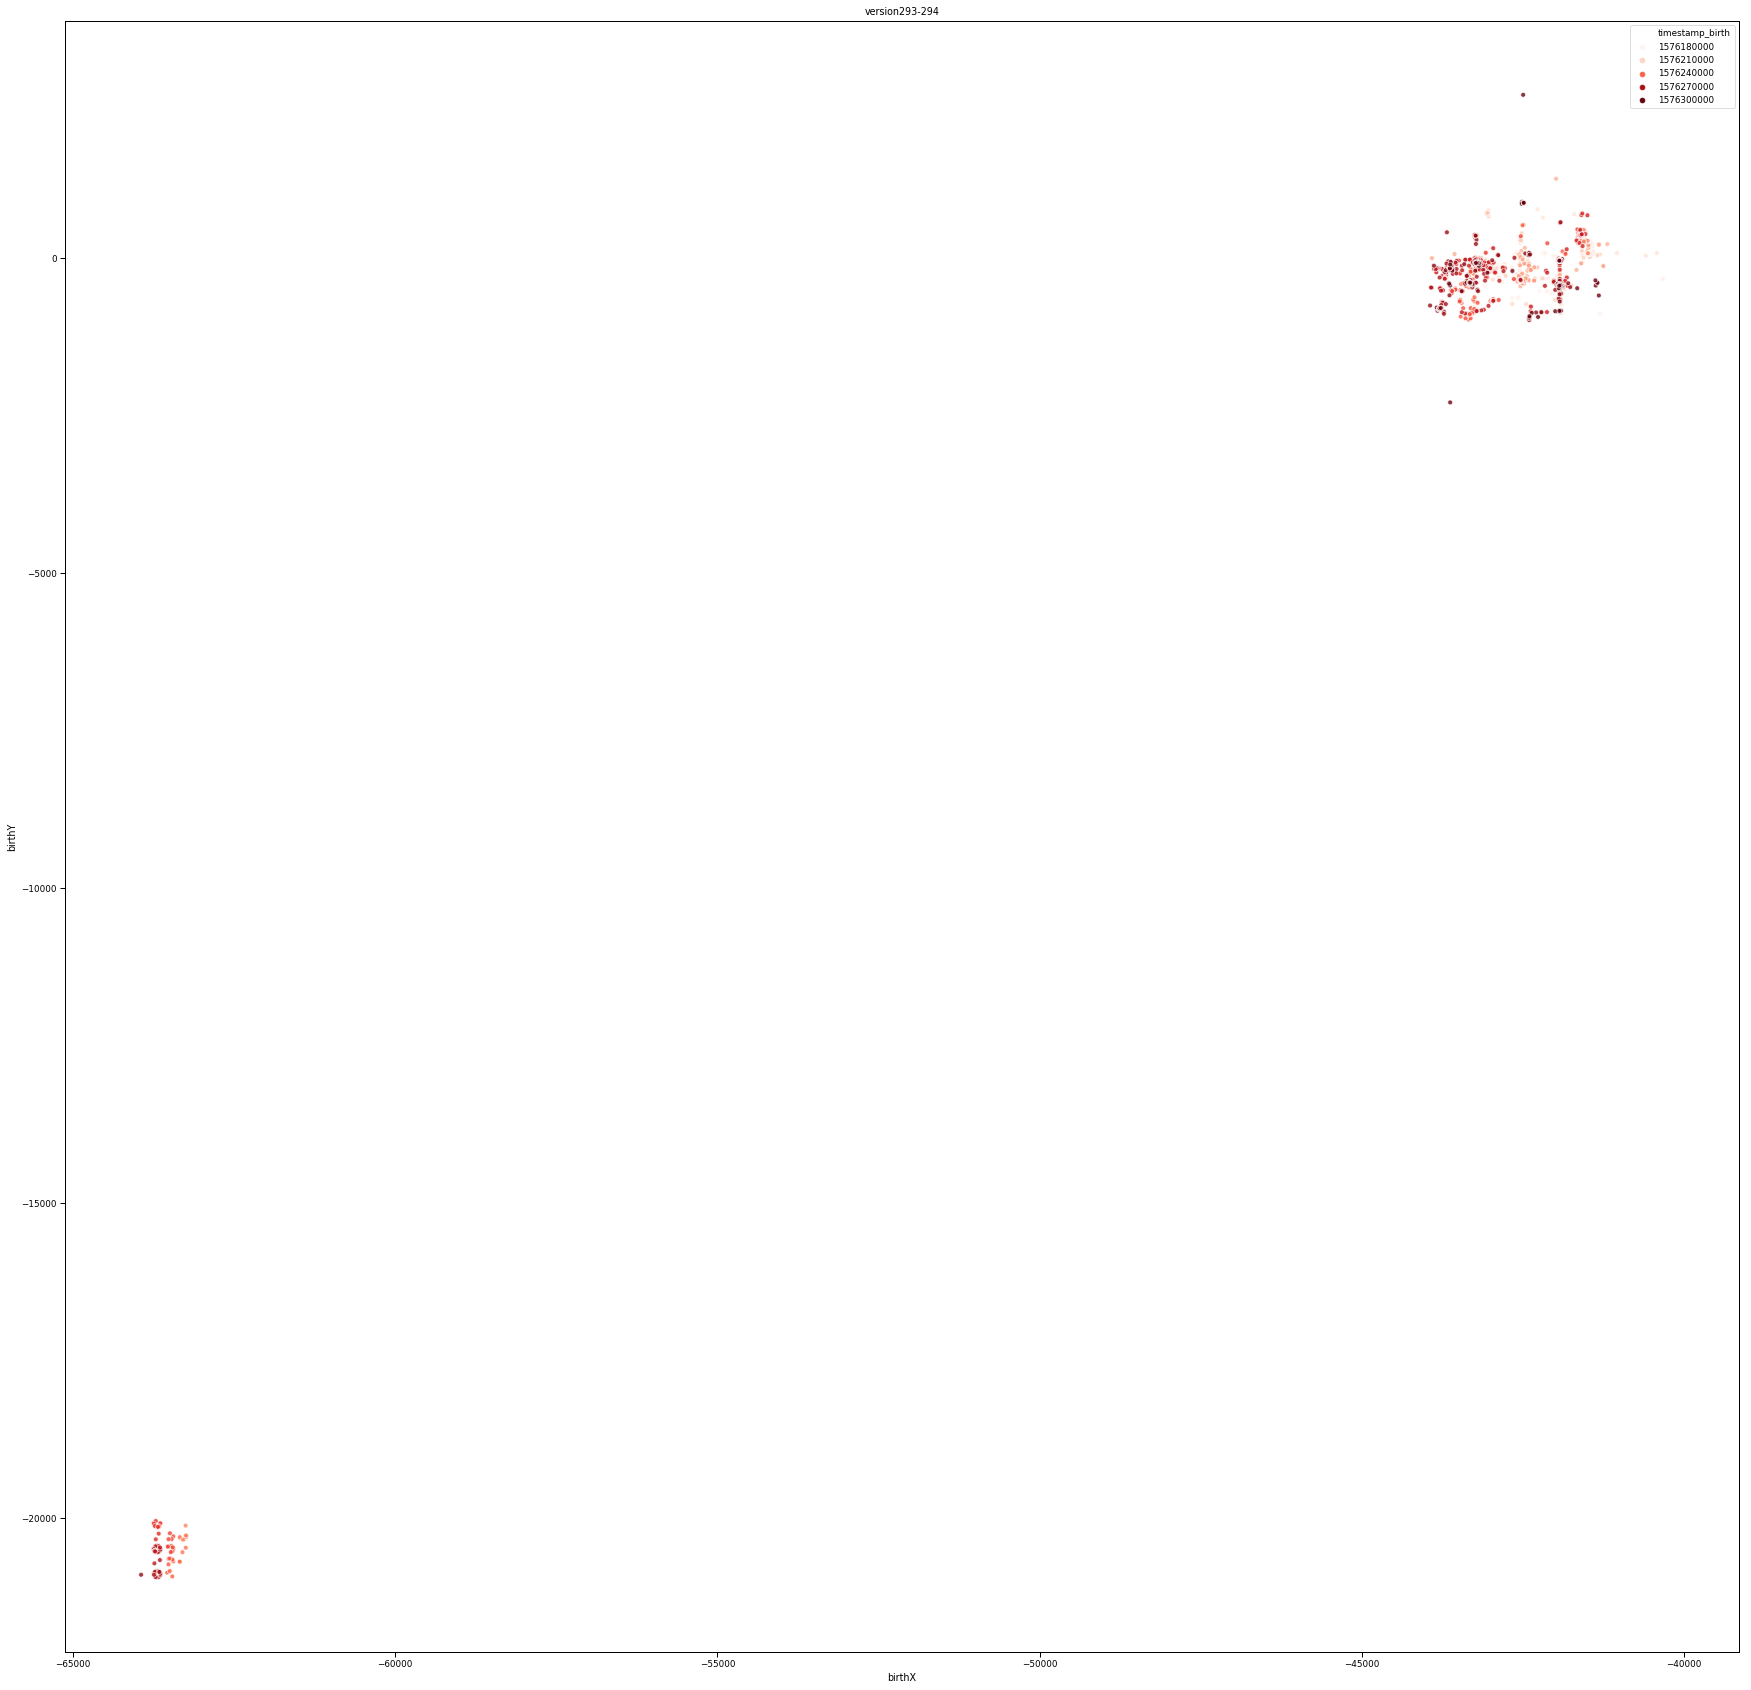

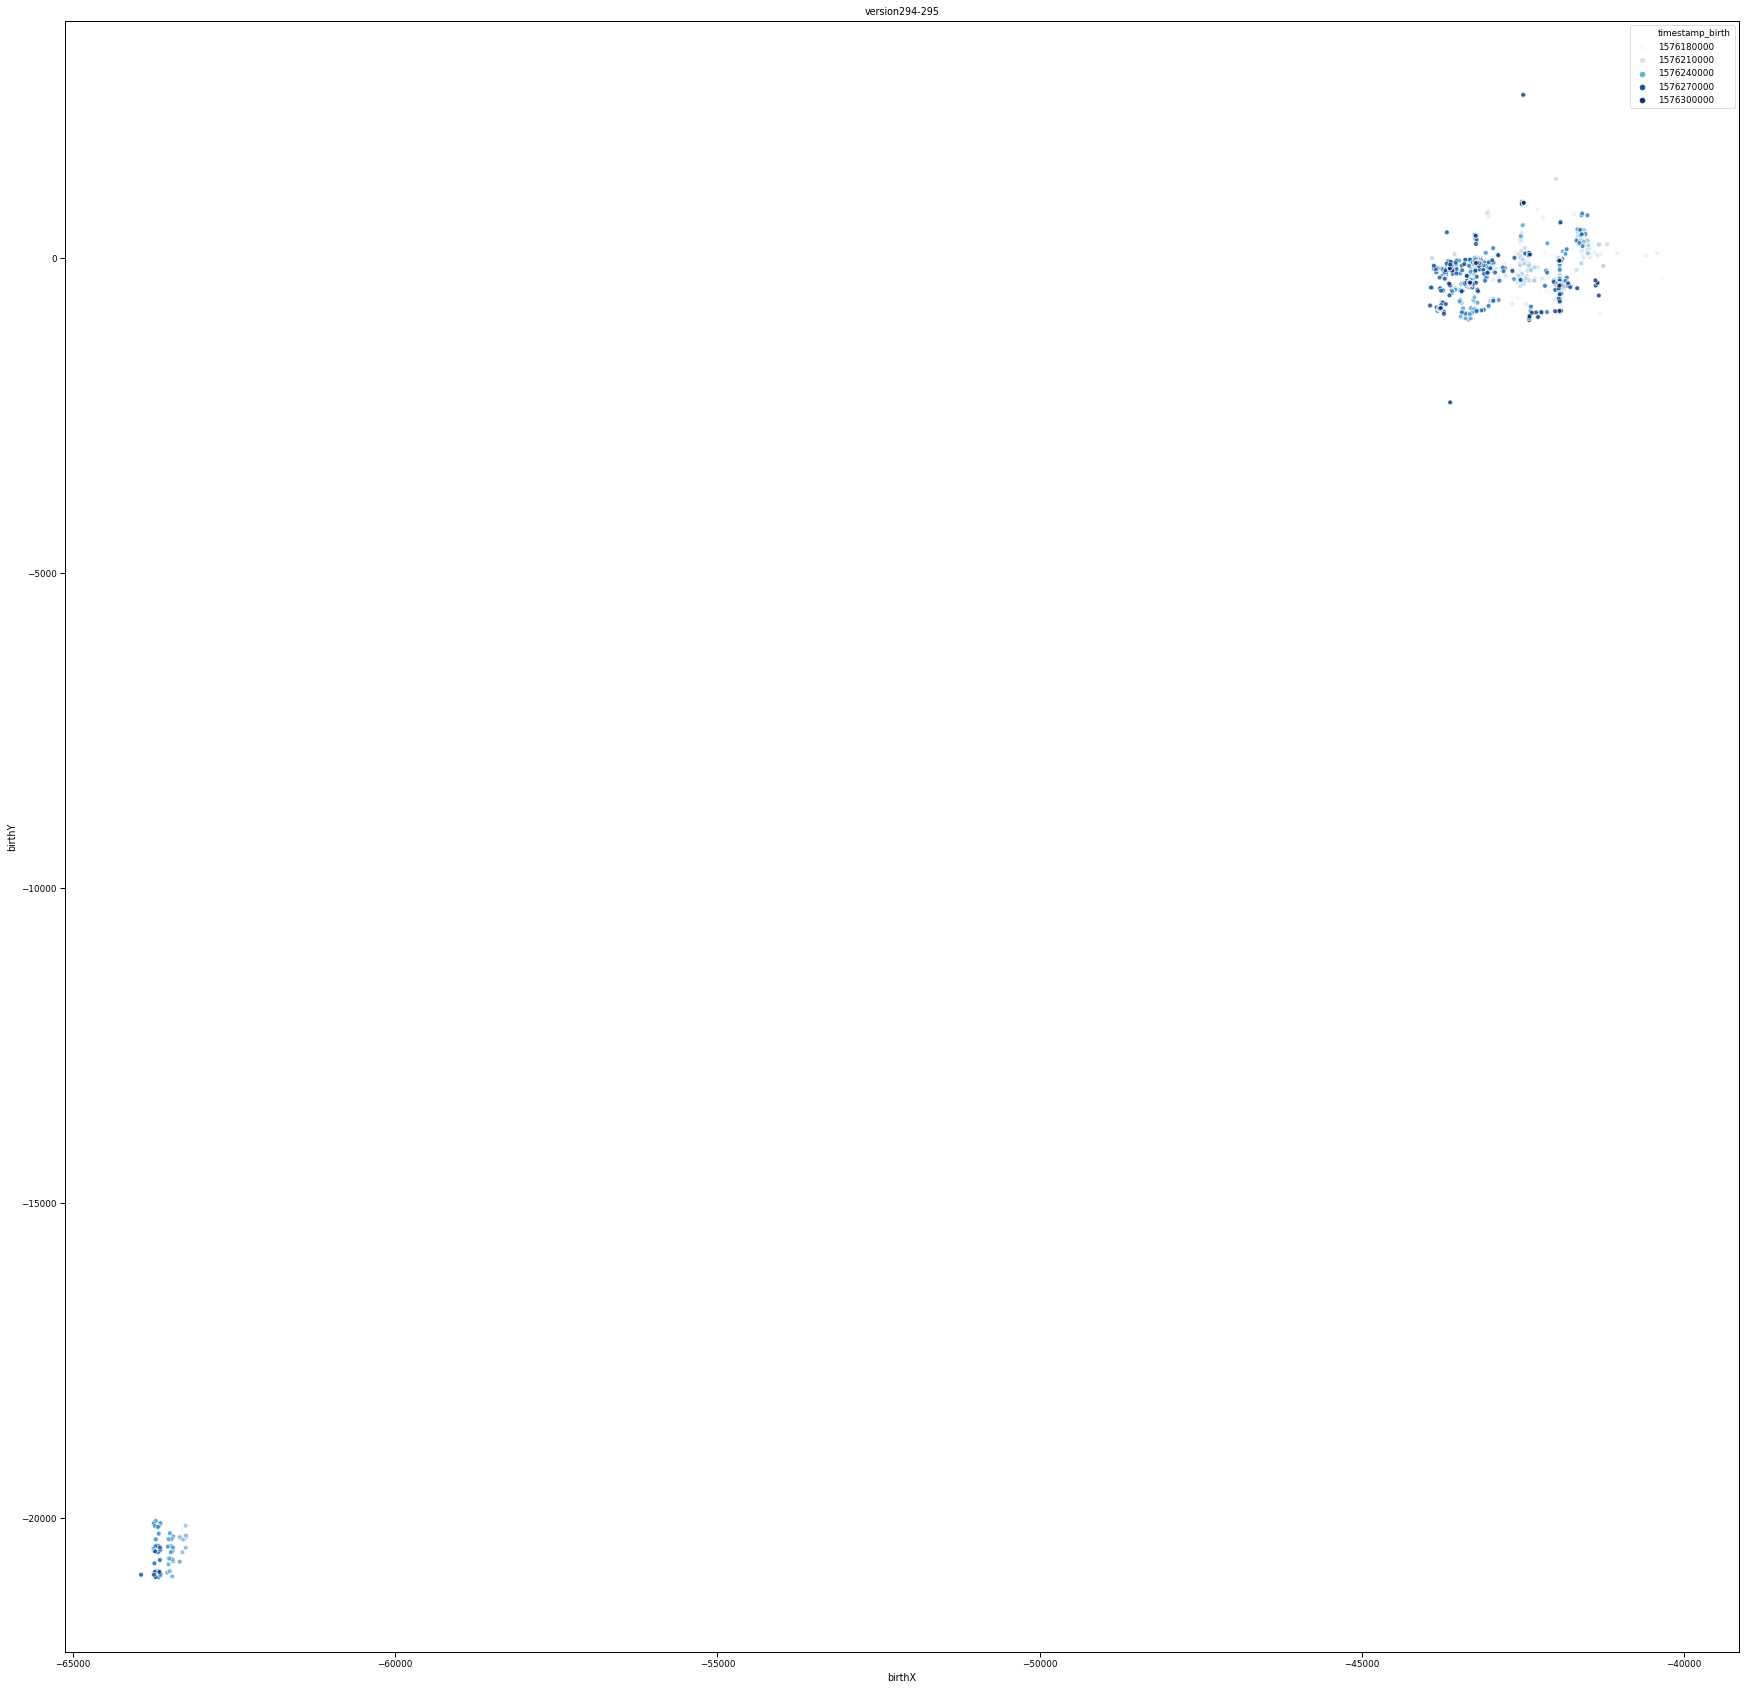

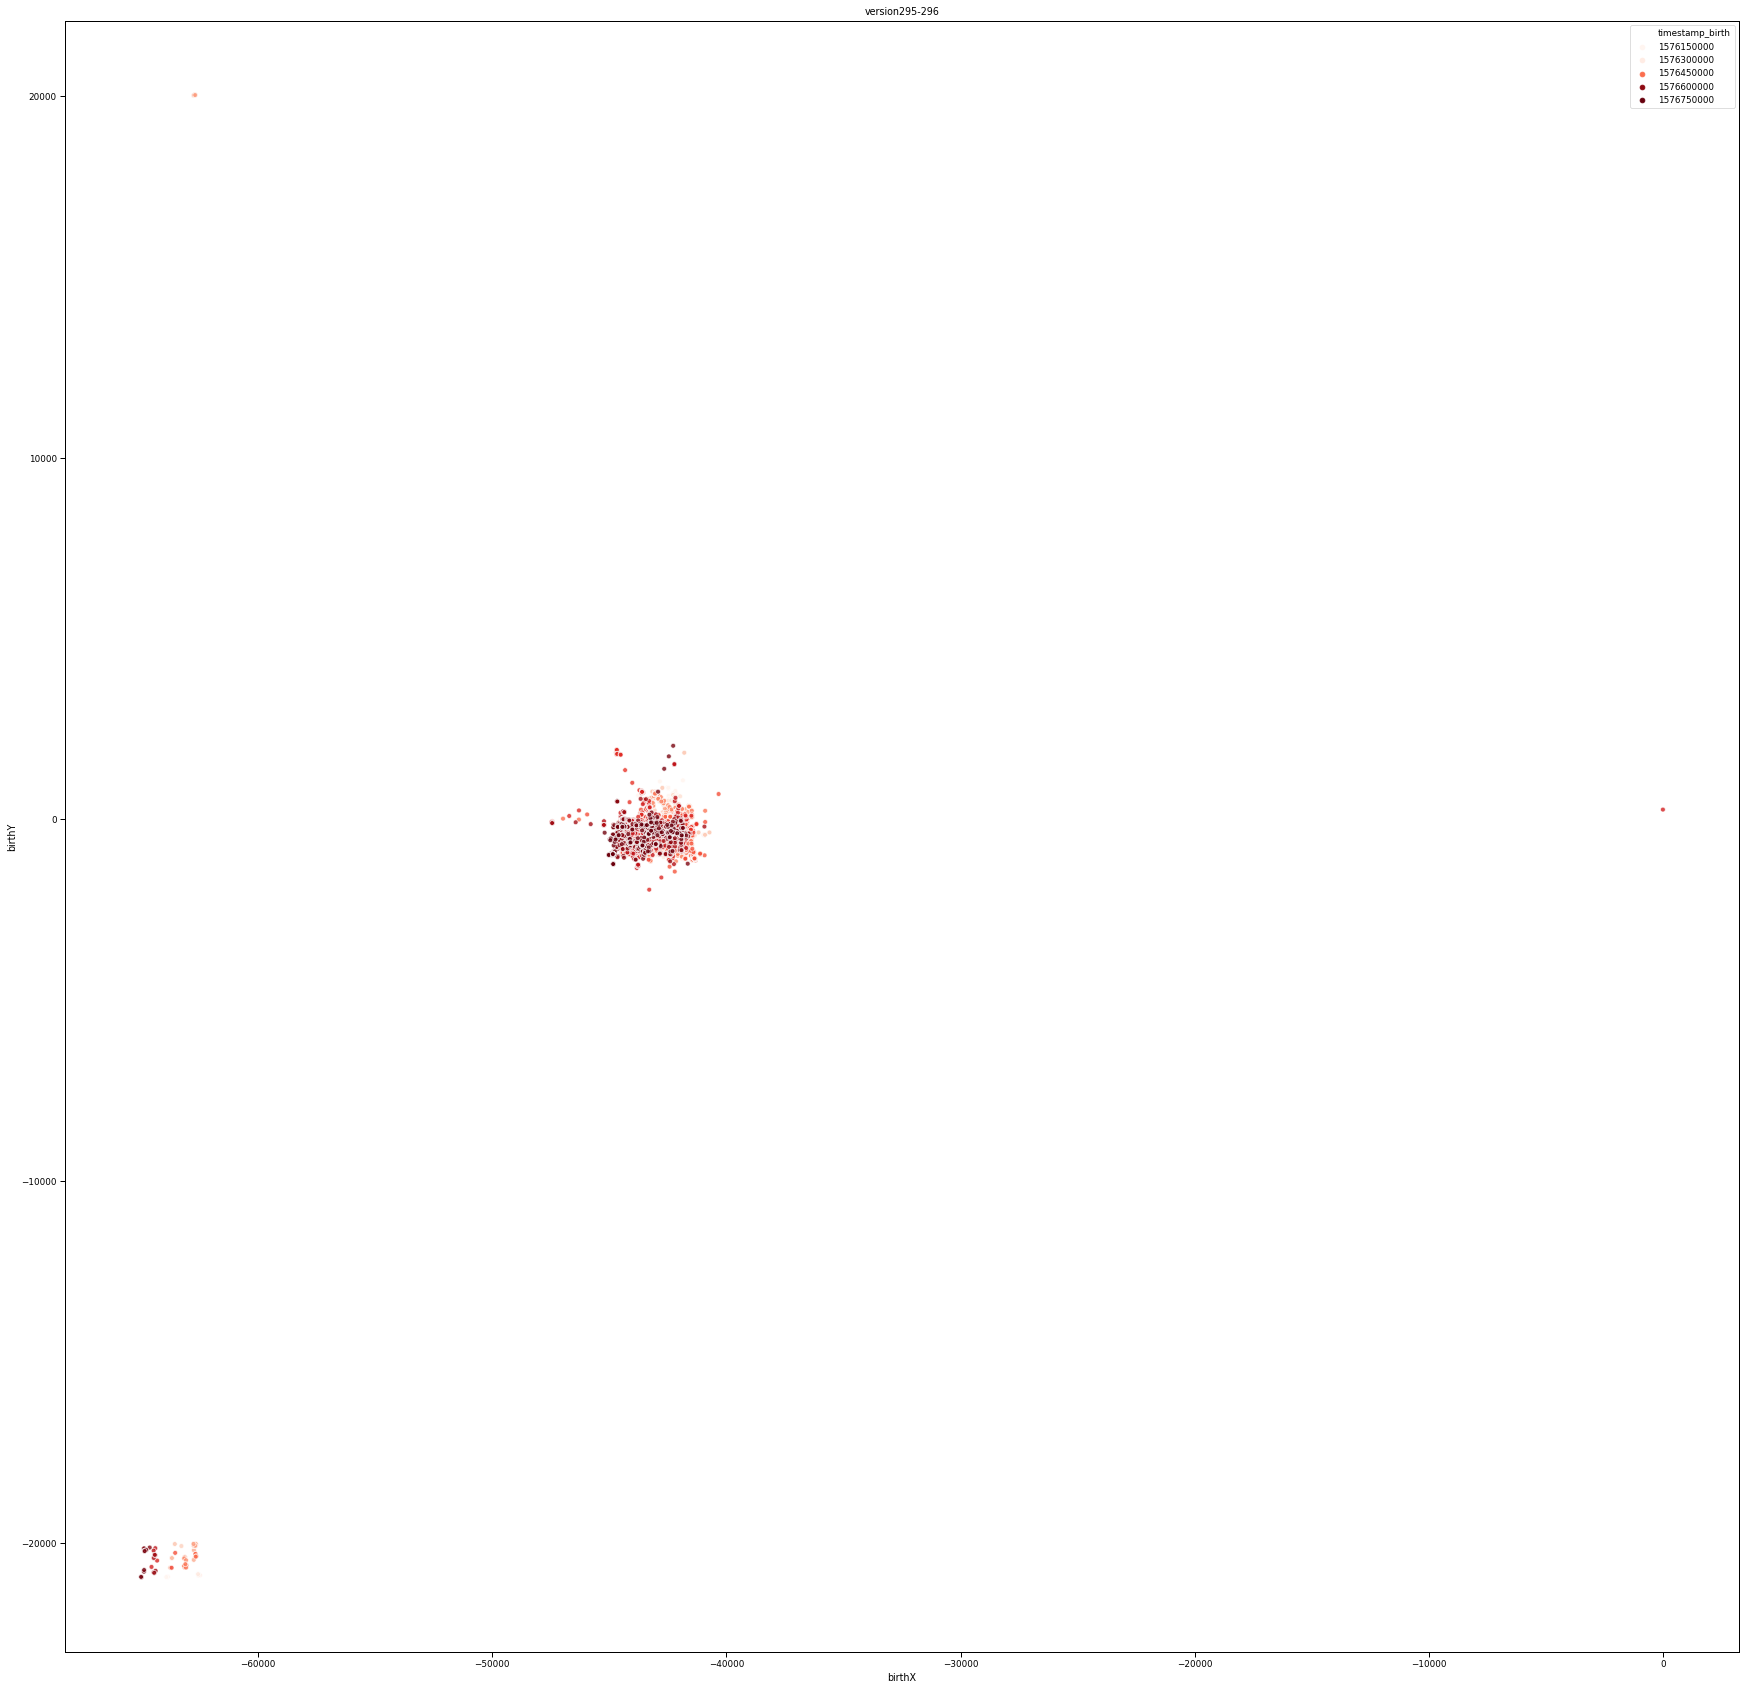

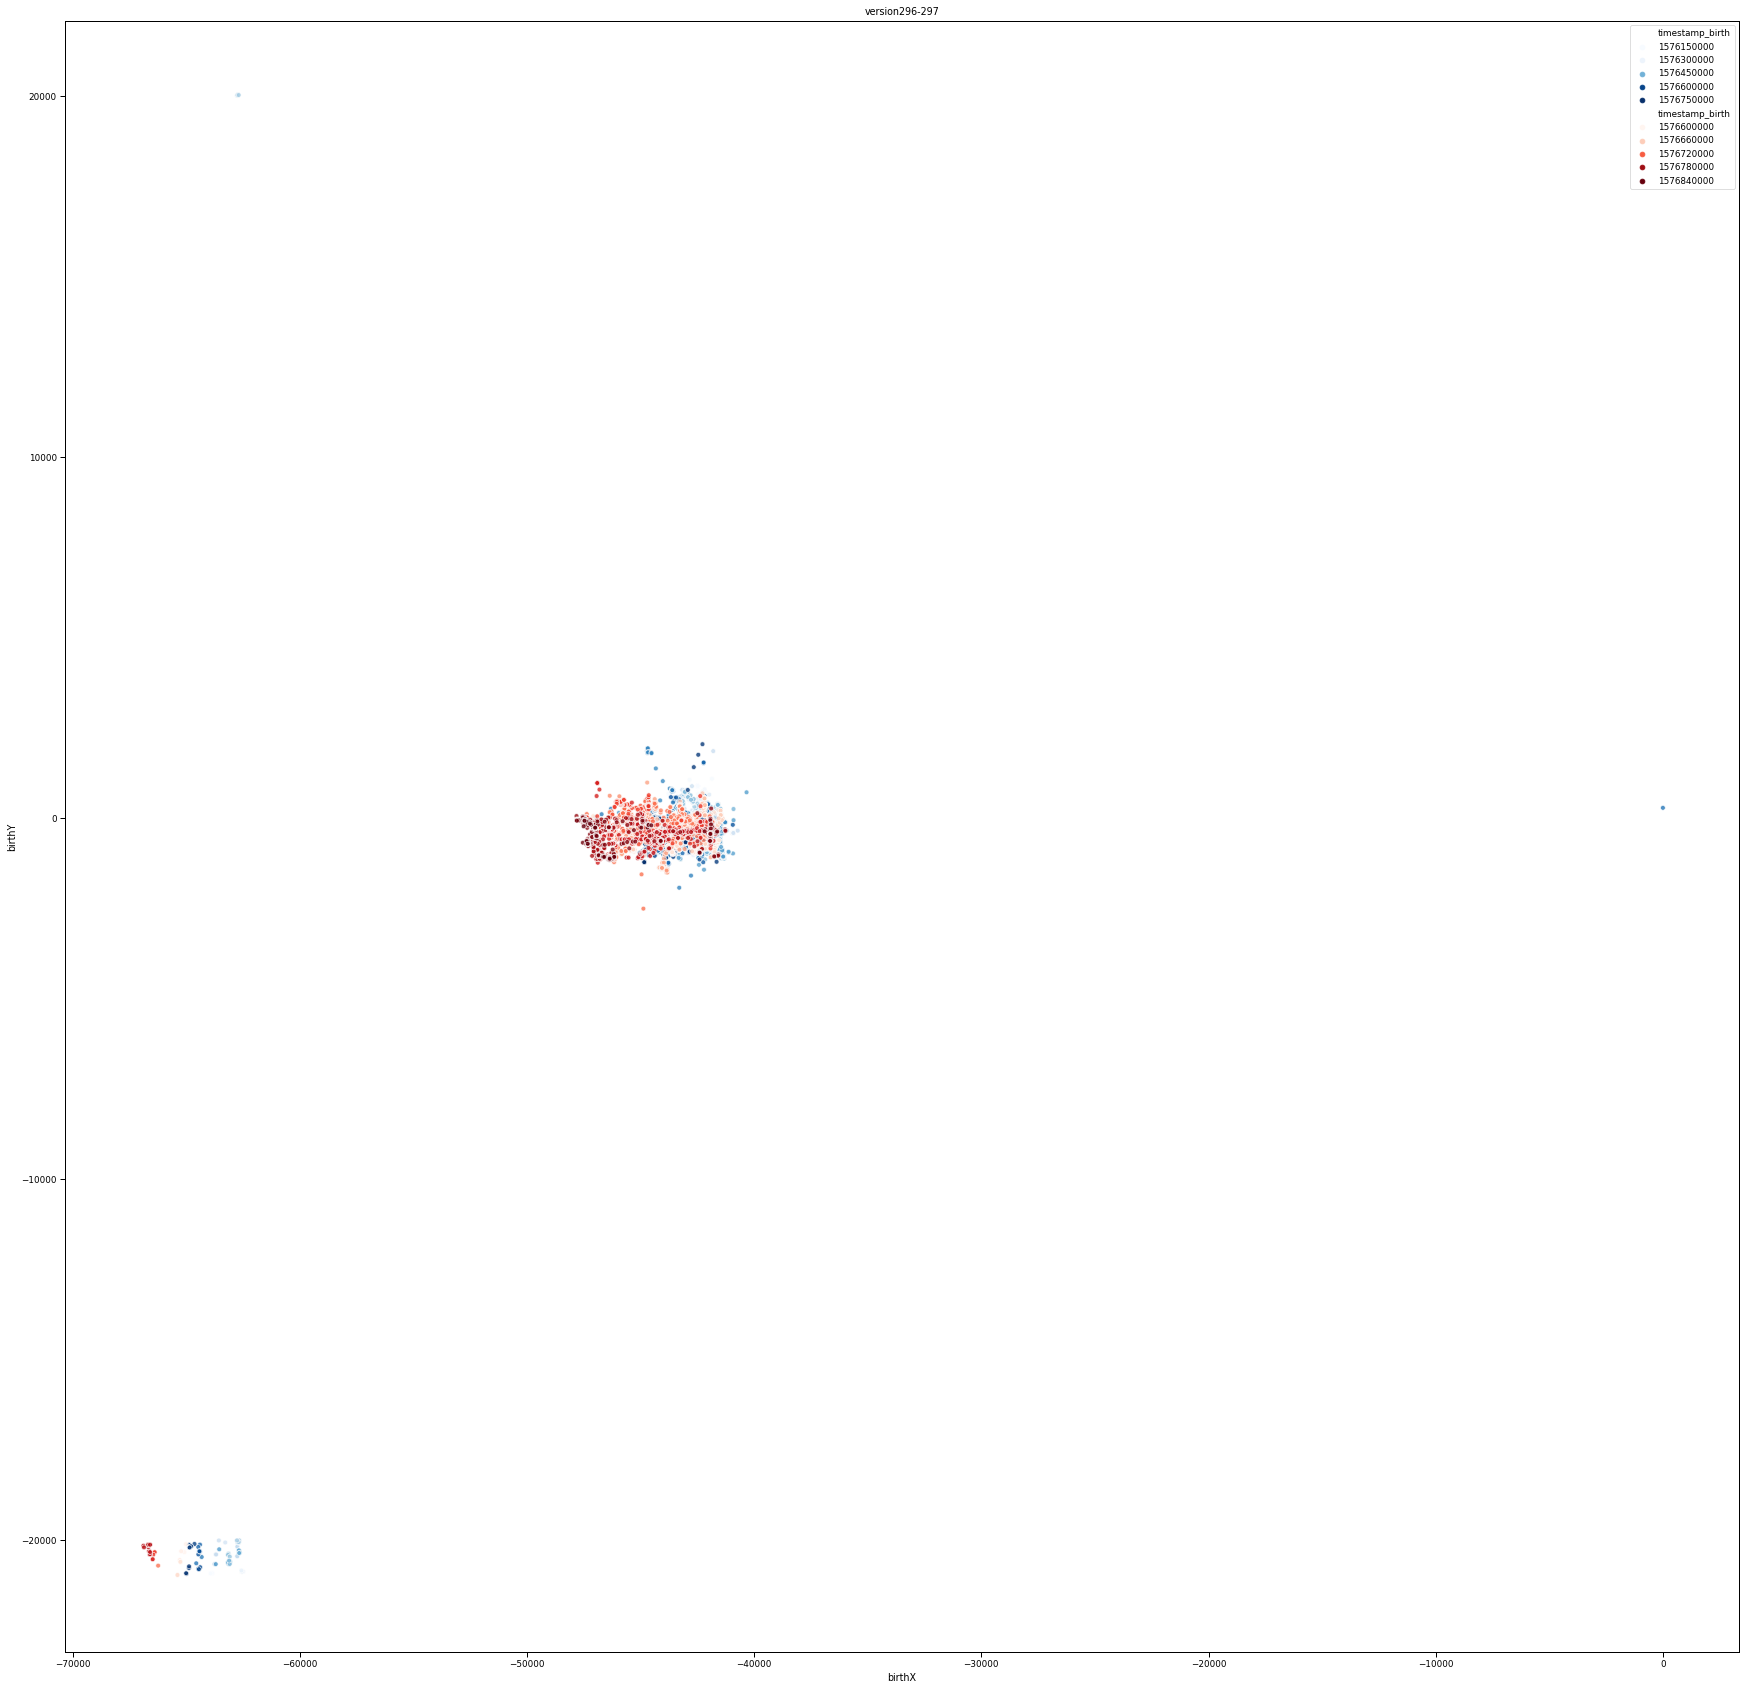

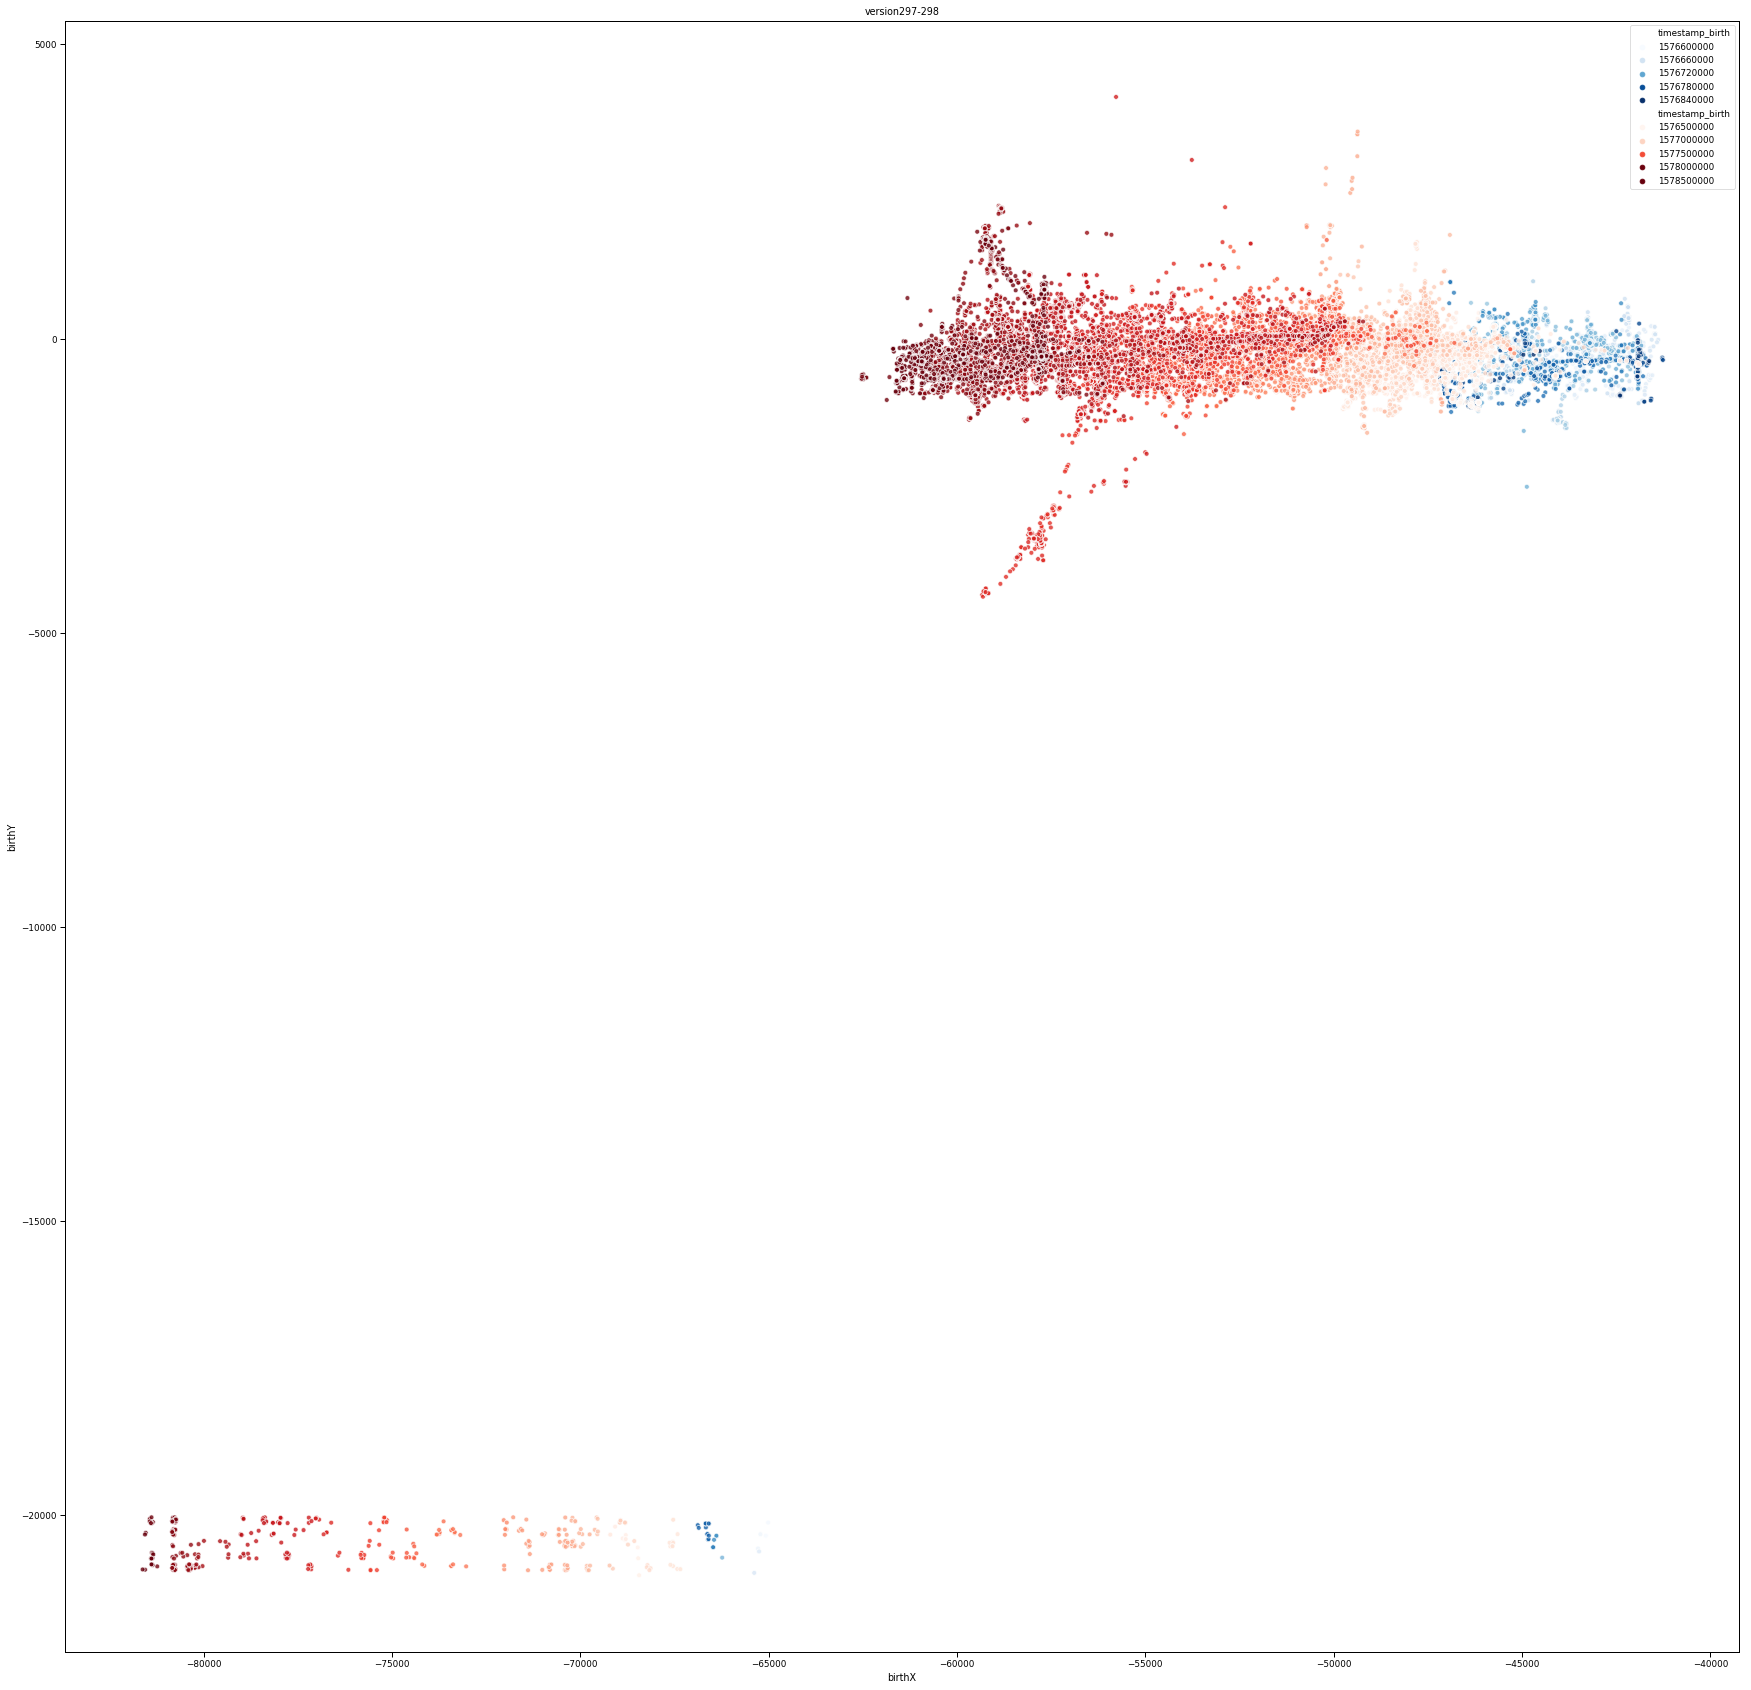

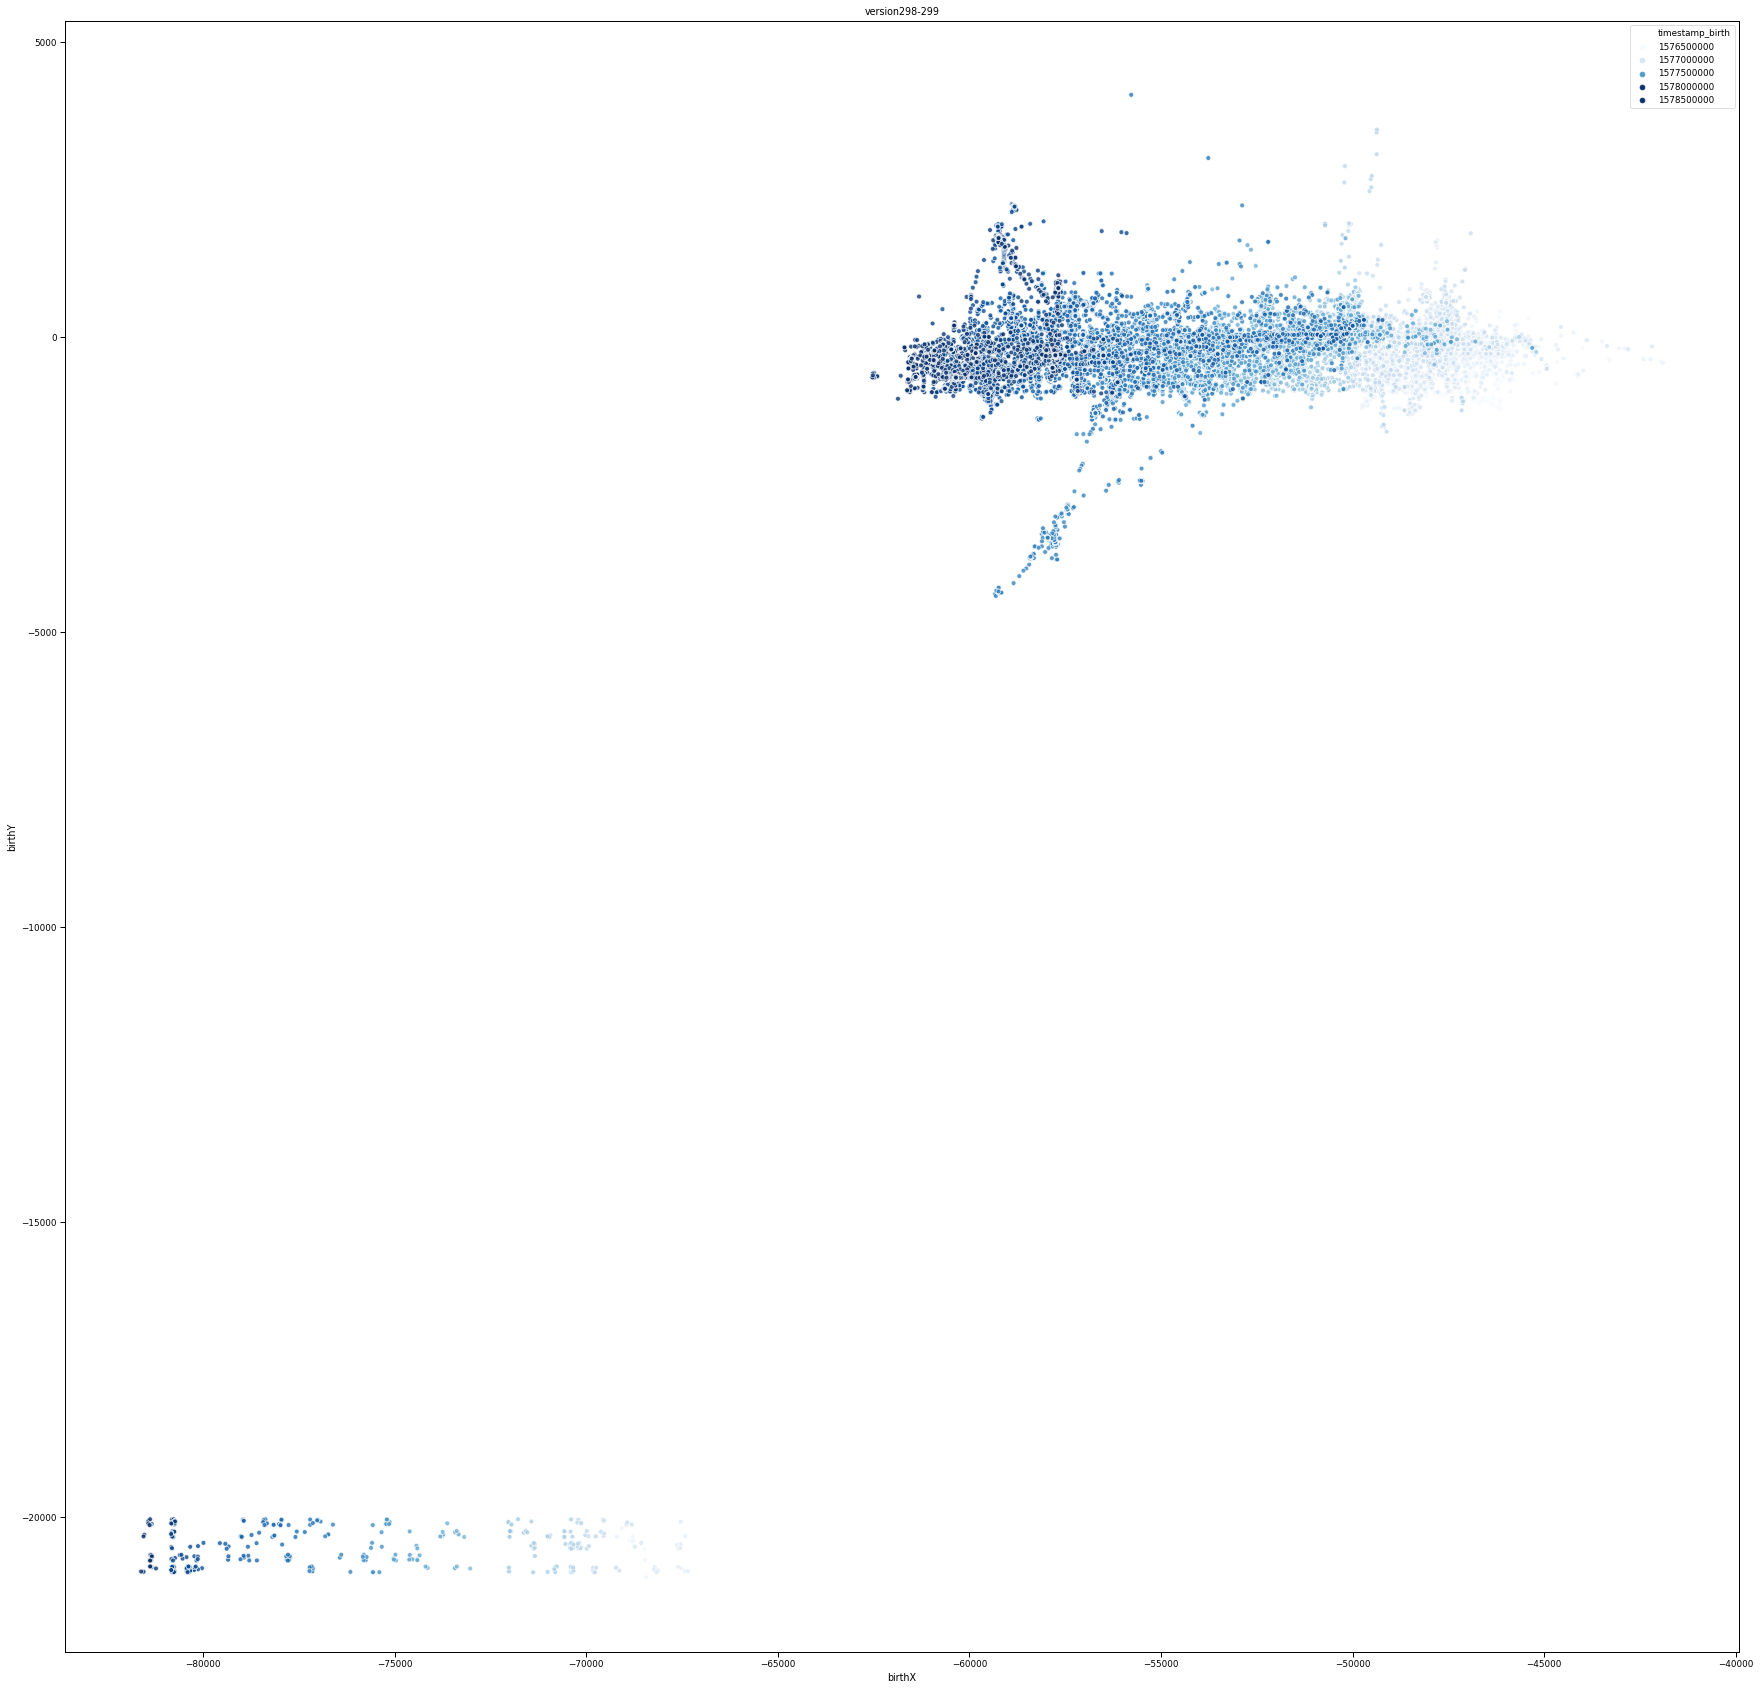

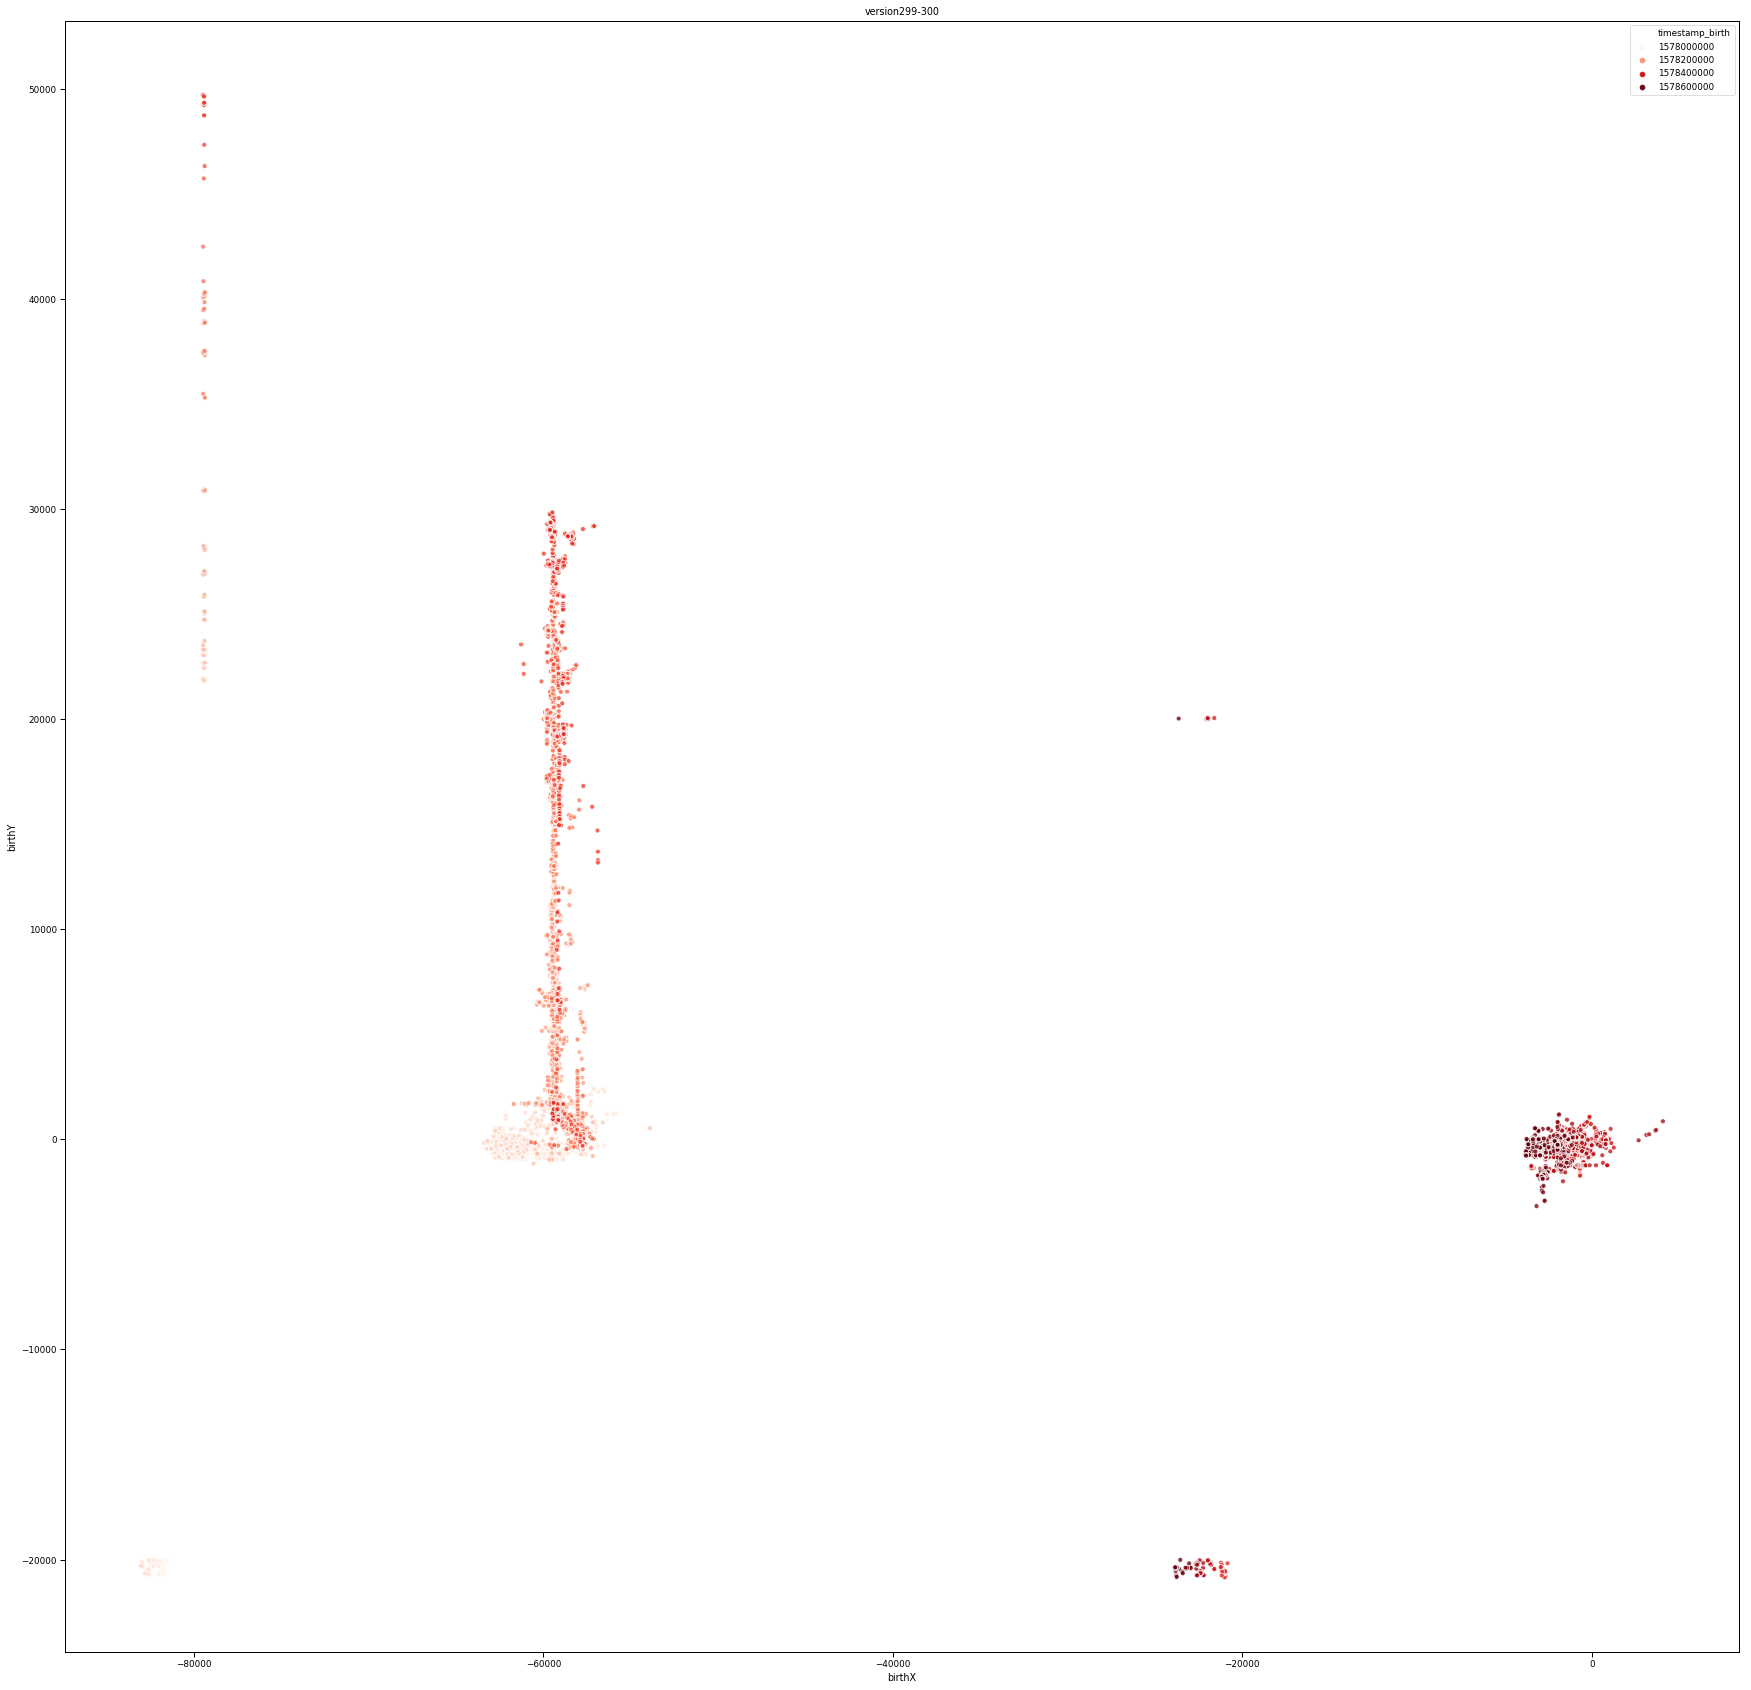

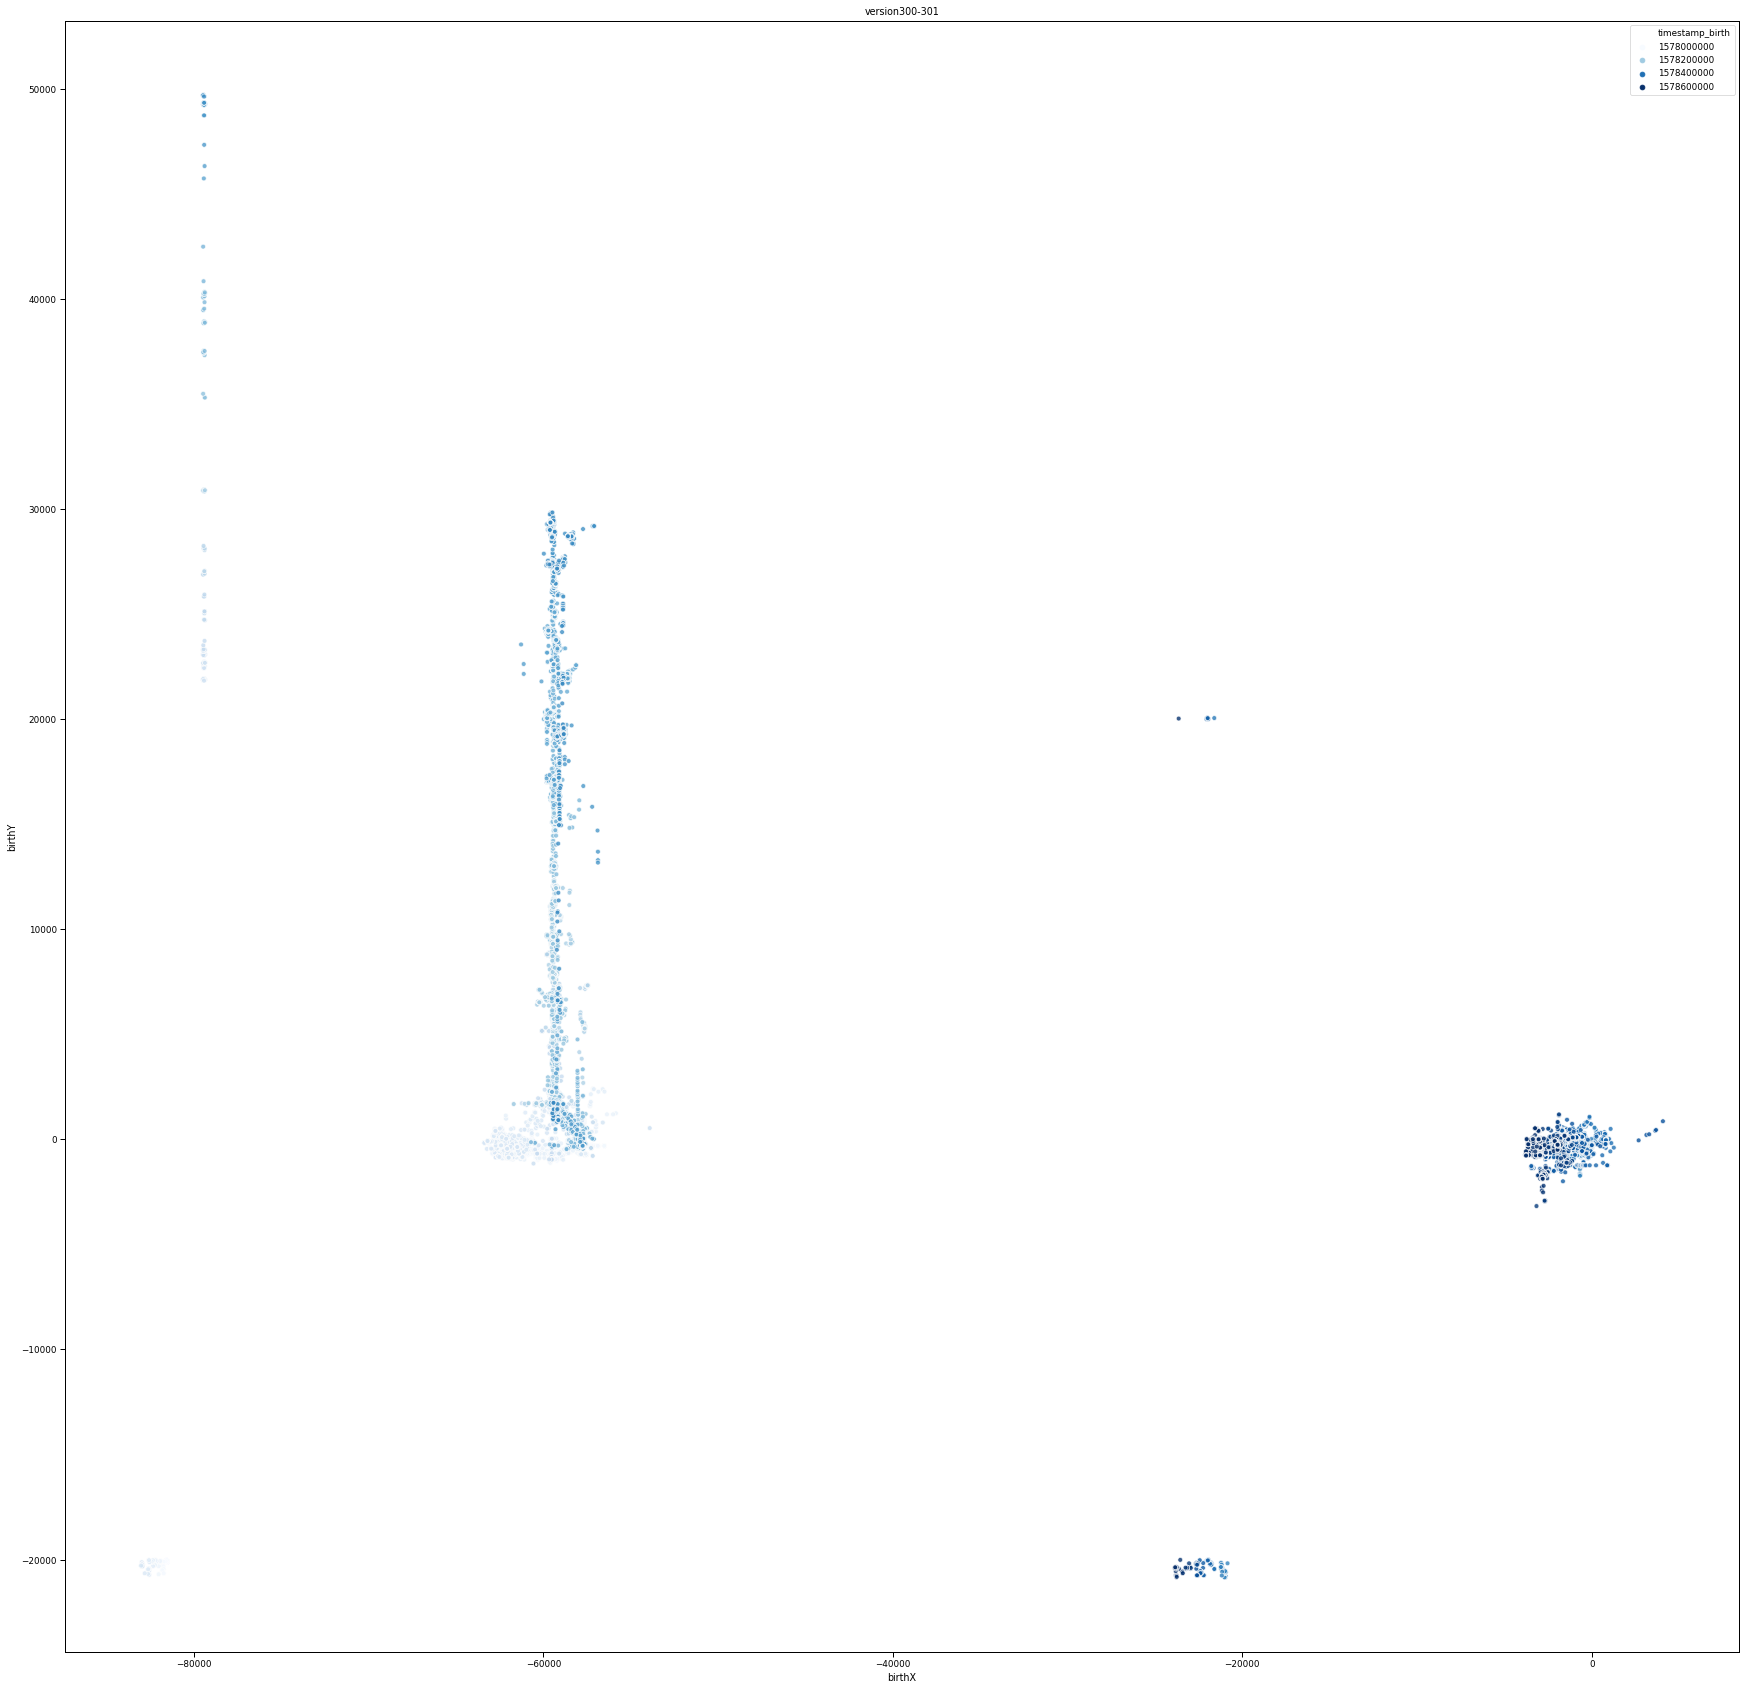

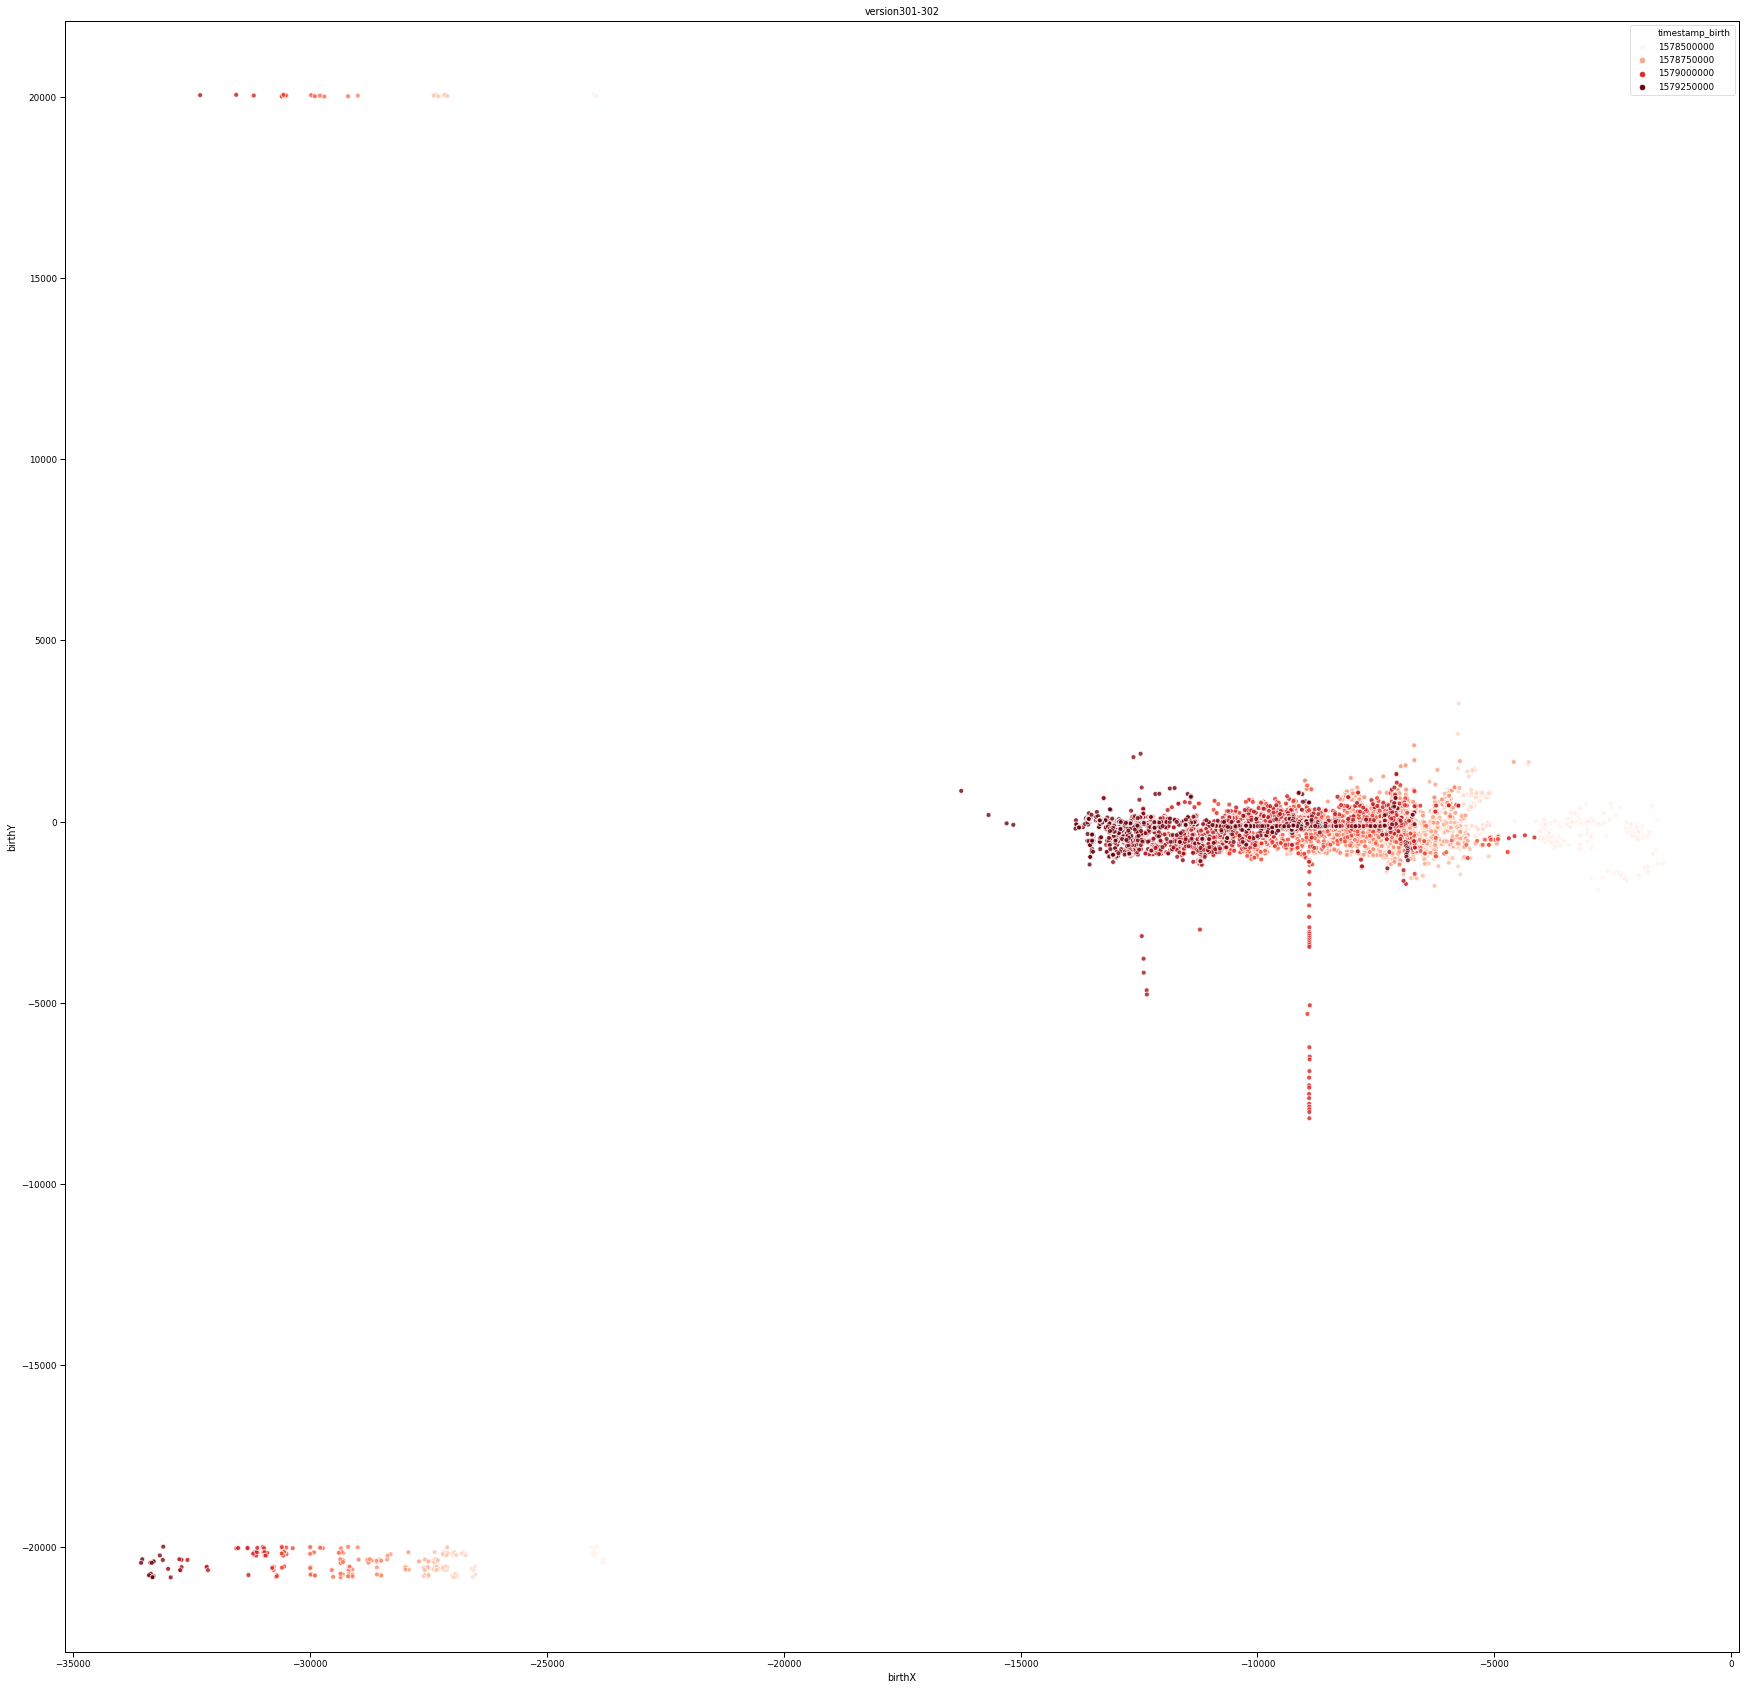

In [38]:
for s in np.arange(280,302):
    plot_migration_across_releases(s)
    plt.show()